<a href="https://colab.research.google.com/github/Abhiboii/Cardiovascular_risk_prediction.ipynb/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction (Supervised Classification)**

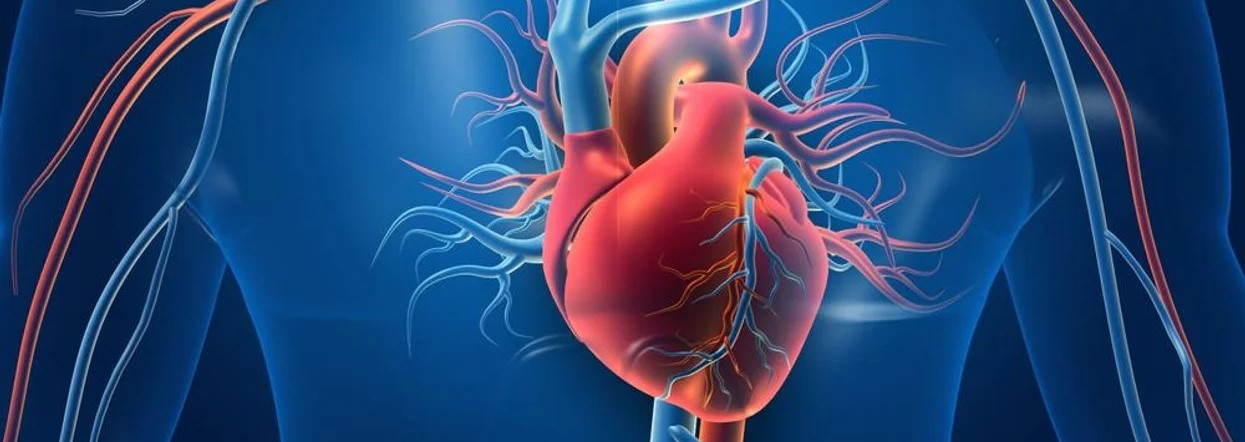

# **Project Summary -**

Cardiovascular Risk Prediction dataset provides the patients' information. The dataset contains information on 3,390 individuals with 16 predictor variables and 1 target variable. Each variable (attribute) is a potential risk factor. There are demographic, behavioral, and medical risk factors. We were tasked to predict the 10-year risk of developing coronary heart disease (CHD).

After understanding the data and getting variables, we first gathered and cleaned the data, handled the null values by checking the distribution and outliers in the data after that we have also typecasted the needed features into required format by type casting in order to visualize them properly. We performed indepth EDA and plotted different types of graphs by separating them into univariate, bivariate and multivariate categories as a result, We came accross some meaningful insights that helped us to make future decisions of ML model pipeline. Then further on, using feature engineering and data preprocessing we have extracted new features like pulse_pressure and glucose_diabetes with the help of some features which are not directly impacting to tenYearCHD. We also tried to get some impacting features by removing multicollinearity within the independent variables with the help of various inflation factor(VIF). In this dataset we have not handled outliers as removing them could potentially lead to a loss of important information and biased results. Also, we noticed that some of the features were categorical in nature and ML model can not understand the language of alphabets(strings).So, we have encoded them into numericals using BINARY LABEL ENCODING .

In order to get normally distributed data we have applied various transformation techniques such as Logarithmic Transformation, Exponential Transformation, Square root Transformation and some others as well and plotted the quantie-quantile plot to visualize how far our data points are from the normal distribution.To scale the data We used the sklearn library StandardScaler.

It was an highly imbalanced dataset as the distribution of the target variable, TenYearCHD, was found to be imbalanced, with only 15% of individuals being classified as having a high risk of developing CHD. So we used SMOTE(Synthetic Minority Oversampling Technique) to create a balanced dataset.


Now as we are ready with our final features we splitted the data so that we will get the stratified samples of both the class in train and test sets.We have implimented the most basic and least complex model which is Logistic Regression and followed by the Random forest, XGboost, Naive Bayes, KNN, SVM and compared the various metrics obtained from classification reports such as Precision, Recall, F1 Score, Accuracy and AUC-ROC. We have also compared the exact number of patients that are correctly or wrongly classified by our model with the help of confusion matrix. Since, we have the healthcare data, we have more emphasised on the Recall as it reduces the number of FN cases(we don't want our model to predict the infected ones as healthy), which is our major objective, moreover we have focused on the f1 score and then accuracy from the various metrics.

Among all the models we have implimented we have achieved the highest Recall, precision, f1 score, accuracy and AUC-ROC score from XGboost with the values of (0.94,0.85),(0.85,0.94),(0.90,0.89),(0.89),(0.94) for the class (0,1) respectively by hyperparamter tuning with the learning rate of 0.1, maximum tree depth of 5 and the total number of 350 trees in the forest. From the above experiments, identifications and comparision, we have choosen the XGboost as our final optimal model among all 6 models for deployment.



Overall, while building a machine learning model on Cardiovascular risk prediction data, we applied combination of data processing, machine learning techniques, and model evaluation skills. It was a challenging task and we faced some failures as well but with the right approach and knowledge, we successfully created a model that can accurately predict a patient that can be infected with CHD in future.

# **Problem Statement**
The dataset is from ongoing cardiovascular study on residents of the town of Framingham, Massachutts. The classification goal is to predict whether the patient has a 10-year risk of failure coronary heart disease(CHD). The dataset provides the patient's information . It includes over 4000 records and 15 attributes. Each attribute is a potental risk factor. There are both demographic, behavioral, and medical risk factor.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df= pd.read_csv("/content/data_cardiovascular_risk.csv")

In [ ]:
# View top 5 rows of the dataset
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
# View last 5 rows of the dataset
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [ ]:
# Dropping the id column (not relevant)
df.drop(columns=['id'], inplace=True)

In [ ]:
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  3390
Number of columns are:  16


In [ ]:
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [ ]:
# Checking duplicated rows count
df.duplicated().sum()

0

In [ ]:
# Checking missing values/null values count for each column
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

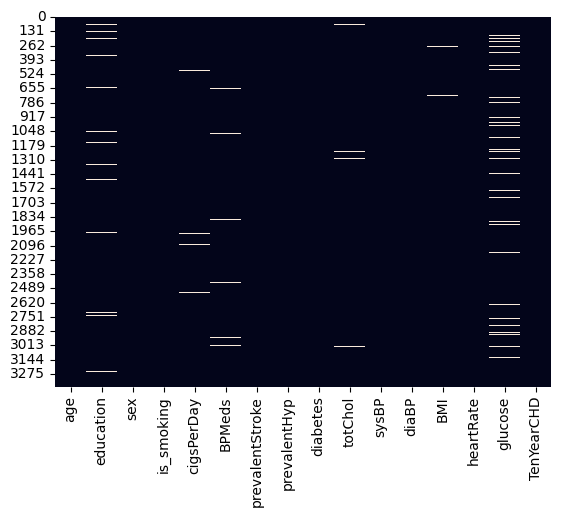

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

What information did you have about your dataset?

There are 16 feature columns in total, with Ten Year CHD as the dependent variable column. There are 3390 observations (rows) in total.



The dataset contains no duplicate rows.




There are also blanks in the columns education, cigarettes per day, blood pressure medication, totalChol, BMI, heart rate, and glucose.



# **2. Understanding the Variables**

In [ ]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [ ]:
# Dataset Describe
df.describe(include="all")

age    education   sex is_smoking   cigsPerDay       BPMeds  \
count   3390.000000  3303.000000  3390       3390  3368.000000  3346.000000   
unique          NaN          NaN     2          2          NaN          NaN   
top             NaN          NaN     F         NO          NaN          NaN   
freq            NaN          NaN  1923       1703          NaN          NaN   
mean      49.542183     1.970936   NaN        NaN     9.069477     0.029886   
std        8.592878     1.019081   NaN        NaN    11.879078     0.170299   
min       32.000000     1.000000   NaN        NaN     0.000000     0.000000   
25%       42.000000     1.000000   NaN        NaN     0.000000     0.000000   
50%       49.000000     2.000000   NaN        NaN     0.000000     0.000000   
75%       56.000000     3.000000   NaN        NaN    20.000000     0.000000   
max       70.000000     4.000000   NaN        NaN    70.000000     1.000000   

        prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count       3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
unique              NaN           NaN          NaN          NaN         NaN   
top                 NaN           NaN          NaN          NaN         NaN   
freq                NaN           NaN          NaN          NaN         NaN   
mean           0.006490      0.315339     0.025664   237.074284   132.60118   
std            0.080309      0.464719     0.158153    45.247430    22.29203   
min            0.000000      0.000000     0.000000   107.000000    83.50000   
25%            0.000000      0.000000     0.000000   206.000000   117.00000   
50%            0.000000      0.000000     0.000000   234.000000   128.50000   
75%            0.000000      1.000000     0.000000   264.000000   144.00000   
max            1.000000      1.000000     1.000000   696.000000   295.00000   

              diaBP          BMI    heartRate      glucose   TenYearCHD  
count   3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
unique          NaN          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN          NaN  
mean      82.883038    25.794964    75.977279    82.086520     0.150737  
std       12.023581     4.115449    11.971868    24.244753     0.357846  
min       48.000000    15.960000    45.000000    40.000000     0.000000  
25%       74.500000    23.020000    68.000000    71.000000     0.000000  
50%       82.000000    25.380000    75.000000    78.000000     0.000000  
75%       90.000000    28.040000    83.000000    87.000000     0.000000  
max      142.500000    56.800000   143.000000   394.000000     1.000000

**Check Unique Values for each variable**

In [ ]:
# Check Unique Values for each variable using a for loop
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


# **3. Data Wrangling**

In [ ]:
# Before doing any data wrangling lets create copy of the dataset
df_2 = df.copy()

In [ ]:
# Renaming the columns
df_2.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [ ]:
# Defining 3 lists containing the column names of
# This is defined based on the number of unique values for each attribute
dependent_var = ['ten_year_chd']

categorical_var = [i for i in df_2.columns if df_2[i].nunique()<=4]
continuous_var = [i for i in df_2.columns if i not in categorical_var]

In [ ]:
# Checking the definded lists
print(categorical_var)
print(continuous_var)

['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd']
['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']


**Univariate Analysis**

**Chart - 1 (Histogram of all variable)**

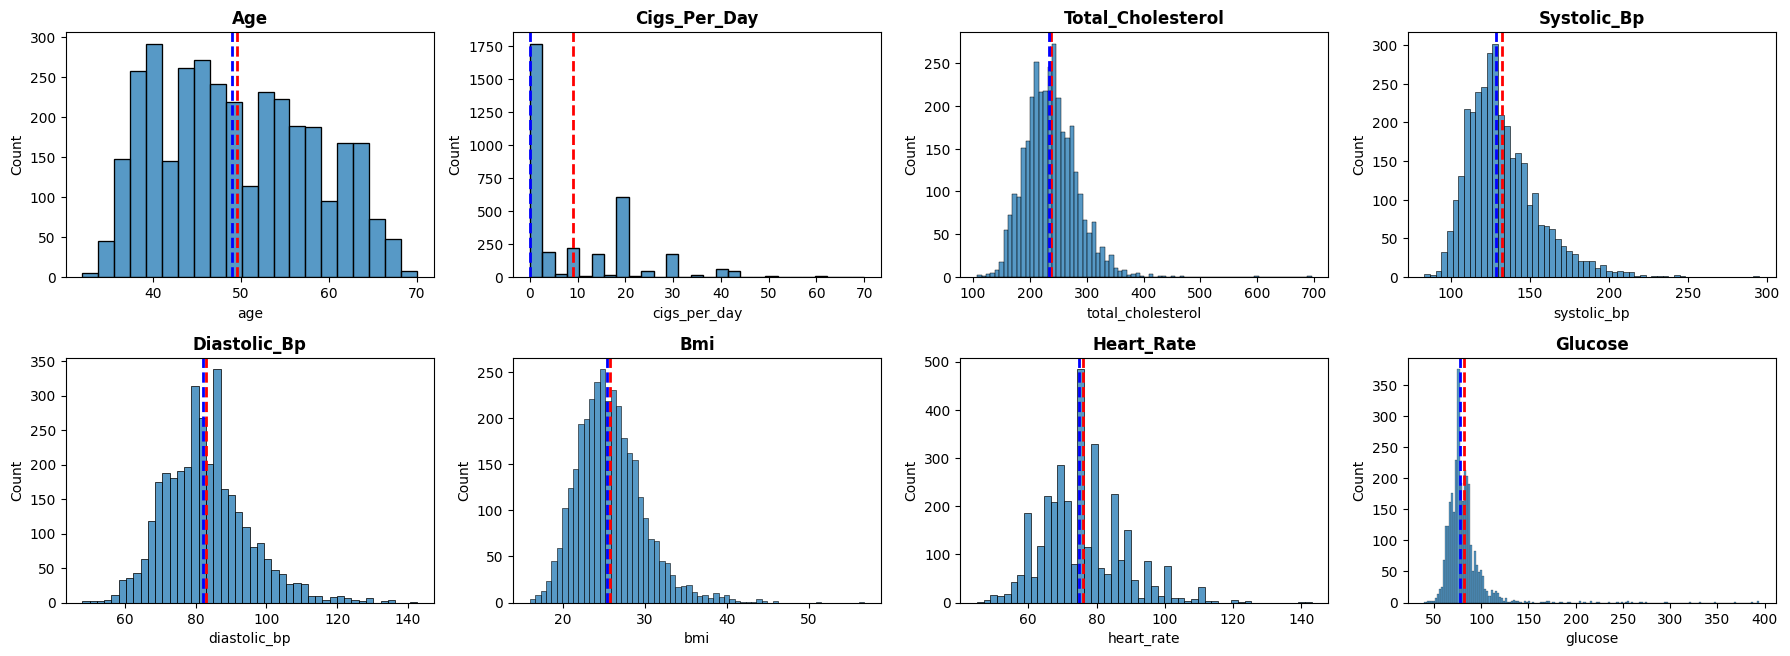

In [ ]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(continuous_var):
  feature = df_2[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

1. Why did you choose that particular chart?

Histograms have been used to show the distribution of numerical data in columns. A histogram is essentially used to display data in the form of some groups.It is a precise way for graphically representing numerical data distribution.It is a sort of bar graphic in which the X-axis shows bin ranges and the Y-axis represents frequency.


2. What is/are the key takeaways from the chart?

We discovered the following insights:


The bulk of the people in the dataset are between the ages of 40 and 60, with a few people younger than 30 and older than 70.




The histogram may reveal that the bulk of the people in the dataset smoke fewer than ten cigarettes per day, with a few people smoking more than twenty cigarettes per day.



The majority of people in the sample have total cholesterol levels between 200 and 250 mg/dL, with a minority having values below 160 mg/dL or beyond 300 mg/dL.

The bulk of people in the sample have systolic blood pressure ranges between 120 and 140 mmHg, with a few people having levels below 90 mmHg or beyond 160 mmHg.

The bulk of the people in the sample have diastolic blood pressure ranges between 80 and 90 mmHg, with a minority having levels below 60 mmHg or beyond 100 mmHg.

The bulk of the people in the sample had a body mass index between 24-26, with a few people having a BMI below 18 or beyond 35.


The bulk of people in the sample had a heart rate between 60 and 90 beats per minute, with a few people having a heart rate below 50 or beyond 100 beats per minute.

The bulk of people in the sample have blood glucose levels between 70 and 90 mg/dL, with a minority having levels below 60 mg/dL or beyond 130 mg/dL.








**Chart - 2 (Distribution of categorical features)**

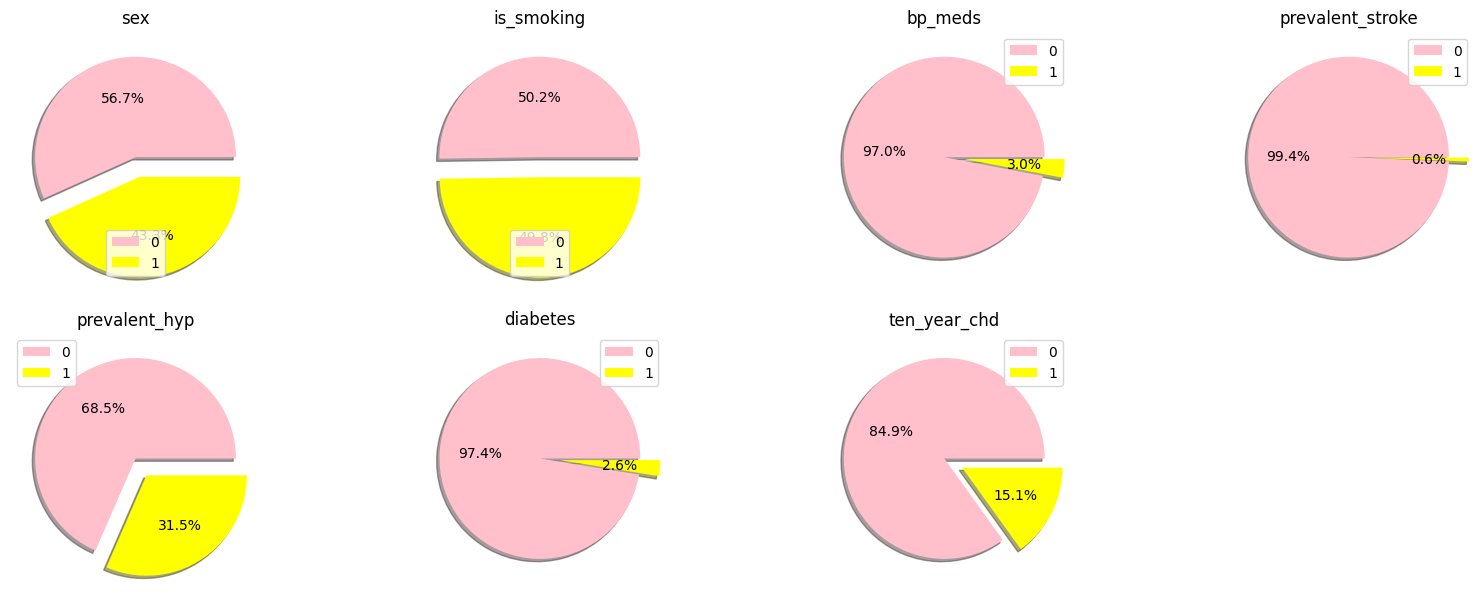

In [ ]:
# visualization code
plt.figure(figsize=(20,15))
labels = '0','1'
colors = ['pink', 'yellow']
explode = [0, 0.2]
for i,j in enumerate(categorical_var[1:]):
  plt.subplot(4,4,i+1)
  # sns.countplot(df[j])
  plt.pie(df_2[j].value_counts(),explode=explode,colors=colors, autopct='%1.1f%%', shadow=True)
  plt.legend(labels)
  # plt.legend((round(df_2[j].value_counts()*100/len(df[j]),2))
  plt.title(j)
plt.show()

1. Why did you pick the specific chart?


As we know pie chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables so we have used them to display distribution of various categorical features.


2. What is/are the insight(s) found from the chart?

The insights we found are :-

In the dataset, 56.7% of individuals present are female and rest are male.

50.24% of the individual present in the dataset are into smoking.

Only 2.9% people are taking BP Medicines.

0.6% and 31.5 % people have a history of strokes and hypertension respectively.

2.6% people have diabetes.

15.1% people have a chance of getting heart diseases in ten years.



**Chart - 3 (Distribution of Education levels)**

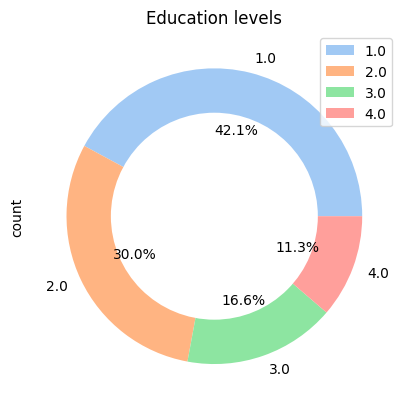

In [ ]:
# Setting labels for items in Chart
education = df_2["education"].value_counts()

# Pie Chart
df["education"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                              wedgeprops = {'linewidth': 2,'antialiased': True})
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# # Adding Title of chart
plt.title('Education levels')

# Displaying Chart
plt.show()

1. Why did you choose that particular chart?
We created a donut chart to show the distribution of education levels among those being assessed for their risk of cardiovascular disease.This style of chart, like a pie chart, may serve to compare certain categories or dimensions to the greater overall, but with a few advantages. Donut charts can let us compare individual dimensions more easily.


2. What is/are the key takeaways from the chart?

In this dataset, 42.1% of the population has an education level of 1 and 11.3% have an education level of 4.



**Bivariate Analysis**

**Chart - 4**

<Figure size 1000x500 with 0 Axes>

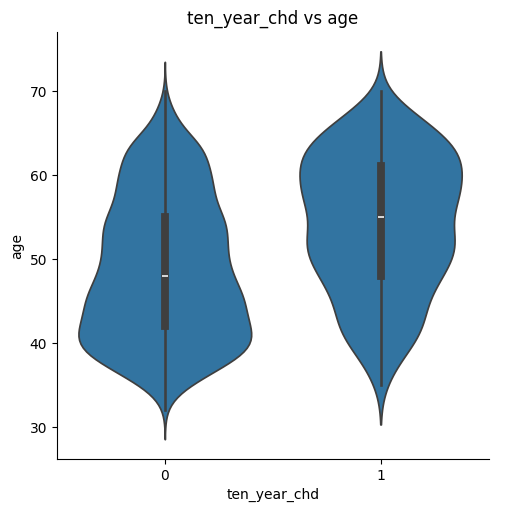

<Figure size 1000x500 with 0 Axes>

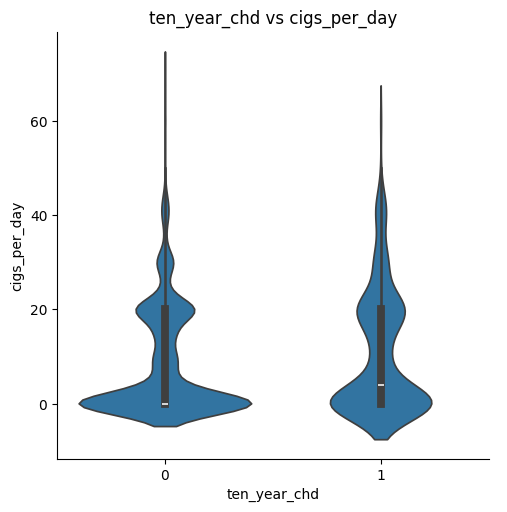

<Figure size 1000x500 with 0 Axes>

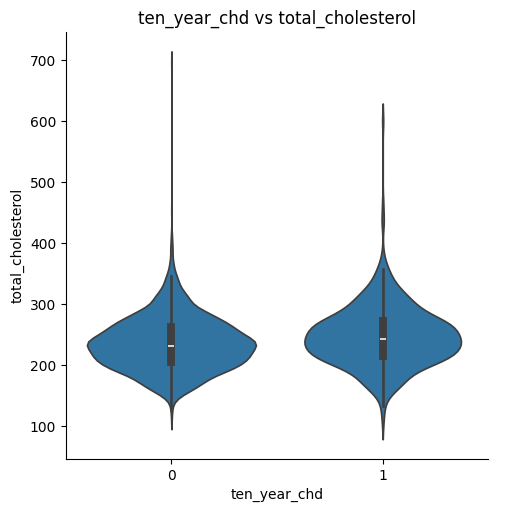

<Figure size 1000x500 with 0 Axes>

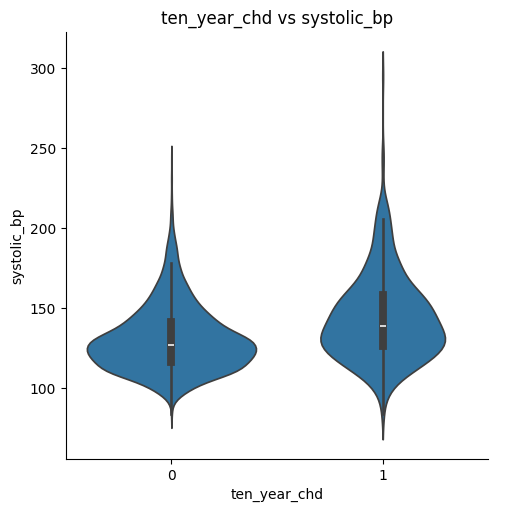

<Figure size 1000x500 with 0 Axes>

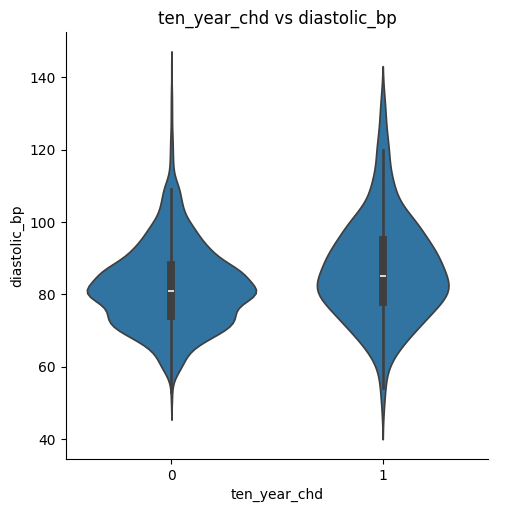

<Figure size 1000x500 with 0 Axes>

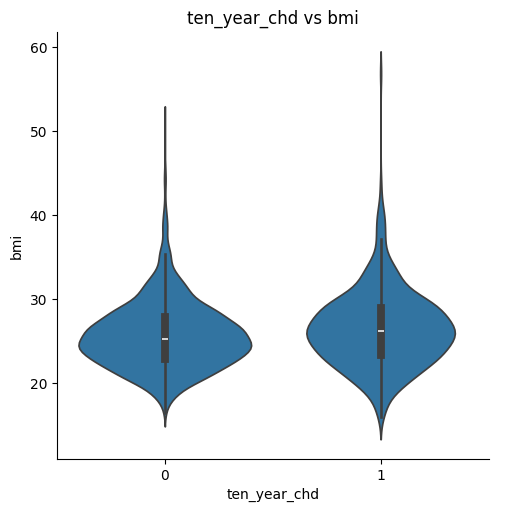

<Figure size 1000x500 with 0 Axes>

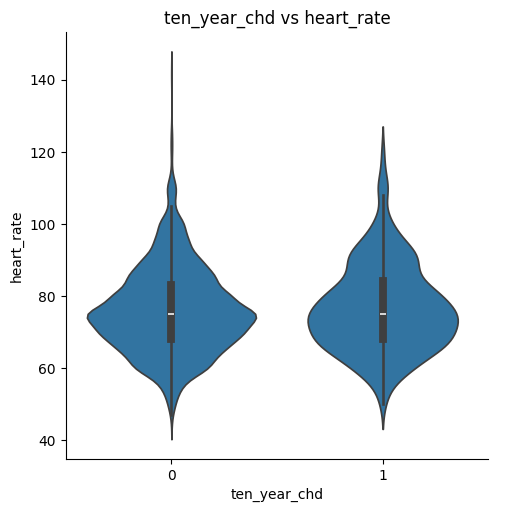

<Figure size 1000x500 with 0 Axes>

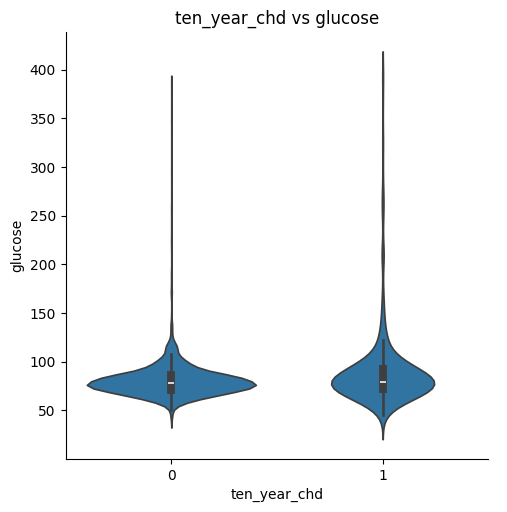

In [ ]:
# Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=df_2,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

1. Why did you choose that particular chart?

The violin chart is a data visualisation technique that combines elements of a box plot with a kernel density plot. It is used to represent data distribution and density across several categories or groupings. The violin chart has the following features:

Shape and width: The violin's shape indicates the data distribution, which is often mirrored and symmetrical. The breadth of the violin at various positions represents the density of data.

Quartiles and median: The violin chart's middle "box" indicates the interquartile range (IQR) and contains the median value. This offers information on the data's spread and central tendency.

Violin charts may be organised and compared by arranging them side by side to examine distributions across different categories or groupings. Visual comparisons of data distribution shapes, spreads, and densities are now possible.

2. What is/are the key takeaways from the chart?

When we compare age to ten_year_chd, we notice that the density of positive instances is larger at older ages than at younger ages, indicating that positive cases are more common in older adults.


When it comes to cigarettes_per_day, nonsmokers have more negative cases than positive cases.



Negative instances for ten_year_chd and glucose have a higher density than positive cases for the same amount of glucose.



The subsequent charts are devoid of useful information.

3. Will the knowledge obtained contribute to a beneficial business impact?
Is there any knowledge that leads to negative growth?

Justify your position using precise reasons.


The insights gathered from the violin chart have the ability to positively affect company by giving vital information for decision-making. Understanding data distribution and density across categories may assist firms in identifying patterns, trends, and prospective areas of emphasis. For example, the discovery that positive instances of ten-year CHD are more common in the elderly underscores the necessity for focused preventative strategies or specialised therapies for this population. Similarly, understanding the link between smoking and unfavourable instances of CHD might help influence smoking cessation programmes or initiatives to lower the risk of CHD.

While the chart's insights might be useful, it's crucial to remember that the influence on business development will be determined by a variety of circumstances. The real business effect would need more investigation and strategic use of these insights. Furthermore, without a precise company environment and objectives, it is difficult to evaluate if any findings will directly contribute to negative growth. Using the insights to better understand the distribution of health disorders and risk factors, on the other hand, has the potential to assist firms in the healthcare industry in developing more effective strategies and actions to enhance patient outcomes and promote positive growth.







**Chart - 5**

<Figure size 1000x500 with 0 Axes>

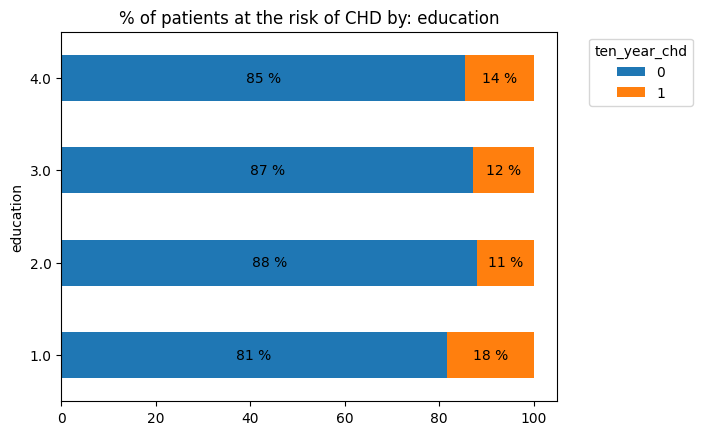

<Figure size 1000x500 with 0 Axes>

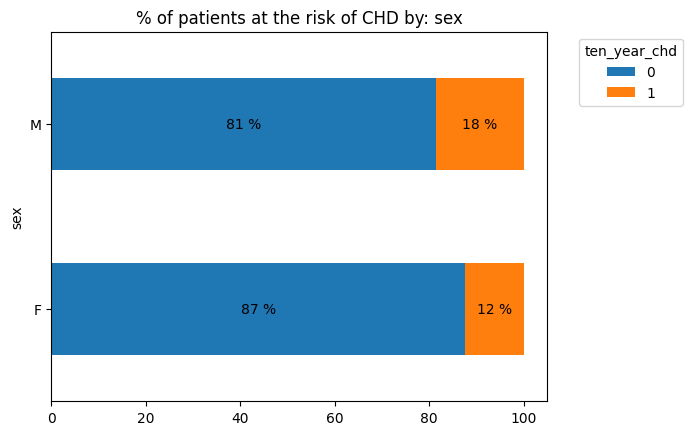

<Figure size 1000x500 with 0 Axes>

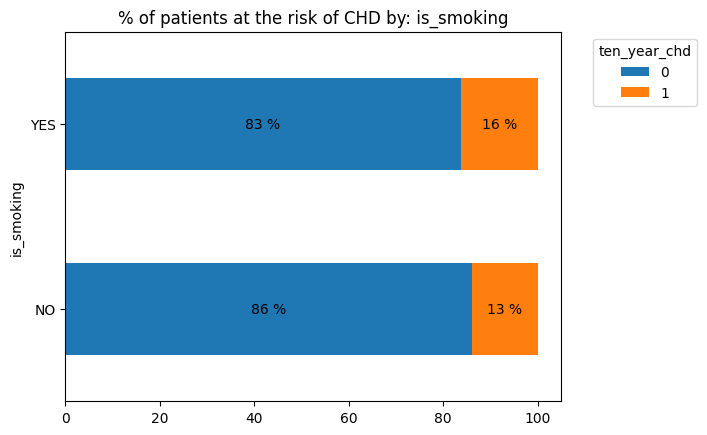

<Figure size 1000x500 with 0 Axes>

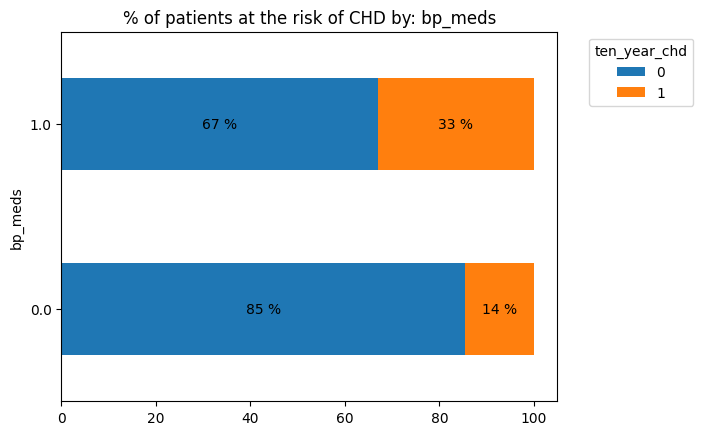

<Figure size 1000x500 with 0 Axes>

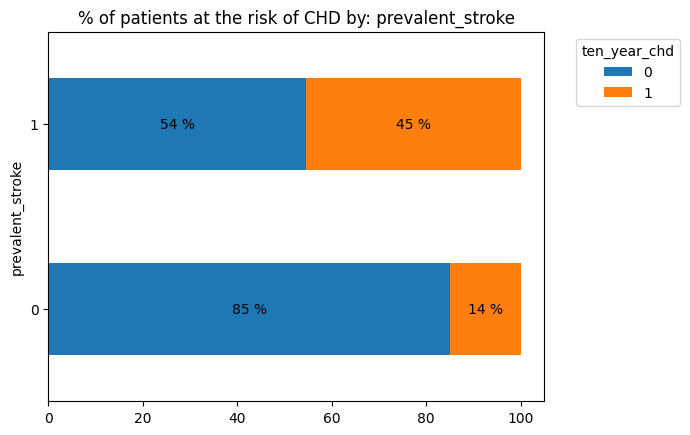

<Figure size 1000x500 with 0 Axes>

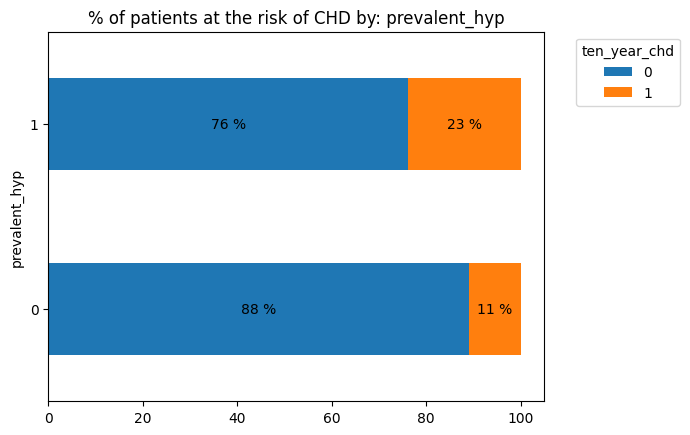

<Figure size 1000x500 with 0 Axes>

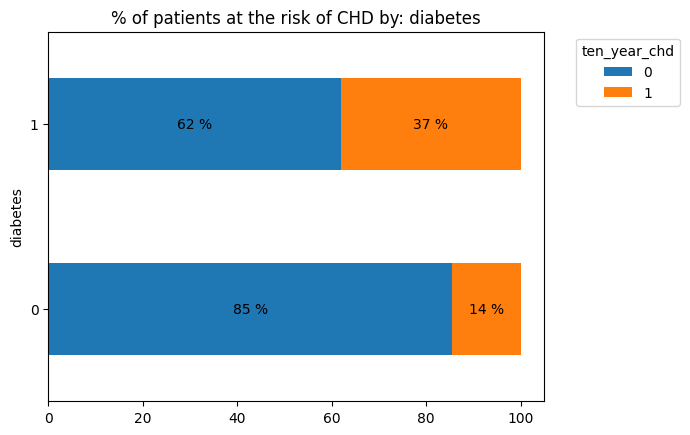

In [ ]:
for i in categorical_var[:-1]:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = df_2.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

1. Why did you choose that particular chart?

A 100% horizontal stacked bar chart is a style of data visualisation that shows the composition or proportion of many categories within a larger total. The stacked horizontal bar chart has the following features:


Proportional comparison: The chart stacks many categories or groupings horizontally, providing for simple visual comparison of their respective proportions within the whole. Each bar depicts the entire picture, while the segments of the bar reflect the many categories or components.



The categories are shown as percentages of the total in the stacked horizontal bar chart. This enables for a clear grasp of each category's proportionate contribution to the total.



Distribution across categories: The graph gives information on the distribution and composition of the categories.

Observing trends and changes in the makeup of categories is made easier by comparing stacked horizontal bar charts over different time periods or groupings. This can reveal changes in proportions or the relative prominence of various categories throughout time.

2. What is/are the key takeaways from the chart?

The proportion of CHD by education does not give much information because it is consistent across all education levels.

In terms of sex, males have a slightly greater risk of CHD than females.

For the affirmative category of is_smoking, a very slightly higher percentage of CHD is found.

We observe a higher percentage of CHD in positive instances of bp_meds and diabetes than in negative cases.

Finally, the proportion for positive prevalent_stroke is over half, showing that the positive CHD is high for positive prevalent_stroke.



**Multivariate Analysis**

**Chart - 6**(Relation between Sex and CigsPerDAY with TenYearCHD)

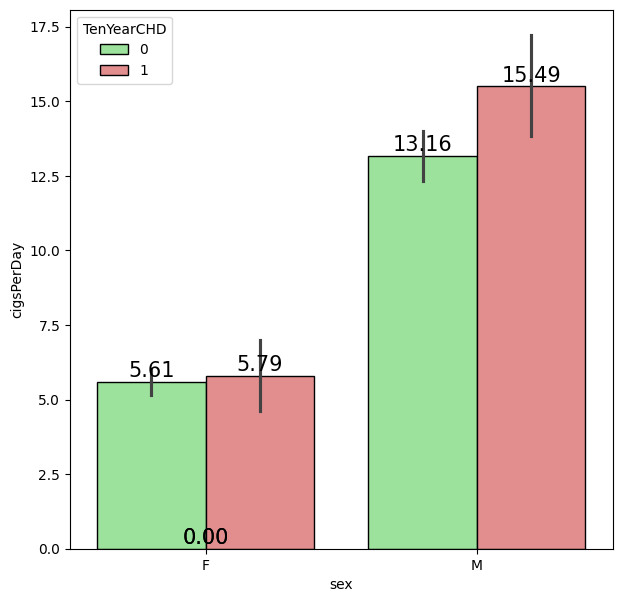

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['sex'],y=df['cigsPerDay'],palette=["lightgreen","lightcoral"],hue=df['TenYearCHD'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

1. Why did you choose that particular chart?

As we all know, bar charts are beneficial for comparing segments of information, such as comparing various categorical or discrete variables, thus we utilised them to represent the distribution of smoking in the column.
2. What is/are the key takeaways from the chart?

Cigarattes are consumed more frequently by men than by women.


Males who smoke more cigarettes are more likely to get heart disease, but females have almost similar chances of being impacted by CHD whether they smoke or not.
3. Will the knowledge obtained contribute to a beneficial business impact?

Is there any knowledge that leads to negative growth?
Justify your position using precise reasons.



As we can see, people are at equal risk whether they smoke or not, so when a healthcare company promotes a specific health care service, such as insurance, routine checkup plans, or tests, they can raise awareness in the non-smoking community as well, increasing the consumer base and providing protection to a larger population while increasing profits.




**Chart - 7**(Are total cholestrol levels related to CHD and Diabetes)

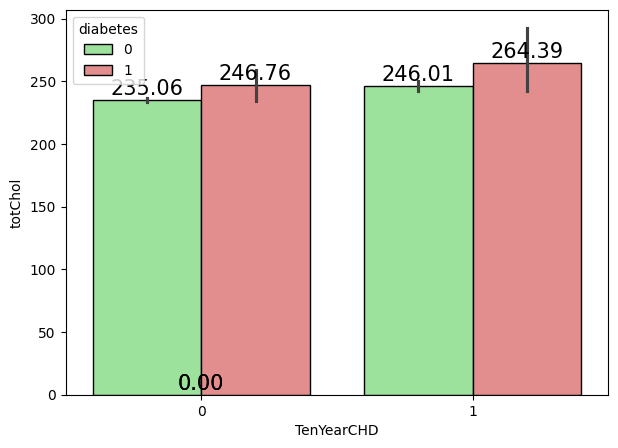

In [ ]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['totChol'],hue=df['diabetes'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

1. Why did you choose that particular chart?

Multiple bar charts were used to depict the risk of TotChol and CHD. If you need to convey a huge quantity of information in a little amount of area, several bar charts are incredibly handy.We mapped it to see how cholesterol levels correlate with heart disease.

2. What is/are the key takeaways from the chart?

As we can see, there isn't much of a difference in cholesterol levels for being the only cause of heart disease. Diabetics are also somewhat more likely to develop CHD.

3. Will the knowledge obtained contribute to a beneficial business impact?

Is there any knowledge that leads to negative growth?
Justify your position using precise reasons.


As seen in the graph above, there is a modest variation in cholesterol levels between CHD patients and normal residents. To avoid a danger, diagnostic or fitness companies can supply drugs or other cholestrol-lowering methods.




**Chart - 8**(Are glucose level impacted by CHD and Diabetes?)

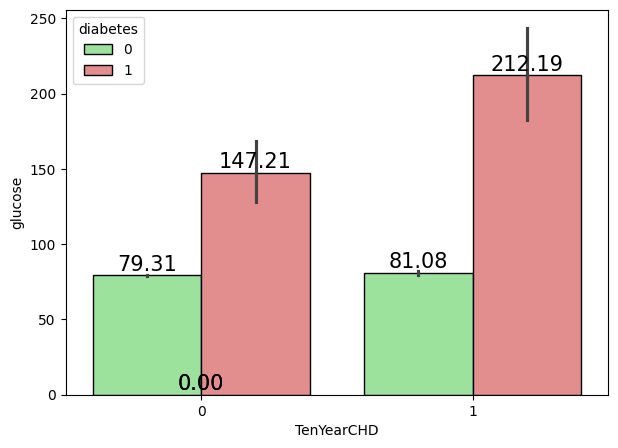

In [ ]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['glucose'],hue=df['diabetes'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

1. Why did you choose that particular chart?

A multiple bar chart is used to depict the glucose-CHD distribution in relation to diabetes.If you need to convey a huge quantity of information in a little amount of area, several bar charts are incredibly handy. Rather than merely having one bar at each division on the horizontal axis.By charting the following data, we may determine whether or not glucose levels cause heart disease.

2. What is/are the key takeaways from the chart?

We may deduce from the following plot that greater glucose levels cause heart damage, increasing diabetes individuals' risk of developing cardiovascular disease.

3. Will the knowledge obtained contribute to a beneficial business impact?

Is there any knowledge that leads to negative growth?
Justify your position using precise reasons.


For the patients' sake, as people with high glucose levels are more likely to develop CHD, treatments and medicines for cardio vascular illnesses can be combined with early indicators of diabetes, since blood viscosity increases with increased glucose concentration.




**Chart - 9**(How heartRate is related to CHD considering patients on BP medication?)

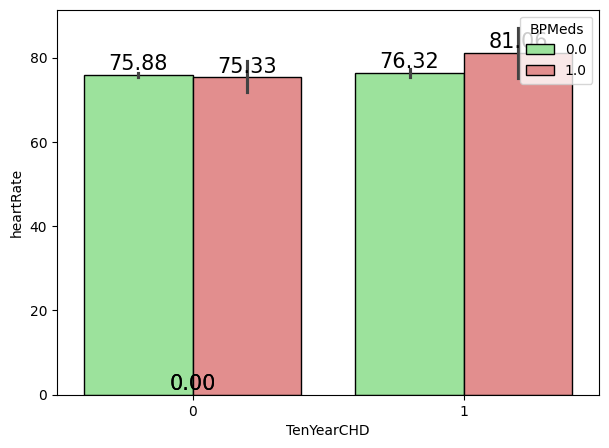

In [ ]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['heartRate'],hue=df['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

1. Why did you choose that particular chart?

Multiple bar charts were used to indicate heart rate and CHD risk. If you need to convey a huge quantity of information in a little amount of area, several bar charts are incredibly handy.We may deduce from the graph above that heart rate is connected to heart disease.

2. What is/are the key takeaways from the chart?

We may deduce from the above plot that BP patients who take BP medications and have a greater heart rate are more likely to develop CHD.

3. Will the knowledge obtained contribute to a beneficial business impact?

Is there any knowledge that leads to negative growth?
Justify your position using precise reasons.


As a greater heart rate increases the risk of heart disease, spreading awareness may help different health, nutrition and fitness, insurance, and diagnostic companies gain income while also assisting the people to adapt more to better habits and keep their heart rates in check.




**Chart - 10**(Are patients with Systolic and Diastolic BP at risk of CHD?)

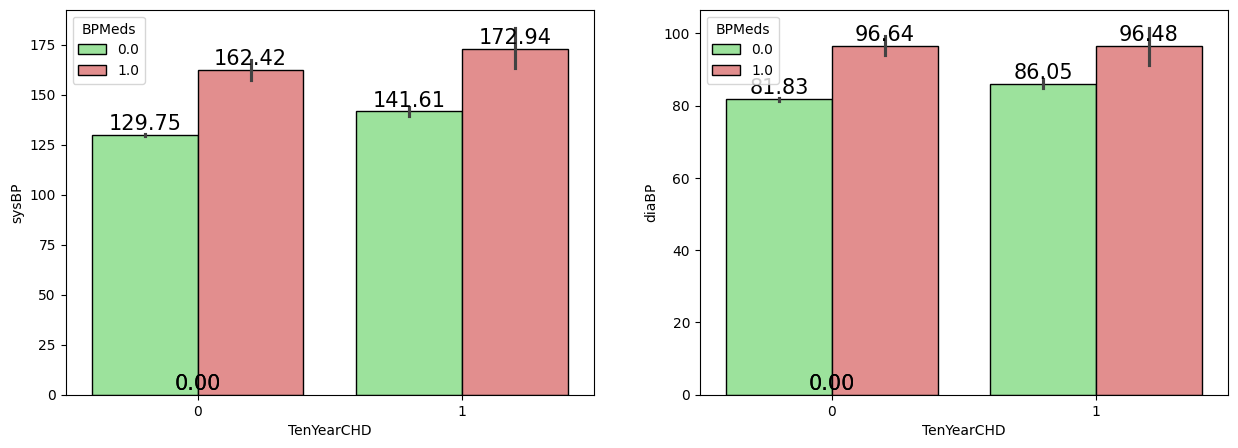

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plots=sns.barplot(x=df['TenYearCHD'],y=df['sysBP'],hue=df['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.subplot(1,2,2)
plots=sns.barplot(x=df['TenYearCHD'],y=df['diaBP'],hue=df['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

1. Why did you choose that particular chart?

A multiple bar chart is used to depict the SysBP/diaBP-CHD distribution in relation to BPmeds.If you need to convey a huge quantity of information in a little amount of area, several bar charts are incredibly handy. Rather than merely having one bar at each division on the horizontal axis.We created the graph above to determine if people with high systolic and diastolic blood pressure are at risk of heart disease.

2. What is/are the key takeaways from the chart?

The graph shows that persons on blood pressure medication had high sysBP and diaBP.Even these patients have a significant risk of suffering from CHD.

3. Will the knowledge obtained contribute to a beneficial business impact?

Is there any knowledge that leads to negative growth?
 Justify your position using precise reasons.


Healthcare providers and doctors can target and thoroughly examine BP medication patients. This reduces the cost of diagnosis while increasing the company's income.




**Chart - 11**(Correlation Heatmap)

<Axes: >

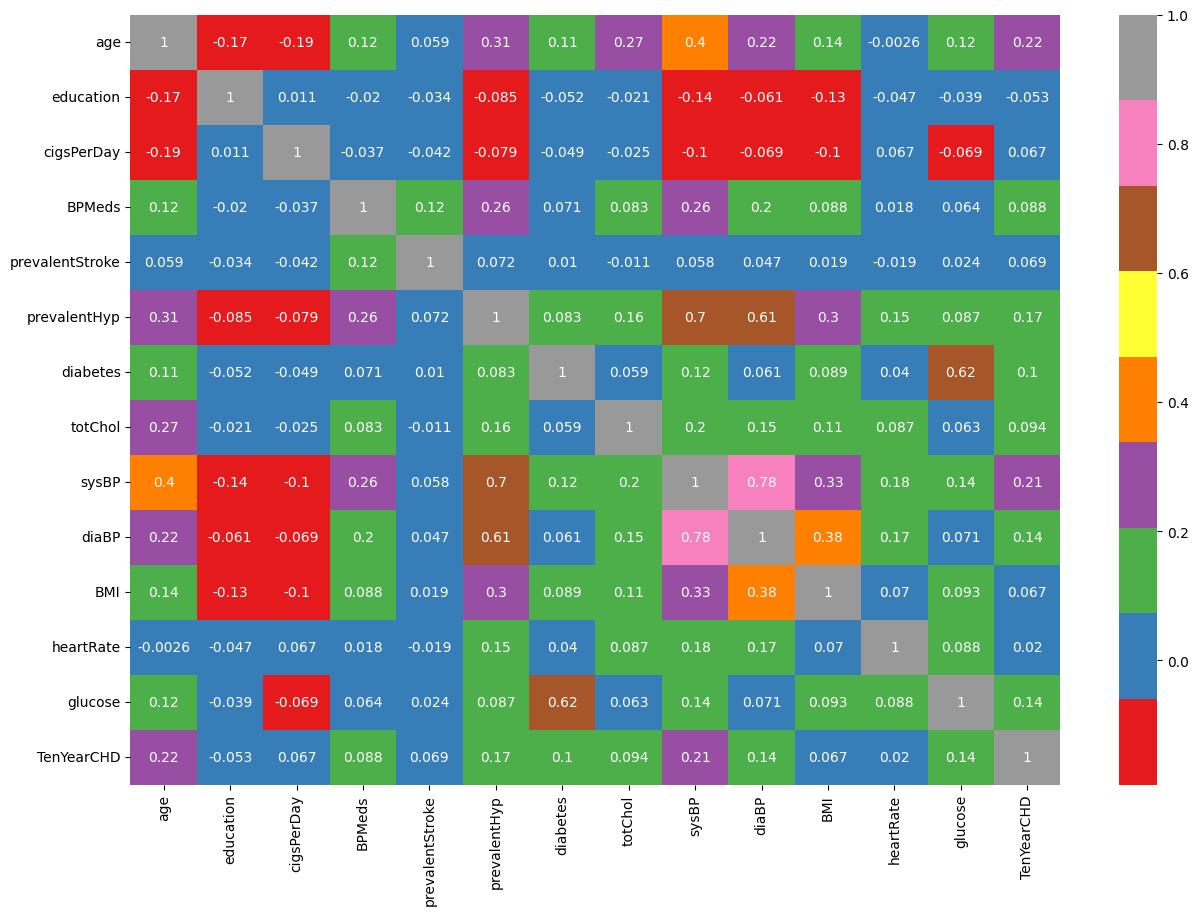

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=sns.color_palette("Set1"))
# The numeric_only parameter is set to True to include only numerical features
# for correlation calculation.

1. Why did you choose that particular chart?

Heat maps are the greatest way to depict correlations. Heat Maps are used to better visualise the number of locations/events within a dataset and to guide viewers to the most important parts of data visualisations.

2. What is/are the key takeaways from the chart?

We can notice a significant link between the following:


sysBP and diaBP

prevalenthypotension and diaBP

predominantHyp and sysBP

Diabetes and blood glucose levels

The following have a low correlation:

BMI and education , diaBP and education , sysBP and education , prevalentHyp and education , age and education
BMI and cigPerDay , diaBP and cigPerDay , sysBP and cigPerDay , prevalentHyp and cigPerDay , age and cigPerDay




**Chart -12**(Pair Plot)

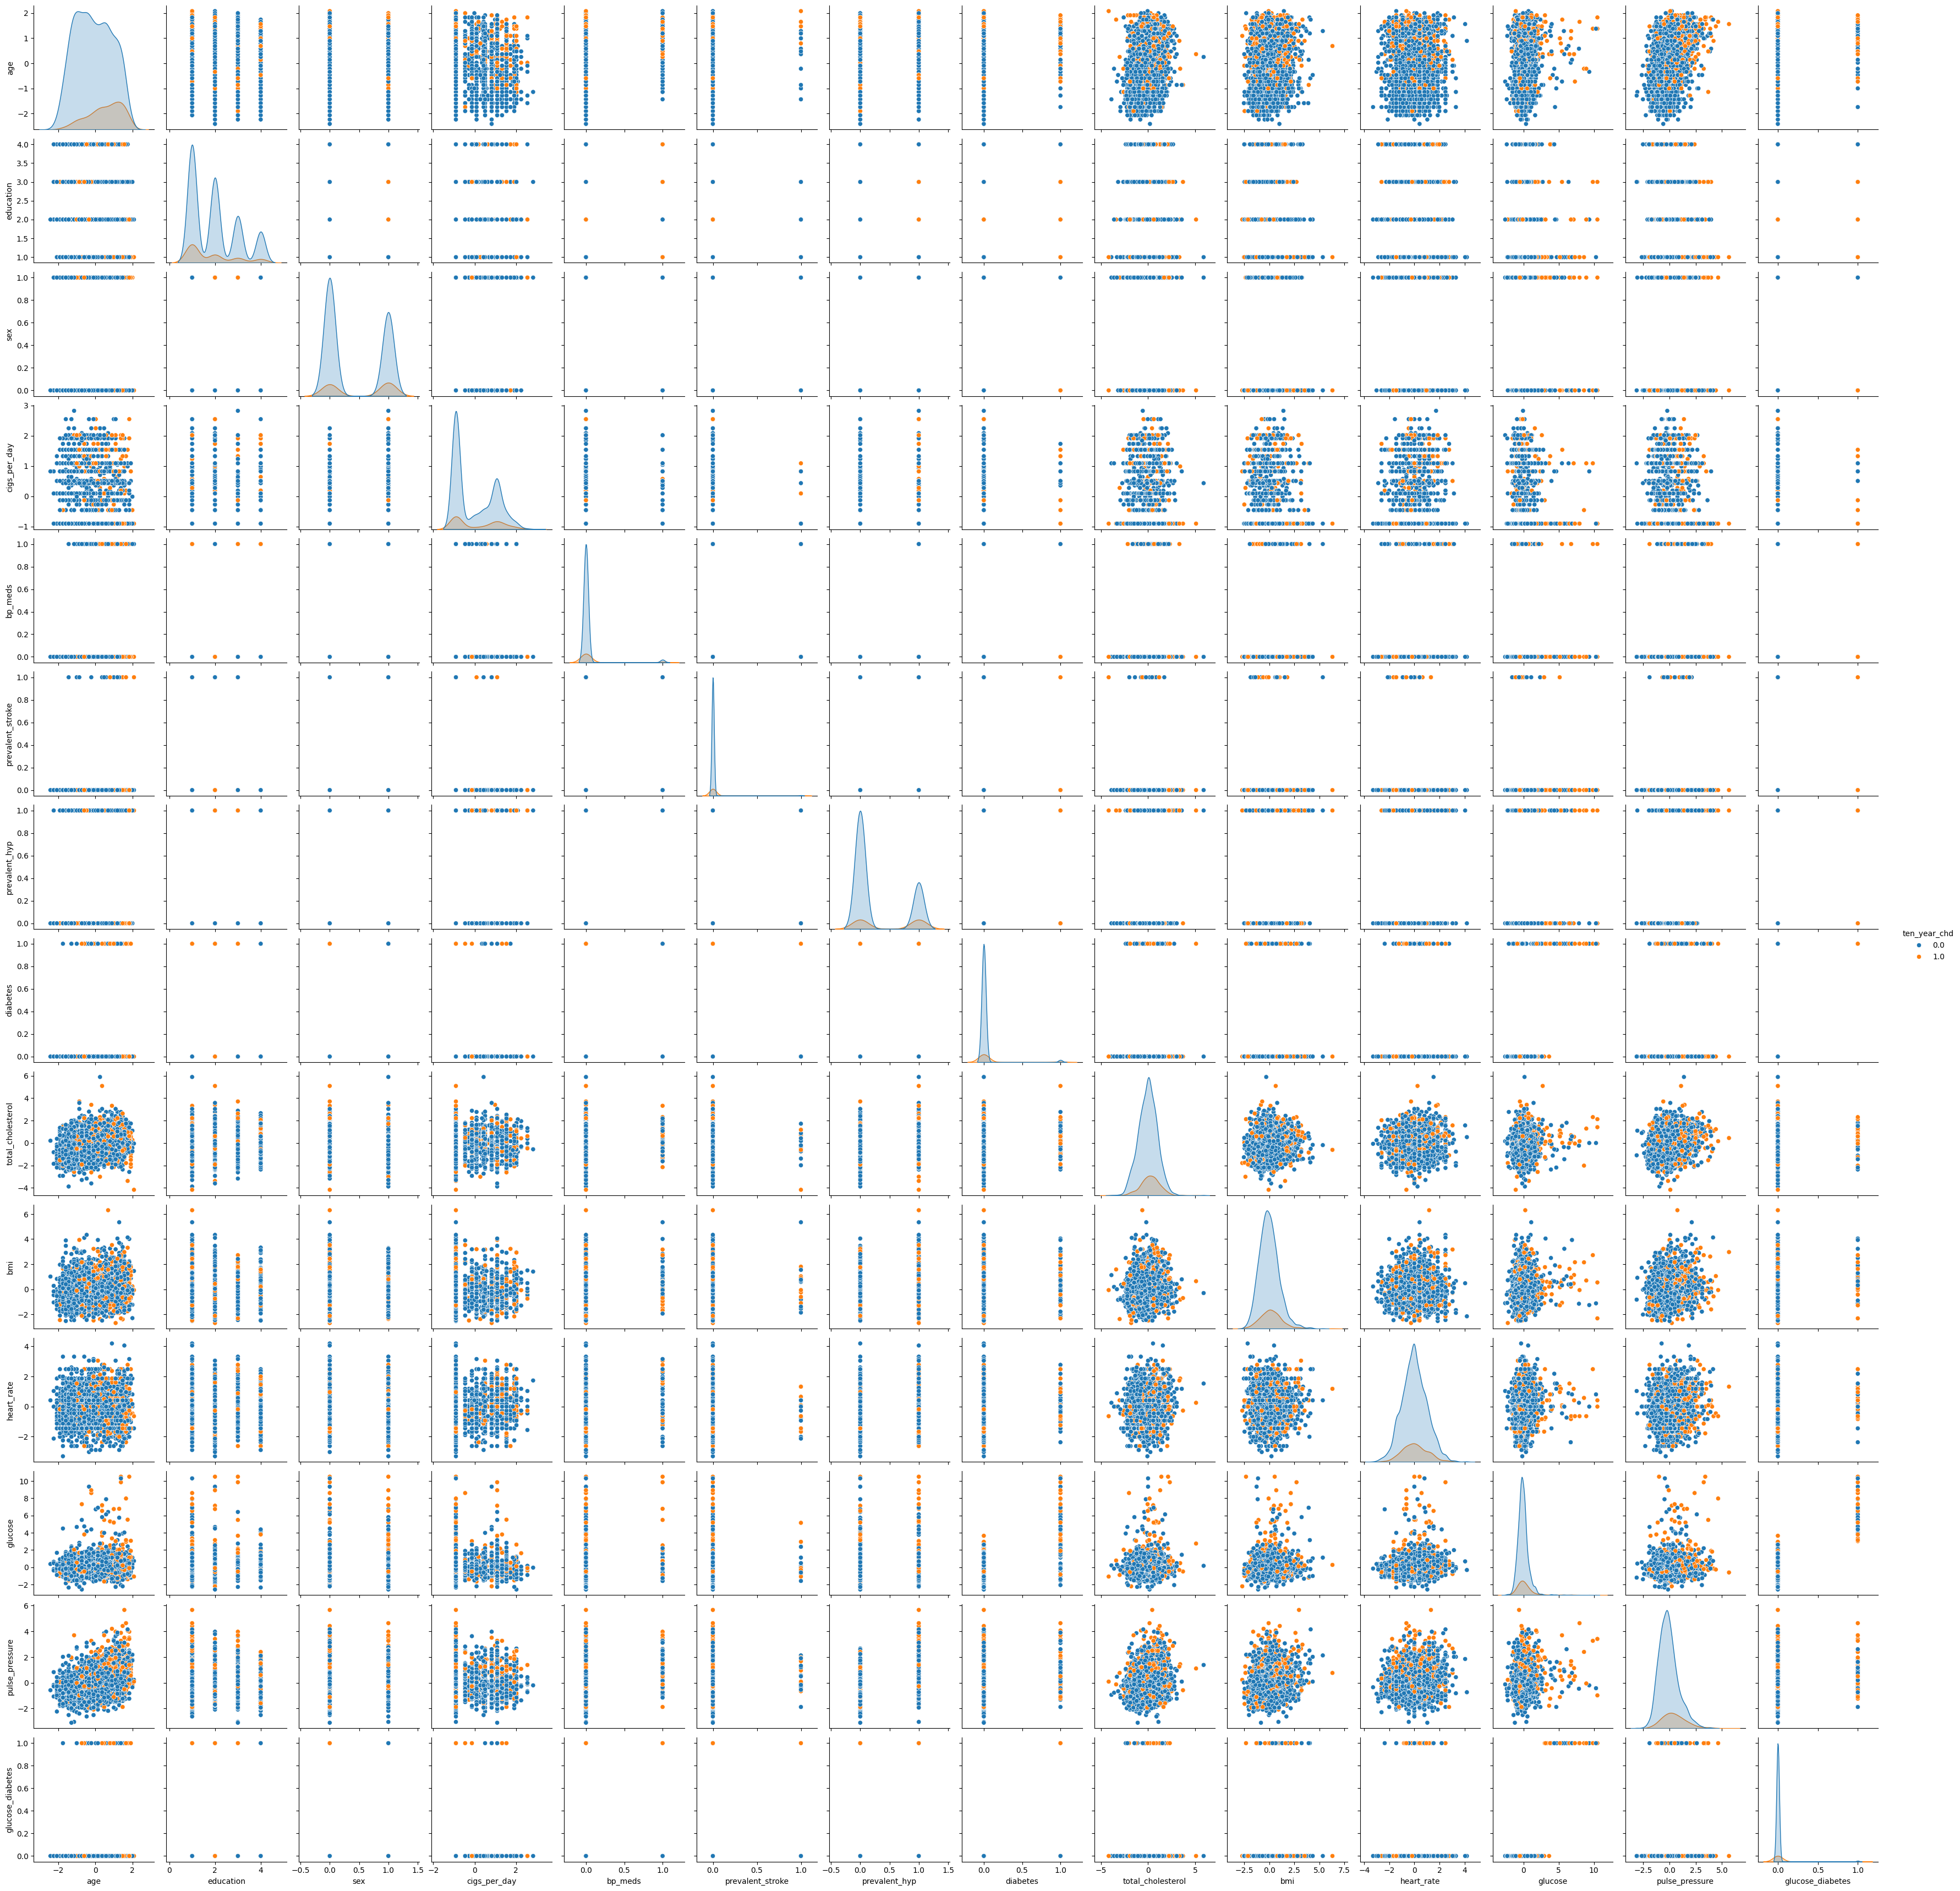

In [ ]:
# Pair Plot visualization code
sns.pairplot(df_2, hue="ten_year_chd")
plt.show()

1. Why did you choose that particular chart?

Pair plots are used to determine the optimal collection of characteristics to describe a connection between two variables or to construct the most distinct clusters.



2. What is/are the key takeaways from the chart?


The preceding graph indicates that sysBP and diaBP are positively connected.



# **Hypothesis Testing**

 Hypothetical Statement -1

1. State your research hypothesis in the form of a null hypothesis and an alternative hypothesis.
Please respond here.

Null Hypothesis (H0) - There are no outliers in the data set.

Alternative Hypothesis (H1) - Outliers exist in the dataset.



2. Perform an appropriate statistical test.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'age'),
  Text(1, 0, 'education'),
  Text(2, 0, 'cigsPerDay'),
  Text(3, 0, 'BPMeds'),
  Text(4, 0, 'prevalentStroke'),
  Text(5, 0, 'prevalentHyp'),
  Text(6, 0, 'diabetes'),
  Text(7, 0, 'totChol'),
  Text(8, 0, 'sysBP'),
  Text(9, 0, 'diaBP'),
  Text(10, 0, 'BMI'),
  Text(11, 0, 'heartRate'),
  Text(12, 0, 'glucose'),
  Text(13, 0, 'TenYearCHD')])

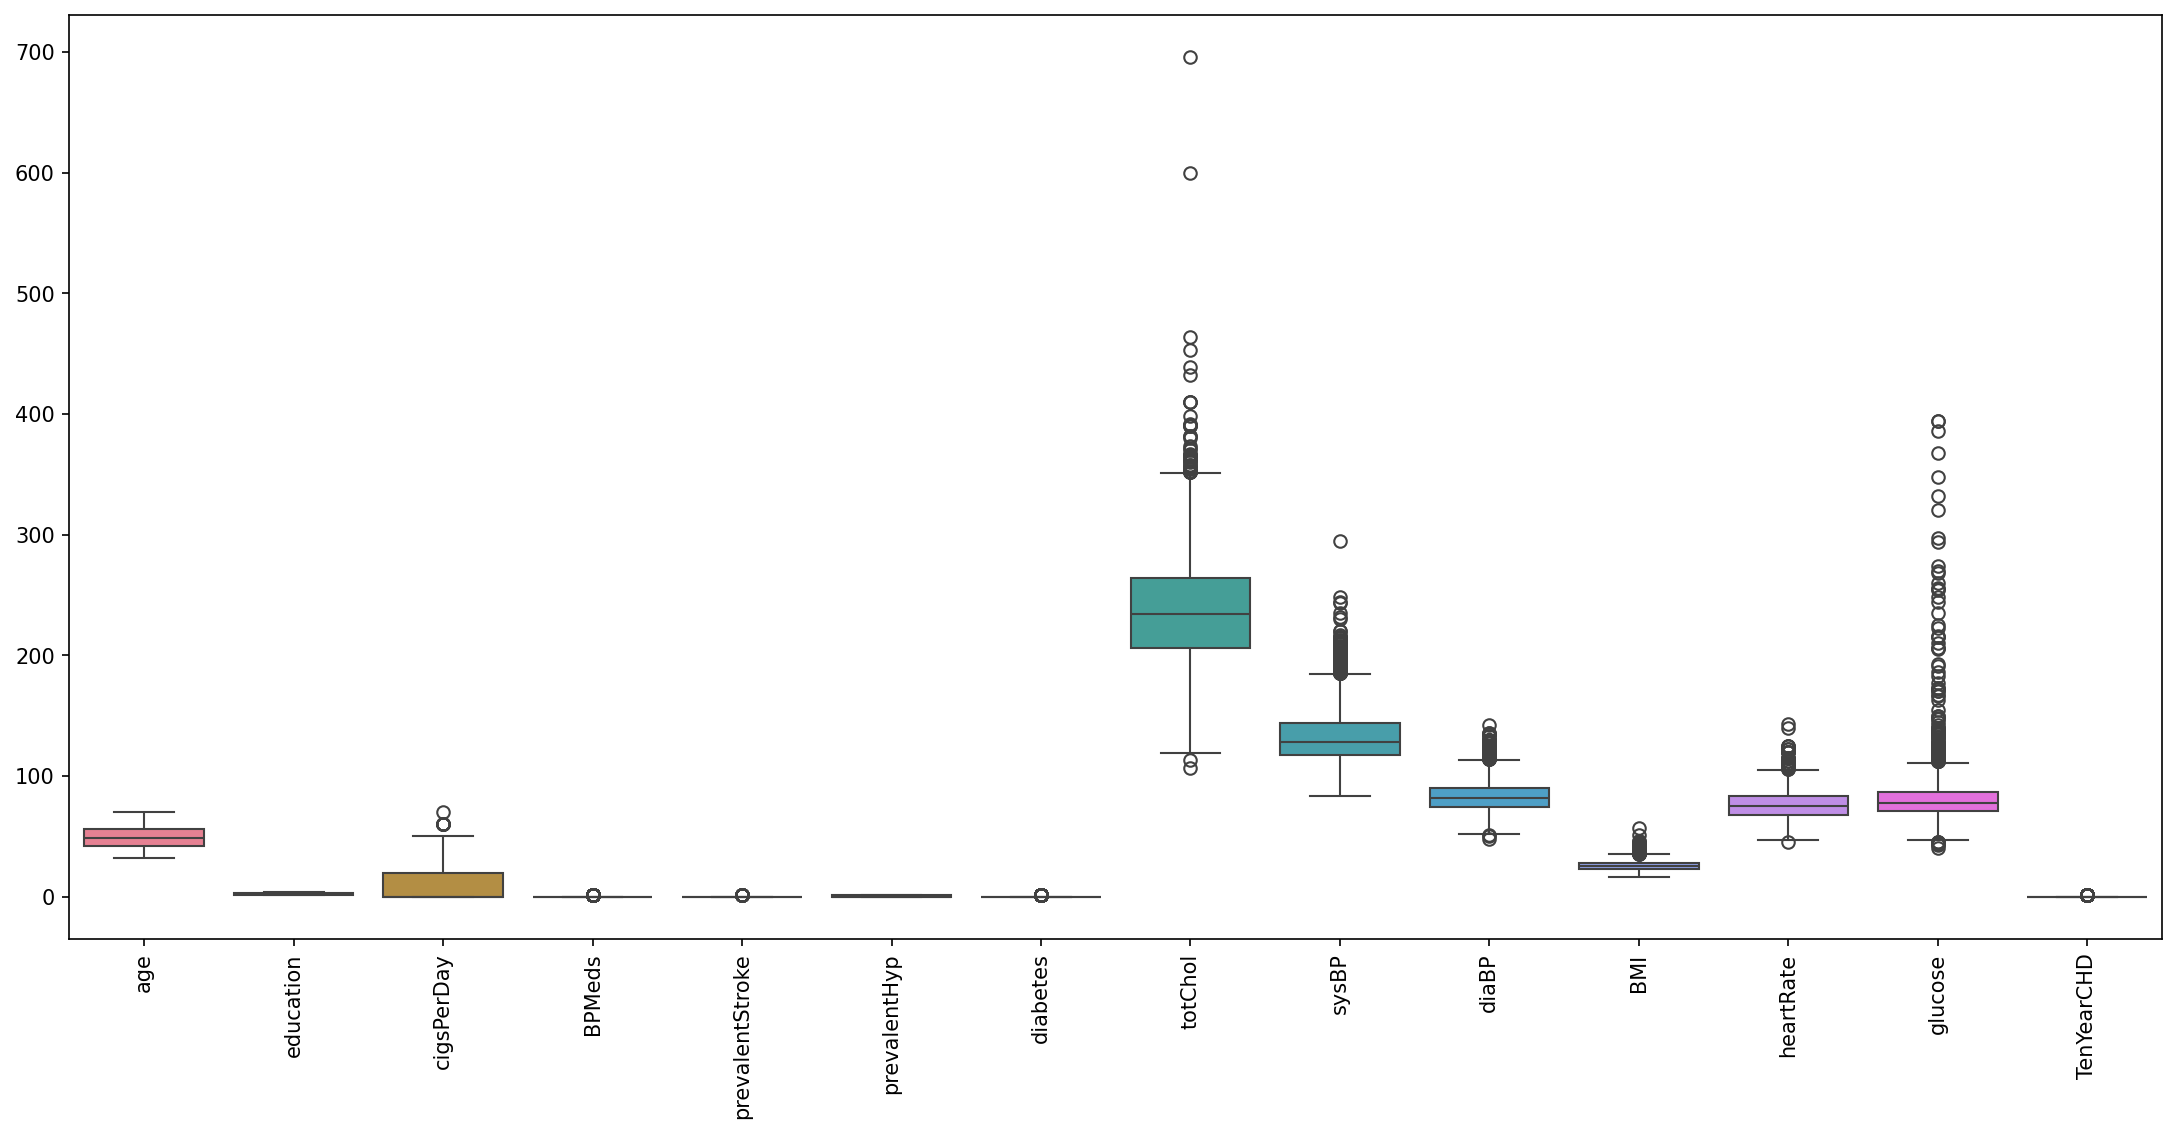

In [ ]:
# outliers check
plt.figure(figsize=(18,8),dpi=150)
sns.boxplot(data = df)
plt.xticks(rotation=90)

Which statistical test did you use to calculate the P-Value?

In order to determine the presence of outliers, we employed boxplots for hypothesis testing.


Why did you select this particular statistical test?

Boxplots show a five-number summary of data: first quartile, mean, third quartile, minimum, maximum, and numbers beyond min and max are outliers. and the above test plainly shows that we must reject our null hypothesis since our dataset contains many outliers.


**Hypothetical Statement - 2**

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:

Null Hypothesis(H0) - Increasing age is an important factor that leads to cardiovascular diseases.

Alternative Hypothesis(H1) - Age is not related with cardiovascular risks.

2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# defining the table
data = [df['age'], df['TenYearCHD']]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

p value is 1.0
Accept null hypothesis


Which statistical test did you use to calculate the P-Value?

Chi Square Analysis


Why did you select this particular statistical test?


We conducted the chi-square test to see if there was a significant relationship between the two variables. The two variables in our situation are 'age' and 'TenyearCHD'. Because the test results reveal that age and risk have a considerable influence on each other, we were unable to reject the null hypothesis.



**Hypothetical Statement - 3**

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0) - mean of total cholestrol = 237

Alternative Hypothesis(H1) - mean of total cholestrol != 237

2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['totChol'], x2=None, value=237)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("failed to reject null hypothesis")

nan
failed to reject null hypothesis


Which statistical test have you done to obtain P-Value?

Z-Test

Why did you choose the specific statistical test?

Z-Test is used usually when data points are independent of each other and data is normally distributed. Failed to reject null hypothesis as the condition stands true.

# **6. Feature Engineering & Data Pre-processing**

1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_2.isna().sum()

age                  0
education            0
sex                  0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
pulse_pressure       0
glucose_diabetes     0
dtype: int64

In [ ]:
# Replacing the missing values in the categorical columns with its mode
df_2['education'] = df_2['education'].fillna(df_2['education'].mode()[0])
df_2['bp_meds'] = df_2['bp_meds'].fillna(df_2['bp_meds'].mode()[0])

In [ ]:
# Mean and median number of cigarettes per day
df_2.cigs_per_day.mean().round(0),df_2.cigs_per_day.median()

(9.0, 0.0)

In [ ]:
# All missing values in the cigs_per_day column
df_2[df_2['cigs_per_day'].isna()]

age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
422    55        1.0   F        YES           NaN      0.0                 0   
466    45        3.0   M        YES           NaN      0.0                 0   
469    42        1.0   M        YES           NaN      0.0                 0   
491    61        1.0   F        YES           NaN      0.0                 0   
538    41        1.0   F        YES           NaN      0.0                 0   
767    54        1.0   M        YES           NaN      0.0                 0   
1461   47        2.0   F        YES           NaN      0.0                 0   
1467   49        1.0   F        YES           NaN      0.0                 0   
1597   57        1.0   F        YES           NaN      0.0                 0   
1986   49        2.0   F        YES           NaN      0.0                 0   
2031   58        4.0   F        YES           NaN      0.0                 0   
2087   49        4.0   M        YES           NaN      0.0                 0   
2240   47        3.0   F        YES           NaN      0.0                 0   
2284   45        2.0   M        YES           NaN      0.0                 0   
2527   58        2.0   M        YES           NaN      0.0                 0   
2638   57        1.0   M        YES           NaN      0.0                 0   
2648   39        2.0   M        YES           NaN      0.0                 0   
2723   43        4.0   M        YES           NaN      0.0                 0   
2879   42        1.0   M        YES           NaN      0.0                 0   
2945   53        2.0   M        YES           NaN      0.0                 0   
3301   55        1.0   M        YES           NaN      0.0                 0   
3378   39        3.0   F        YES           NaN      0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
422               1         0              213.0        163.0          91.0   
466               1         0              170.0        145.5          99.0   
469               0         0              196.0        123.0          73.0   
491               1         0              356.0        168.0          98.0   
538               0         0              171.0        135.0          82.5   
767               0         0              219.0        110.0          72.0   
1461              0         0              365.0        127.0          76.0   
1467              0         0              252.0        123.0          69.0   
1597              0         0              229.0        115.0          69.0   
1986              1         0              233.0        158.0         102.0   
2031              1         0              270.0        195.0         117.5   
2087              0         0              256.0        127.5          81.5   
2240              0         0              321.0        132.0          88.0   
2284              0         0              248.0        121.0          72.0   
2527              0         0              235.0        127.5          76.0   
2638              0         0              223.0        107.5          72.5   
2648              0         0              285.0        121.0          82.0   
2723              0         0              222.0        109.5          69.0   
2879              0         0              226.0        119.0          80.0   
2945              0         0              276.0        130.0          86.0   
3301              0         0              214.0        132.5          85.5   
3378              0         0              197.0        126.5          76.5   

        bmi  heart_rate  glucose  ten_year_chd  
422   28.66        69.0     66.0             0  
466   26.74        83.0     85.0             0  
469   22.06        66.0      NaN             0  
491   27.30       103.0    106.0             0  
538   24.35        79.0     82.0             0  
767   26.05        95.0     86.0             0  
1461

In [ ]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
df_2[df_2['is_smoking']=='YES']['cigs_per_day'].mean(),df_2[df_2['is_smoking']=='YES']['cigs_per_day'].median()

(18.345945945945946, 20.0)

In [ ]:
# Imputing the missing values in the cigs_per_day
df_2['cigs_per_day'] = df_2['cigs_per_day'].fillna(df_2[df_2['is_smoking']=='YES']['cigs_per_day'].median())

In [ ]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

df_2[(df_2['is_smoking']=='NO') & (df_2['cigs_per_day']>0)]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []

In [ ]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

df_2[(df_2['is_smoking']=='YES') & (df_2['cigs_per_day']==0)]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []

It is observed that there are no incorrect entry.

**Cholesterol - BMI - Heartrate**

In [ ]:
# Mean and median for total_cholesterol
df_2.total_cholesterol.mean(),df_2.total_cholesterol.median()

(237.07428400954655, 234.0)

In [ ]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
df_2['total_cholesterol'] = df_2['total_cholesterol'].fillna(df_2['total_cholesterol'].median())
df_2['bmi'] = df_2['bmi'].fillna(df_2['bmi'].median())
df_2['heart_rate'] = df_2['heart_rate'].fillna(df_2['heart_rate'].median())

In [ ]:
# mean and median of total_cholesterol after median imputation
df_2.total_cholesterol.mean(),df_2.total_cholesterol.median()

(237.03982300884957, 234.0)

In [ ]:
# mean and median of bmi after median imputation
df_2.bmi.mean(),df_2.bmi.median()

(25.793250737463126, 25.38)

In [ ]:
# mean and median of heart_rate after median imputation
df_2.heart_rate.mean(),df_2.heart_rate.median()

(75.97699115044247, 75.0)

Glucose

In [ ]:
# total missing values in glucose
df_2.glucose.isna().sum()

304

In [ ]:
# Mean, median, and mode for glucose
df_2.glucose.mean(),df_2.glucose.median(),df_2.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

The data distribution is biassed to the positive, with values that go outside the normal range.


304 data points are missing from the glucose column. Using the mean or median to fill in these numbers might result in severe errors.



To address this, the KNN imputer approach might be used to substitute missing data.



Missing values in a time series dataset might be approximated via interpolation, which is a method of estimating missing data points.



In [ ]:
df_2

age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
0      64        2.0   F        YES           3.0      0.0                 0   
1      36        4.0   M         NO           0.0      0.0                 0   
2      46        1.0   F        YES          10.0      0.0                 0   
3      50        1.0   M        YES          20.0      0.0                 0   
4      64        1.0   F        YES          30.0      0.0                 0   
...   ...        ...  ..        ...           ...      ...               ...   
3385   60        1.0   F         NO           0.0      0.0                 0   
3386   46        1.0   F         NO           0.0      0.0                 0   
3387   44        3.0   M        YES           3.0      0.0                 0   
3388   60        1.0   M         NO           0.0      0.0                 0   
3389   54        3.0   F         NO           0.0      0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0                 0         0              221.0        148.0          85.0   
1                 1         0              212.0        168.0          98.0   
2                 0         0              250.0        116.0          71.0   
3                 1         0              233.0        158.0          88.0   
4                 0         0              241.0        136.5          85.0   
...             ...       ...                ...          ...           ...   
3385              0         0              261.0        123.5          79.0   
3386              0         0              199.0        102.0          56.0   
3387              1         0              352.0        164.0         119.0   
3388              1         0              191.0        167.0         105.0   
3389              0         0              288.0        124.0          77.0   

        bmi  heart_rate  glucose  ten_year_chd  
0     25.38        90.0     80.0             1  
1     29.77        72.0     75.0             0  
2     20.35        88.0     94.0             0  
3     28.26        68.0     94.0             1  
4     26.42        70.0     77.0             0  
...     ...         ...      ...           ...  
3385  29.28        70.0    103.0             0  
3386  21.96        80.0     84.0             0  
3387  28.92        73.0     72.0             1  
3388  23.01        80.0     85.0             0  
3389  29.88        79.0     92.0             0  

[3390 rows x 16 columns]

In [ ]:
# Replacing the string values of the binary column with 0 and 1

df_2['sex'] = np.where(df_2['sex'] == 'M',1,0)
df_2['is_smoking'] = np.where(df_2['is_smoking'] == 'YES',1,0)

In [ ]:
# changing datatypes
df_2 = df_2.astype({'age': int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [ ]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df_2)
df_2 = pd.DataFrame(imputed, columns=df_2.columns)


In [ ]:
# mean, median, and mode for glucose after knn imputation
df_2.glucose.mean(),df_2.glucose.median(),df_2.glucose.mode()

(82.04327433628319,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

In [ ]:
# checking for missing values
df_2.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

What missing value imputation approaches have you employed, and why have you used them?

To deal with missing values in the dataset, I employed median, mode, and KNN imputation approaches. These strategies were chosen because they are suited for the nature of the data and the specific situation at hand. For example, I utilised median imputation for skewed numerical data since it is a reliable indicator of central tendency that is unaffected by outliers.

For categorical variables, I chose mode imputation because it is the most frequent value and can be a decent estimate for missing values.



I also used KNN imputation, which works by searching the dataset for comparable observations and utilising their values to impute missing values. When there are patterns or correlations in the data that may be used to produce more accurate imputations, this method can be valuable.



**2. Handling Outliers**

In [ ]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data:
        if (upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

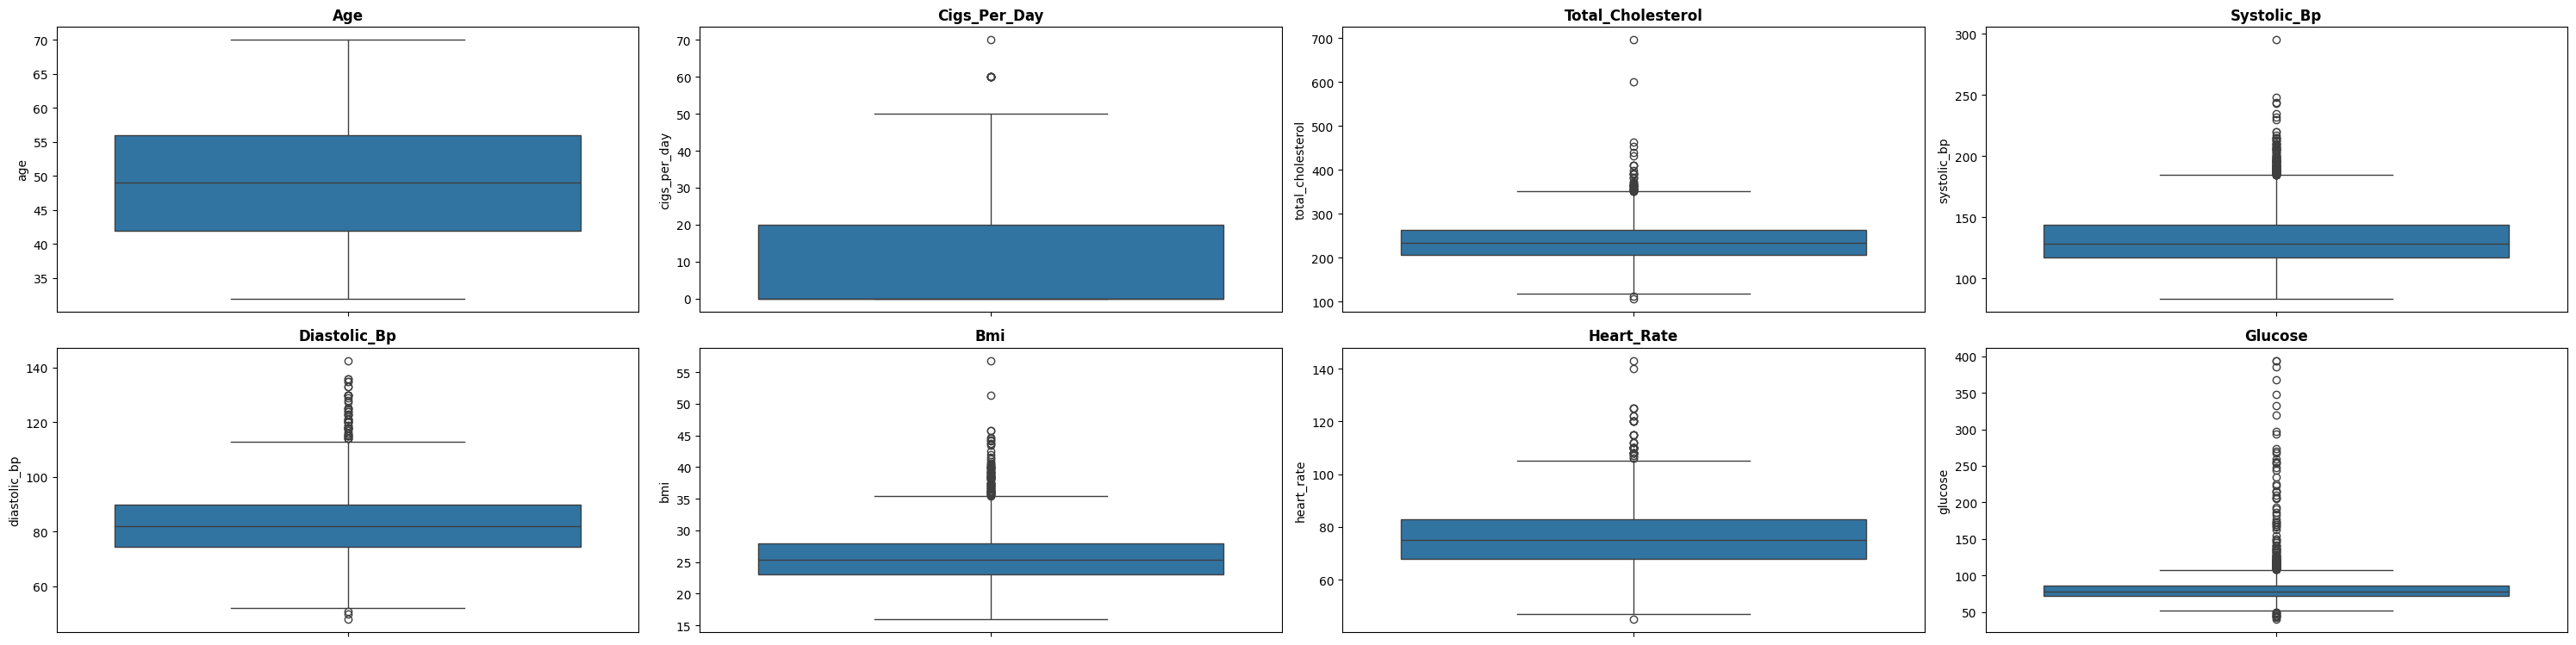

In [ ]:
# Plotting box plot for all the continous variable
plt.figure(figsize=(30,15))
for n,column in enumerate(continuous_var):
  plt.subplot(4, 4, n+1)
  sns.boxplot(df_2[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continuous_var:
  print(feature,":")
  detect_outliers(df_2[feature])
  print("-"*50)

age :
q1:42.0, q2:49.0, q3:56.0
Lower bound: 21.0, Upper bound: 77.0, IQR: 14.0
Total number of outliers are: 3390
Total percentage of outlier is: 100.0 %
--------------------------------------------------
cigs_per_day :
q1:0.0, q2:0.0, q3:20.0
Lower bound: -30.0, Upper bound: 50.0, IQR: 20.0
Total number of outliers are: 3390
Total percentage of outlier is: 100.0 %
--------------------------------------------------
total_cholesterol :
q1:206.0, q2:234.0, q3:264.0
Lower bound: 119.0, Upper bound: 351.0, IQR: 58.0
Total number of outliers are: 3390
Total percentage of outlier is: 100.0 %
--------------------------------------------------
systolic_bp :
q1:117.0, q2:128.5, q3:144.0
Lower bound: 76.5, Upper bound: 184.5, IQR: 27.0
Total number of outliers are: 3390
Total percentage of outlier is: 100.0 %
--------------------------------------------------
diastolic_bp :
q1:74.5, q2:82.0, q3:90.0
Lower bound: 51.25, Upper bound: 113.25, IQR: 15.5
Total number of outliers are: 3390
Total perc

In [ ]:
# Checking the object dtype variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [ ]:
# Encode your categorical columns
df_2['sex'].replace({'M':0,'F':1},inplace=True)
df_2['is_smoking'].replace({'NO':0,'YES':1},inplace=True)

In [ ]:
# Rechecking the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [ ]:
## Manipulate Features to minimize feature correlation and create new features
# Checking the features to exctract new feature from it
df_2.head()

age  education  sex  is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
0  64.0        2.0  0.0         1.0           3.0      0.0               0.0   
1  36.0        4.0  1.0         0.0           0.0      0.0               0.0   
2  46.0        1.0  0.0         1.0          10.0      0.0               0.0   
3  50.0        1.0  1.0         1.0          20.0      0.0               0.0   
4  64.0        1.0  0.0         1.0          30.0      0.0               0.0   

   prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0            0.0       0.0              221.0        148.0          85.0   
1            1.0       0.0              212.0        168.0          98.0   
2            0.0       0.0              250.0        116.0          71.0   
3            1.0       0.0              233.0        158.0          88.0   
4            0.0       0.0              241.0        136.5          85.0   

     bmi  heart_rate  glucose  ten_year_chd  
0  25.38        90.0     80.0           1.0  
1  29.77        72.0     75.0           0.0  
2  20.35        88.0     94.0           0.0  
3  28.26        68.0     94.0           1.0  
4  26.42        70.0     77.0           0.0

In [ ]:
# Checking the head after extracting new feature
df_2.head()

age  education  sex  is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
0  64.0        2.0  0.0         1.0           3.0      0.0               0.0   
1  36.0        4.0  1.0         0.0           0.0      0.0               0.0   
2  46.0        1.0  0.0         1.0          10.0      0.0               0.0   
3  50.0        1.0  1.0         1.0          20.0      0.0               0.0   
4  64.0        1.0  0.0         1.0          30.0      0.0               0.0   

   prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0            0.0       0.0              221.0        148.0          85.0   
1            1.0       0.0              212.0        168.0          98.0   
2            0.0       0.0              250.0        116.0          71.0   
3            1.0       0.0              233.0        158.0          88.0   
4            0.0       0.0              241.0        136.5          85.0   

     bmi  heart_rate  glucose  ten_year_chd  
0  25.38        90.0     80.0           1.0  
1  29.77        72.0     75.0           0.0  
2  20.35        88.0     94.0           0.0  
3  28.26        68.0     94.0           1.0  
4  26.42        70.0     77.0           0.0

In [ ]:
# Extracting new feature pulse_pressure with the help of sysBP and diaBP
df_2['pulse_pressure']= round(df['sysBP']-df['diaBP'],2)

In [ ]:
# Extracting new feature glucose_diabetes with the help of Glucose and Diabetes
df_2['glucose_diabetes'] = ((df['glucose'] > 140) & (df['diabetes'] == 1)).astype(int)

In [ ]:
# Checking the head after extracting new feature
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
continuous_feature_df = pd.DataFrame(df_2[continuous_var])

In [ ]:
continuous_feature_df

age  cigs_per_day  total_cholesterol  systolic_bp  diastolic_bp    bmi  \
0     64.0           3.0              221.0        148.0          85.0  25.38   
1     36.0           0.0              212.0        168.0          98.0  29.77   
2     46.0          10.0              250.0        116.0          71.0  20.35   
3     50.0          20.0              233.0        158.0          88.0  28.26   
4     64.0          30.0              241.0        136.5          85.0  26.42   
...    ...           ...                ...          ...           ...    ...   
3385  60.0           0.0              261.0        123.5          79.0  29.28   
3386  46.0           0.0              199.0        102.0          56.0  21.96   
3387  44.0           3.0              352.0        164.0         119.0  28.92   
3388  60.0           0.0              191.0        167.0         105.0  23.01   
3389  54.0           0.0              288.0        124.0          77.0  29.88   

      heart_rate  glucose  
0           90.0     80.0  
1           72.0     75.0  
2           88.0     94.0  
3           68.0     94.0  
4           70.0     77.0  
...          ...      ...  
3385        70.0    103.0  
3386        80.0     84.0  
3387        73.0     72.0  
3388        80.0     85.0  
3389        79.0     92.0  

[3390 rows x 8 columns]

In [ ]:
calc_vif(df_2[[i for i in continuous_feature_df]])

variables         VIF
0                age   40.144625
1       cigs_per_day    1.628597
2  total_cholesterol   29.916419
3        systolic_bp  109.195283
4       diastolic_bp  124.190810
5                bmi   43.137711
6         heart_rate   35.319844
7            glucose   13.530918

In [ ]:
# Creating a new column pulse_pressure and dropping systolic_bp and diastolic_bp

df_2['pulse_pressure'] = df_2['systolic_bp']-df_2['diastolic_bp']
df_2.drop('systolic_bp',axis=1,inplace=True)
df_2.drop('diastolic_bp',axis=1,inplace=True)

In [ ]:
# columns
df_2.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'pulse_pressure',
       'glucose_diabetes'],
      dtype='object')

In [ ]:
# Updating the continuous_var list

continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.append('pulse_pressure')

In [ ]:
continuous_feature_df = pd.DataFrame(df_2[continuous_var])

In [ ]:
calc_vif(df_2[[i for i in continuous_feature_df]])

variables        VIF
0                age  38.896448
1       cigs_per_day   1.625914
2  total_cholesterol  29.398376
3                bmi  33.888770
4         heart_rate  32.092298
5            glucose  13.513352
6     pulse_pressure  15.464921

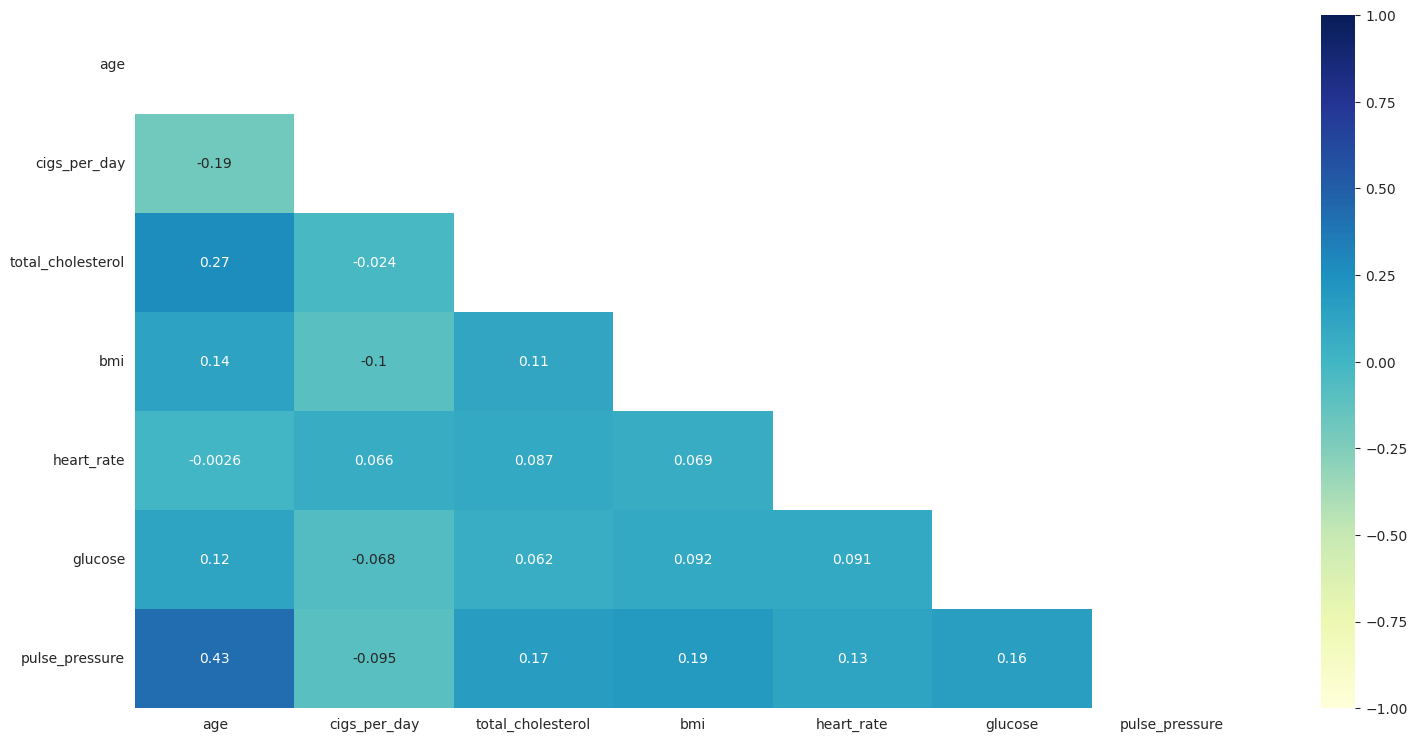

In [ ]:
corr = df_2[continuous_var].corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

In [ ]:
# Select your features wisely to avoid overfitting
# dropping is_smoking
df_2.drop('is_smoking',axis=1,inplace=True)
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'ten_year_chd']

In [ ]:
df_2.columns

Index(['age', 'education', 'sex', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'pulse_pressure',
       'glucose_diabetes'],
      dtype='object')

What methods of feature selection have you employed and why?

We employed the variance inflation factor to reduce multicollinearity, and we discovered that systolic and diastolic blood pressure had a high VIF, thus we generated a new feature called pulse pressure.

It was also discovered that the is smoking column only contained the values yes or no for smoking, and the same was represented in the cigs per day column, which had 0 for non smokers and the number of cigarettes per day for smokers.

Which all features you found important and why?

Finally the important colums are 'age', 'sex', 'cigs_per_day', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol', 'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'education_1.0', 'education_2.0', 'education_3.0', 'education_4.0', 'pulse_pressure'.

All these columns contains the demographic, behavioural, current medical and historic medical data.

# **5. Data Transformation**

In [ ]:
# Transform Your data
# skewness along the index axis
(df_2[continuous_var]).skew(axis = 0)

age                  0.225796
cigs_per_day         1.204077
total_cholesterol    0.948170
bmi                  1.025551
heart_rate           0.676660
glucose              6.361911
pulse_pressure       1.412382
dtype: float64

In [ ]:
# Skew for sqrt transformation
np.sqrt(df_2[continuous_var]).skew(axis = 0)

age                  0.103528
cigs_per_day         0.459793
total_cholesterol    0.410514
bmi                  0.663534
heart_rate           0.411092
glucose              3.998158
pulse_pressure       0.840977
dtype: float64

In [ ]:
# Skew for log10 transformation
np.log10(df_2[continuous_var]+1).skew(axis = 0)

age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
glucose              2.310918
pulse_pressure       0.354174
dtype: float64

In [ ]:
# Implementing log transformation on continuous variables

df_2['age']                   = np.log10(df_2['age']+1)
df_2['cigs_per_day']          = np.sqrt(df_2['cigs_per_day'])
df_2['total_cholesterol']     = np.log10(df_2['total_cholesterol']+1)
df_2['bmi']                   = np.sqrt(df_2['bmi']+1)
df_2['heart_rate']            = np.log10(df_2['heart_rate']+1)
df_2['glucose']               = np.sqrt(df_2['glucose'])
df_2['pulse_pressure']        = np.sqrt(df_2['pulse_pressure'])

In [ ]:
# Checking skew after log transformation
df_2[continuous_var].skew(axis = 0)

age                 -0.015053
cigs_per_day         0.459793
total_cholesterol    0.011860
bmi                  0.675183
heart_rate           0.165898
glucose              3.998158
pulse_pressure       0.840977
dtype: float64

Yes the data need to be transformed as it was skewed.


We used log transform and squareroot transform on the different continuous columns to reduce the skew of the data.



# **6. Data Scaling**

In [ ]:
# Scaling your data
scaler = StandardScaler()
features = [i for i in df_2.columns if i not in ['ten_year_chd']]

In [ ]:
features

['age',
 'education',
 'sex',
 'cigs_per_day',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'pulse_pressure',
 'glucose_diabetes']

In [ ]:
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'pulse_pressure']

In [ ]:
df_2[continuous_var] = scaler.fit_transform(df_2[continuous_var])

In [ ]:
# defining the X and y
X = df_2.drop('ten_year_chd',axis=1)
y = df_2['ten_year_chd']

Which method have you used to scale you data and why?

In this we have different independent features of different scale so we have used standard scalar method to scale our independent features into one scale.

# **7. Dimesionality Reduction**

Do you think that dimensionality reduction is needed?

Explain Why?

Dimensionality reduction is not needed. We have already reduced the number of features and only the important features are left.

# **8. Data Splitting**

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

In [ ]:
# Checking the train distribution of dependent variable
y_train.value_counts()

ten_year_chd
0.0    2303
1.0     409
Name: count, dtype: int64

What data splitting ratio did you employ, and why?


We split the data into train and test to train the model using the train_test_split method.



We divided our data into 80% train and 20% test, which provides a nice compromise between having enough data to efficiently train a model and having enough data to evaluate the model's performance on unseen data. The model has access to a huge quantity of information to learn from by using 80% of the data for training, while the remaining 20% of the data may be used to test how effectively the model generalises to new data.



# **9. Handling Imbalanced Dataset**

Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is imbalanced and the number of positive cases is very low compared to the negative cases.

<Axes: title={'center': 'Target variable before SMOTE'}, xlabel='ten_year_chd'>

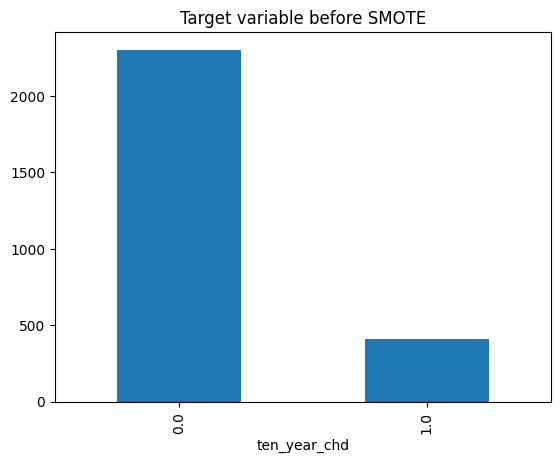

In [ ]:
# Handling Imbalanced Dataset (If needed)

# visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

In [ ]:
# Oversampling using SMOTETomek
# fit predictor and target variable
X_smote, y_smote = SMOTETomek(random_state=0).fit_resample(X_train, y_train)

print('Samples in the original dataset: ', len(y_train))
print('Samples in the resampled dataset: ', len(y_smote))

Samples in the original dataset:  2712
Samples in the resampled dataset:  4586


<Axes: title={'center': 'Target variable after SMOTE'}, xlabel='ten_year_chd'>

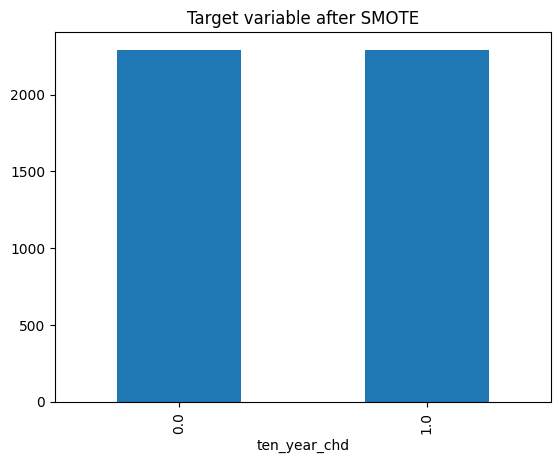

In [ ]:
# visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

What method did you employ to deal with the imbalance dataset, and why? (If necessary, balance)

To deal with the unbalanced dataset, I employed SMOTE in conjunction with Tomek links oversampling. To balance the class distribution, SMOTE generates synthetic samples from the minority class. It accomplishes this by picking instances in the feature space that are close together and drawing a line between them, then producing new instances along this line. Oversampling Tomek links eliminates Tomek connections, which are pairings of examples from distinct classes that are relatively near in the feature space. The decision border between the classes can be clarified by deleting these instances.

This strategy was chosen because it can improve the performance of machine learning models on unbalanced datasets by balancing the class distribution and clarifying the decision border between classes. I was able to generate a balanced dataset while also reducing possible noise and ambiguity from the data by combining oversampling of the minority class with undersampling of the majority class.


# **7. ML Model Implementation**

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

     # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")
    try:
      try:
        feature_importance = model.feature_importances_
      except:
        feature_importance = model.coef_
      feature_importance = np.absolute(feature_importance)
      if len(feature_importance)==len(features):
        pass
      else:
        feature_importance = feature_importance[0]


      feat = pd.Series(feature_importance, index=features)
      feat = feat.sort_values(ascending=True)
      plt.figure(figsize=(10,6))
      plt.title('Feature Importances for '+str(model), fontsize = 18)
      plt.xlabel('Relative Importance')
      feat.plot(kind='barh')
    except AttributeError:
        print("\nThe model does not have feature importances attribute.")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score



In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

ML Model - 1 **Logistic Regression**

In [ ]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# model is trained (fit ) and predicted in the evaluate model

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.667684256432621
Test ROC AUC: 0.6715686274509806


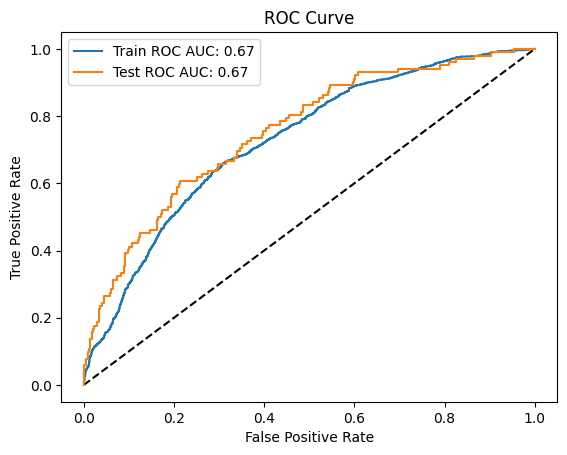


Confusion Matrix:


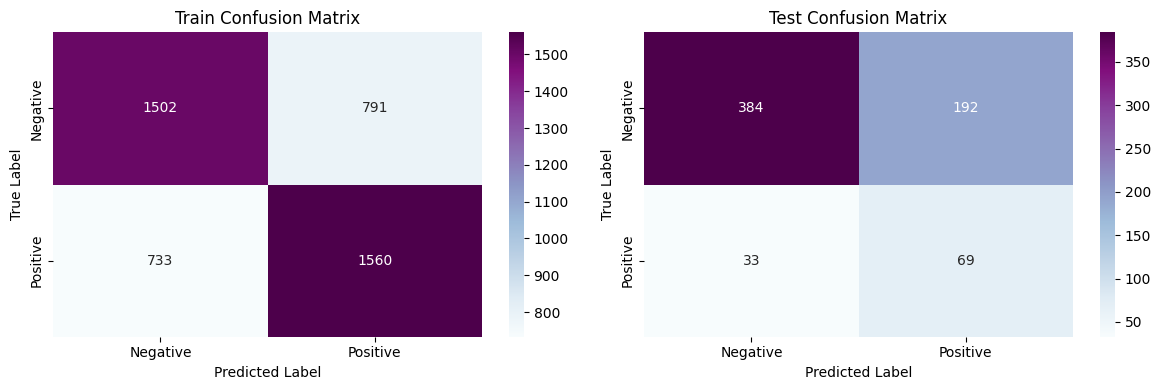


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.672036 | 0.655037 |   0.663428 | 2293        |
| 1.0          |    0.663547 | 0.680331 |   0.671835 | 2293        |
| accuracy     |    0.667684 | 0.667684 |   0.667684 |    0.667684 |
| macro avg    |    0.667792 | 0.667684 |   0.667631 | 4586        |
| weighted avg |    0.667792 | 0.667684 |   0.667631 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.920863 | 0.666667 |   0.773414 | 576        |
| 1.0          |    0.264368 | 0.676471 |   0.380165 | 102        |
| accuracy     |    0.668142 | 0.668142 |   0.668142 |   0.668142 |
| macro avg    |    0.592616 | 0.671569 |   0.57679  | 678        |
| weighted avg |    0.822099 | 0.668142 |   0.7142

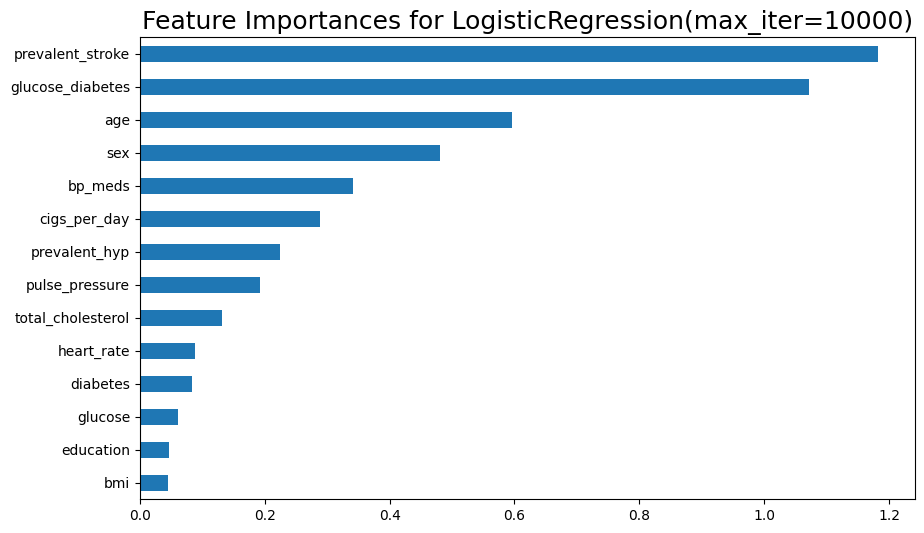

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Logistic regression'] = lr_score
score

Logistic regression
Precision Train             0.667792
Precision Test              0.822099
Recall Train                0.667684
Recall Test                 0.668142
Accuracy Train              0.667684
Accuracy Test               0.668142
ROC-AUC Train               0.667684
ROC-AUC Test                0.671569
F1 macro Train              0.667631
F1 macro Test               0.714253

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_smote, y_smote)

best_params = grid.best_params_
# The best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Train ROC AUC: 0.6681203663323159
Test ROC AUC: 0.6666666666666667


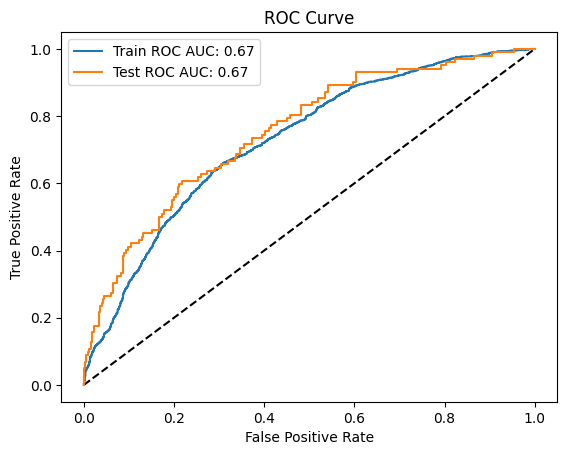


Confusion Matrix:


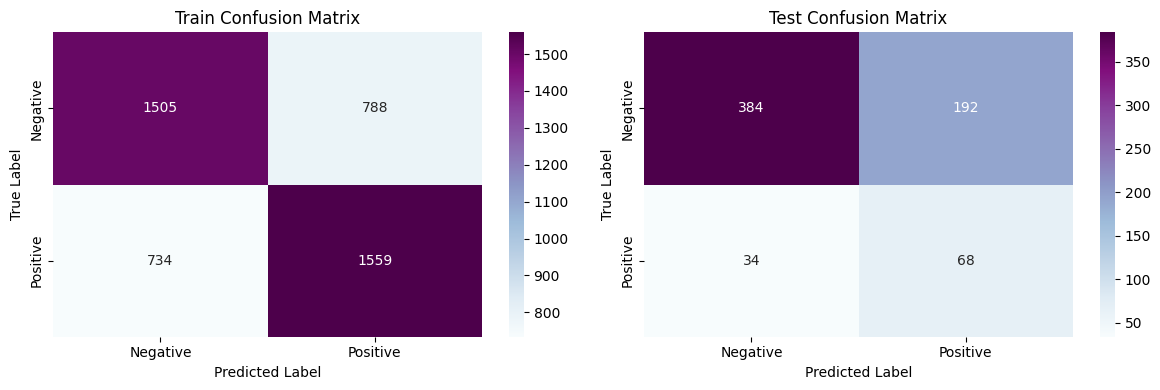


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.672175 | 0.656345 |   0.664166 | 2293       |
| 1.0          |    0.664252 | 0.679895 |   0.671983 | 2293       |
| accuracy     |    0.66812  | 0.66812  |   0.66812  |    0.66812 |
| macro avg    |    0.668214 | 0.66812  |   0.668074 | 4586       |
| weighted avg |    0.668214 | 0.66812  |   0.668074 | 4586       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.91866  | 0.666667 |   0.772636 | 576        |
| 1.0          |    0.261538 | 0.666667 |   0.375691 | 102        |
| accuracy     |    0.666667 | 0.666667 |   0.666667 |   0.666667 |
| macro avg    |    0.590099 | 0.666667 |   0.574163 | 678        |
| weighted avg |    0.819801 | 0.666667 |   0.712918 | 67

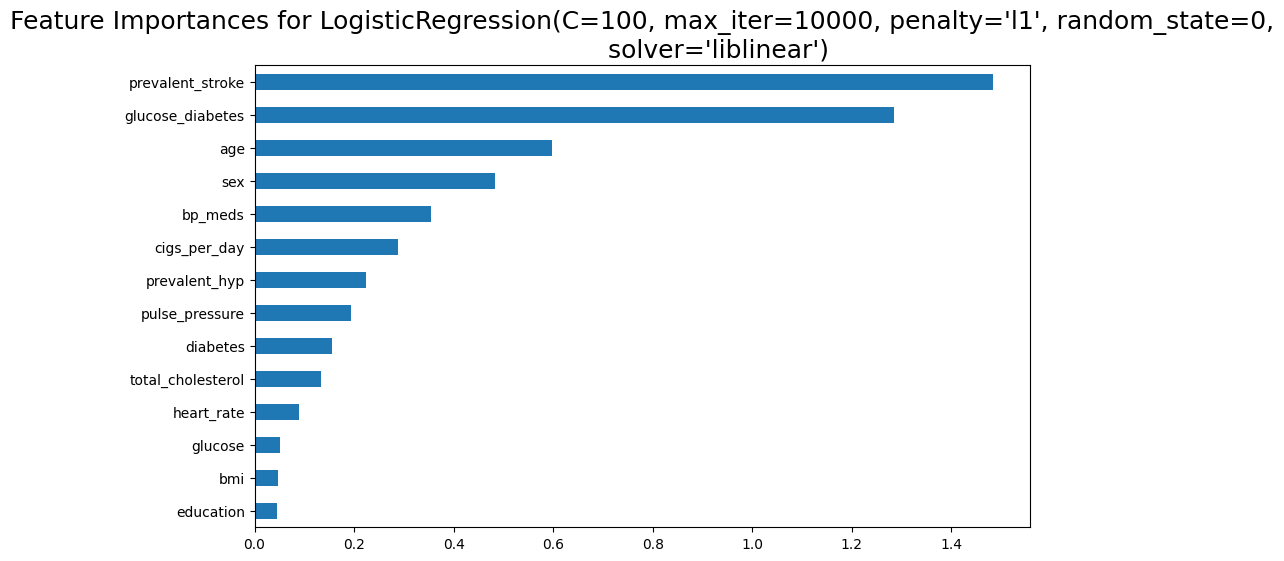

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Logistic regression tuned'] = lr_score2

What hyperparameter optimisation strategy did you employ, and why?


GridSearchCV is the hyperparameter optimisation approach employed. GridSearchCV is a method for finding the optimum hyperparameters for a model by doing an exhaustive search over a defined parameter grid. It's a common strategy for hyperparameter tweaking since it's easy to use and may help you locate suitable hyperparameters for your model.




The strategy of choice for hyperparameter optimisation is determined by several criteria, including the size of the parameter space, available computer resources, and time limitations. When the parameter space is limited and computing resources are not a key concern, GridSearchCV can be a decent alternative.








Have you noticed any progress?

Take note of the progress using the updated Evaluation metric Score Chart.

In [ ]:
score

Logistic regression  Logistic regression tuned
Precision Train             0.667792                   0.668214
Precision Test              0.822099                   0.819801
Recall Train                0.667684                   0.668120
Recall Test                 0.668142                   0.666667
Accuracy Train              0.667684                   0.668120
Accuracy Test               0.668142                   0.666667
ROC-AUC Train               0.667684                   0.668120
ROC-AUC Test                0.671569                   0.666667
F1 macro Train              0.667631                   0.668074
F1 macro Test               0.714253                   0.712918

It appears that hyperparameter tuning did not improve the performance of the Logistic Regression model on the test set. The precision, recall, accuracy, ROC-AUC, and F1 scores on the test set are the same for both the untuned and tuned Logistic Regression models.

# ML Model - 2 : **Decision Tree**

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 3 Implementation
dt = DecisionTreeClassifier(random_state=20)


Train ROC AUC: 1.0
Test ROC AUC: 0.5760825163398693


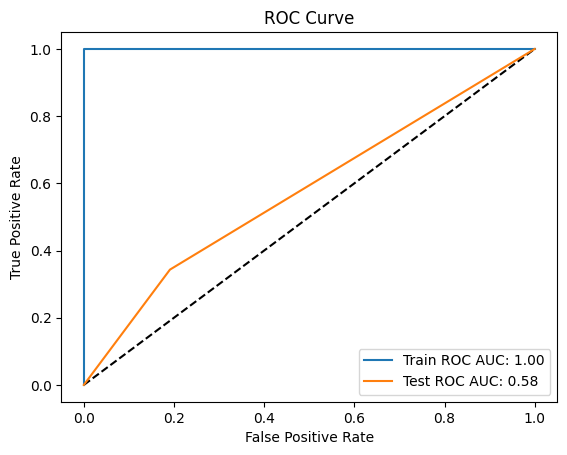


Confusion Matrix:


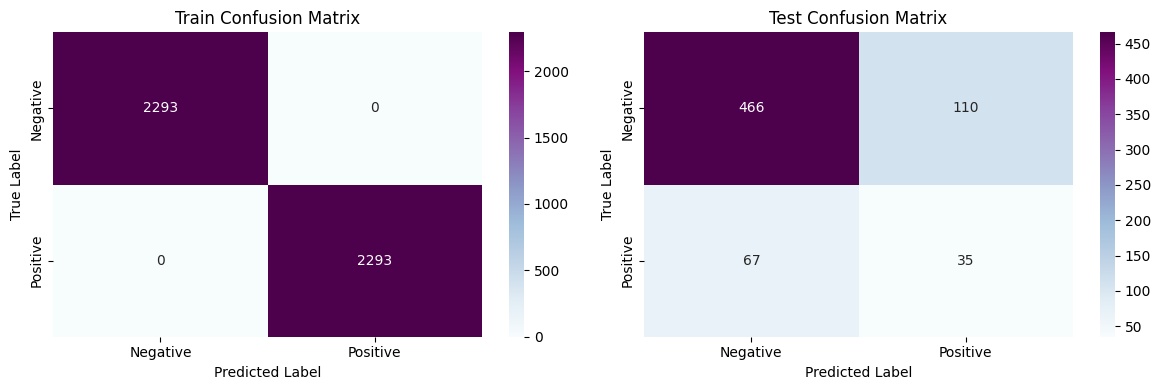


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2293 |
| 1.0          |           1 |        1 |          1 |      2293 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4586 |
| weighted avg |           1 |        1 |          1 |      4586 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.874296 | 0.809028 |   0.840397 | 576        |
| 1.0          |    0.241379 | 0.343137 |   0.283401 | 102        |
| accuracy     |    0.738938 | 0.738938 |   0.738938 |   0.738938 |
| macro avg    |    0.557838 | 0.576083 |   0.561899 | 678        |
| weighted avg |    0.779079 | 0.738938 |   0.756601 | 678      

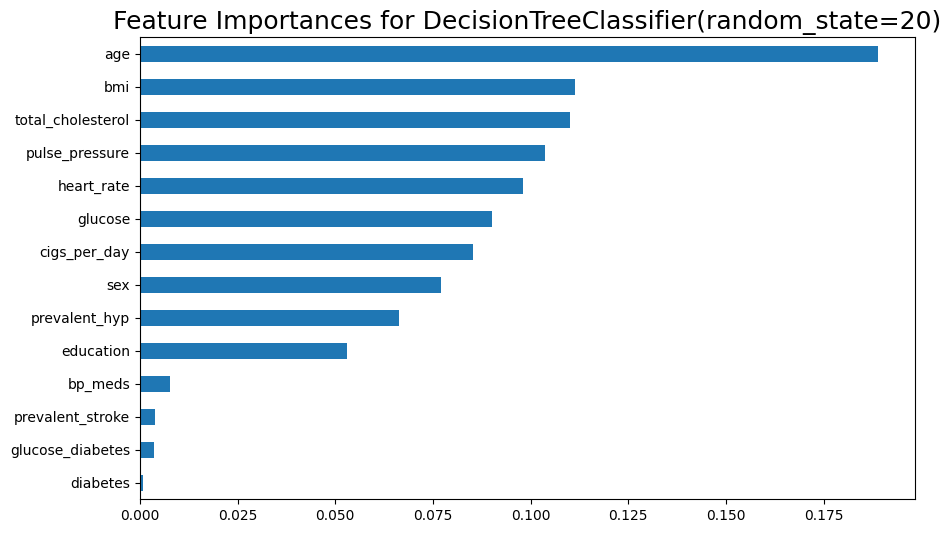

In [ ]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt, X_smote, X_test, y_smote, y_test)


In [ ]:
score['Decision Tree'] = dt_score
score

Logistic regression  Logistic regression tuned  Decision Tree
Precision Train             0.667792                   0.668214       1.000000
Precision Test              0.822099                   0.819801       0.779079
Recall Train                0.667684                   0.668120       1.000000
Recall Test                 0.668142                   0.666667       0.738938
Accuracy Train              0.667684                   0.668120       1.000000
Accuracy Test               0.668142                   0.666667       0.738938
ROC-AUC Train               0.667684                   0.668120       1.000000
ROC-AUC Test                0.671569                   0.666667       0.576083
F1 macro Train              0.667631                   0.668074       1.000000
F1 macro Test               0.714253                   0.712918       0.756601

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 4}

In [ ]:
# Train a new model with the best hyperparameters
dt2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Train ROC AUC: 0.7928477976450066
Test ROC AUC: 0.5768995098039216


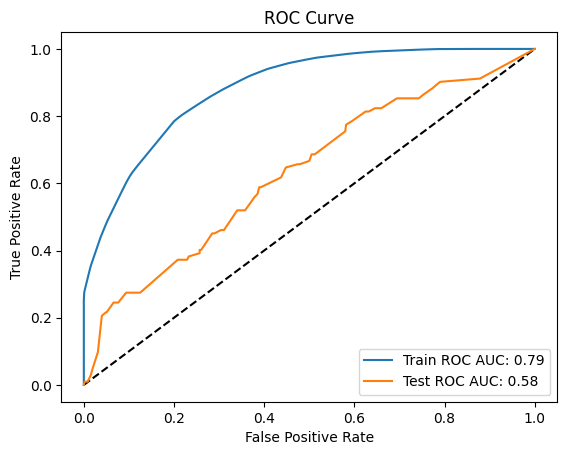


Confusion Matrix:


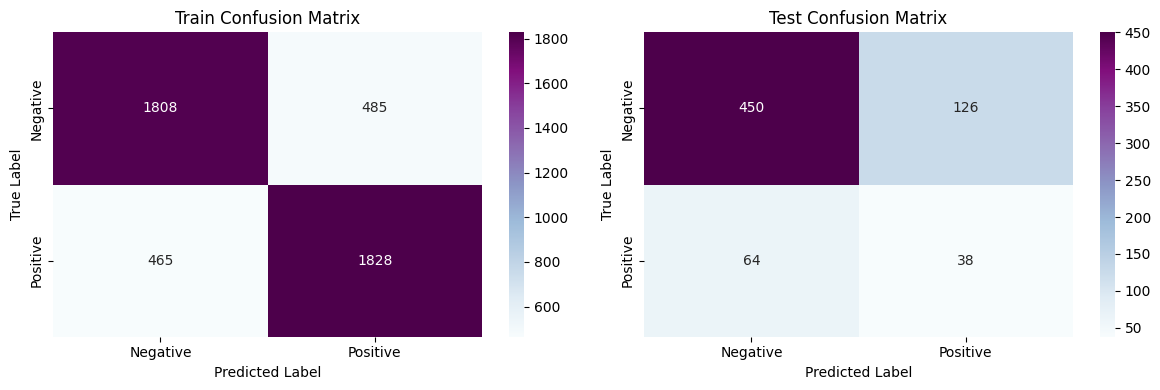


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.795425 | 0.788487 |   0.79194  | 2293        |
| 1.0          |    0.790316 | 0.797209 |   0.793747 | 2293        |
| accuracy     |    0.792848 | 0.792848 |   0.792848 |    0.792848 |
| macro avg    |    0.79287  | 0.792848 |   0.792844 | 4586        |
| weighted avg |    0.79287  | 0.792848 |   0.792844 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.875486 | 0.78125  |   0.825688 | 576        |
| 1.0          |    0.231707 | 0.372549 |   0.285714 | 102        |
| accuracy     |    0.719764 | 0.719764 |   0.719764 |   0.719764 |
| macro avg    |    0.553597 | 0.5769   |   0.555701 | 678        |
| weighted avg |    0.778635 | 0.719764 |   0.7444

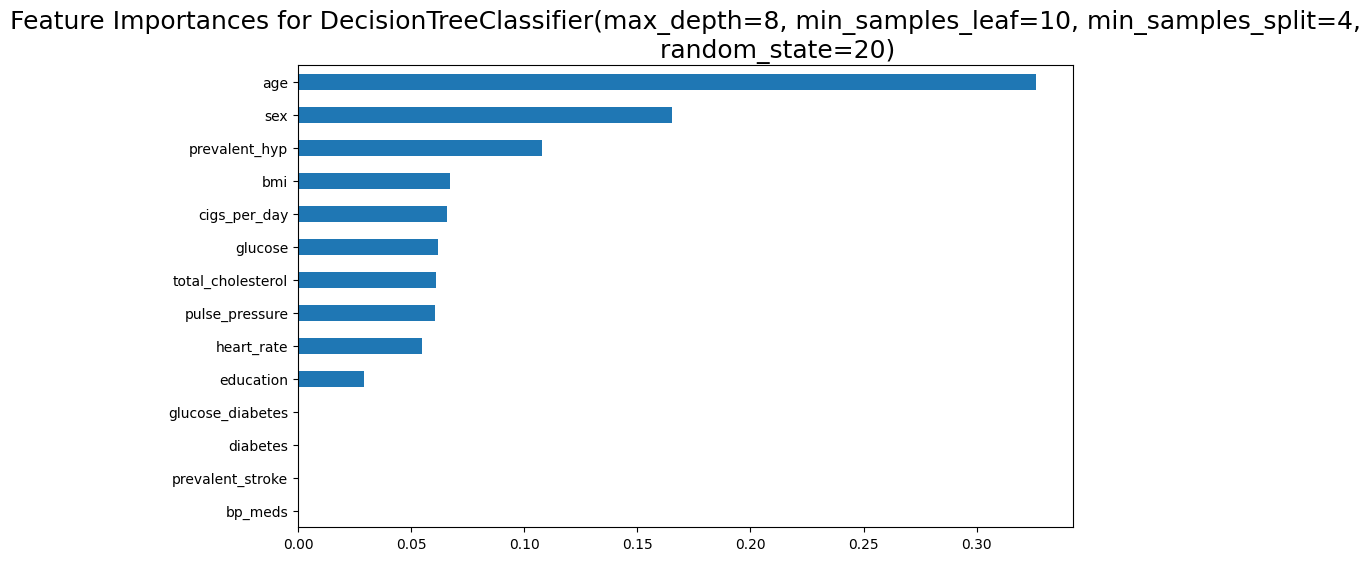

In [ ]:
dt2_score = evaluate_model(dt2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Decision Tree tuned'] = dt2_score

What hyperparameter optimisation strategy did you employ, and why?


GridSearchCV is the hyperparameter optimisation approach employed. GridSearchCV is a method for finding the optimum hyperparameters for a model by doing an exhaustive search over a defined parameter grid. It's a common strategy for hyperparameter tweaking since it's easy to use and may help you locate suitable hyperparameters for your model.

The strategy of choice for hyperparameter optimisation is determined by several criteria, including the size of the parameter space, available computer resources, and time limitations. When the parameter space is limited and computing resources are not a key concern, GridSearchCV can be a decent alternative.



Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


In [ ]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.667792                   0.668214   
Precision Test              0.822099                   0.819801   
Recall Train                0.667684                   0.668120   
Recall Test                 0.668142                   0.666667   
Accuracy Train              0.667684                   0.668120   
Accuracy Test               0.668142                   0.666667   
ROC-AUC Train               0.667684                   0.668120   
ROC-AUC Test                0.671569                   0.666667   
F1 macro Train              0.667631                   0.668074   
F1 macro Test               0.714253                   0.712918   

                 Decision Tree  Decision Tree tuned  
Precision Train       1.000000             0.792870  
Precision Test        0.779079             0.778635  
Recall Train          1.000000             0.792848  
Recall Test           0.738938             0.719764  
Accuracy Train        1.000000             0.792848  
Accuracy Test         0.738938             0.719764  
ROC-AUC Train         1.000000             0.792848  
ROC-AUC Test          0.576083             0.576900  
F1 macro Train        1.000000             0.792844  
F1 macro Test         0.756601             0.744453

It appears that hyperparameter tuning improved the performance of the Decision Tree model on the test set. The tuned Decision Tree model has higher precision and F1 score on the test set compared to the untuned Decision Tree model. However, the recall, accuracy, and ROC-AUC scores on the test set decreased slightly after tuning.

The tuned model is not overfitting like the untuned model.

# ML Model - 3 : **Random Forest**

In [ ]:
# Initialize the model
rf = RandomForestClassifier(random_state=0)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 1.0
Test ROC AUC: 0.5644914215686274


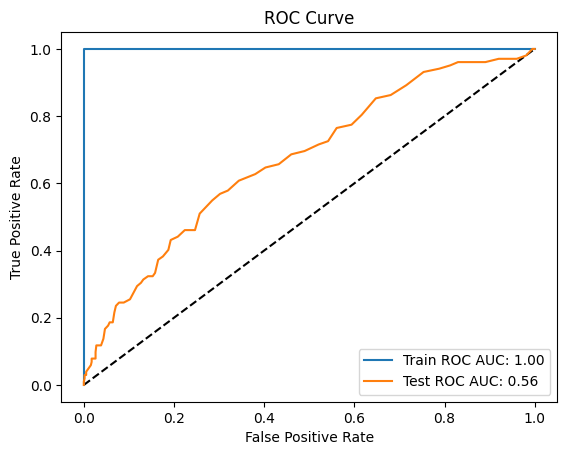


Confusion Matrix:


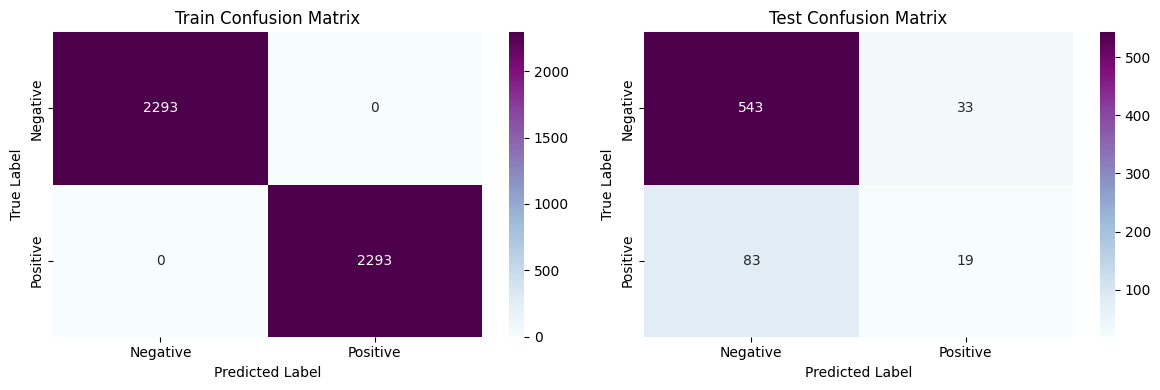


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2293 |
| 1.0          |           1 |        1 |          1 |      2293 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4586 |
| weighted avg |           1 |        1 |          1 |      4586 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.867412 | 0.942708 |   0.903494 | 576        |
| 1.0          |    0.365385 | 0.186275 |   0.246753 | 102        |
| accuracy     |    0.828909 | 0.828909 |   0.828909 |   0.828909 |
| macro avg    |    0.616398 | 0.564491 |   0.575124 | 678        |
| weighted avg |    0.791886 | 0.828909 |   0.804692 | 678      

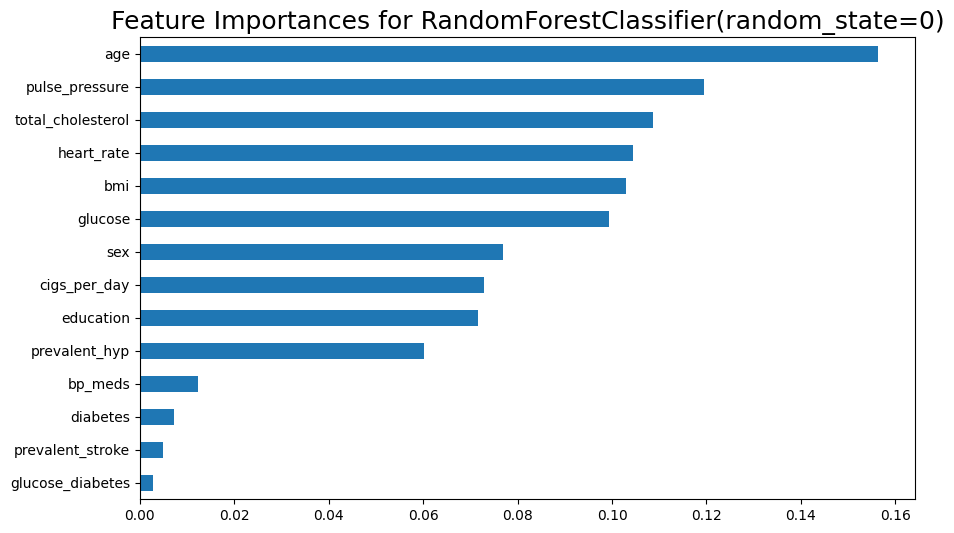

In [ ]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Random Forest'] = rf_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.667792                   0.668214   
Precision Test              0.822099                   0.819801   
Recall Train                0.667684                   0.668120   
Recall Test                 0.668142                   0.666667   
Accuracy Train              0.667684                   0.668120   
Accuracy Test               0.668142                   0.666667   
ROC-AUC Train               0.667684                   0.668120   
ROC-AUC Test                0.671569                   0.666667   
F1 macro Train              0.667631                   0.668074   
F1 macro Test               0.714253                   0.712918   

                 Decision Tree  Decision Tree tuned  Random Forest  
Precision Train       1.000000             0.792870       1.000000  
Precision Test        0.779079             0.778635       0.791886  
Recall Train          1.000000             0.792848       1.000000  
Recall Test           0.738938             0.719764       0.828909  
Accuracy Train        1.000000             0.792848       1.000000  
Accuracy Test         0.738938             0.719764       0.828909  
ROC-AUC Train         1.000000             0.792848       1.000000  
ROC-AUC Test          0.576083             0.576900       0.564491  
F1 macro Train        1.000000             0.792844       1.000000  
F1 macro Test         0.756601             0.744453       0.804692

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the GridSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'n_estimators': 50, 'min_samples_split': 4, 'max_depth': 15}

In [ ]:
# Initialize model with best parameters
rf2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Train ROC AUC: 0.9679459223724378
Test ROC AUC: 0.5961499183006536


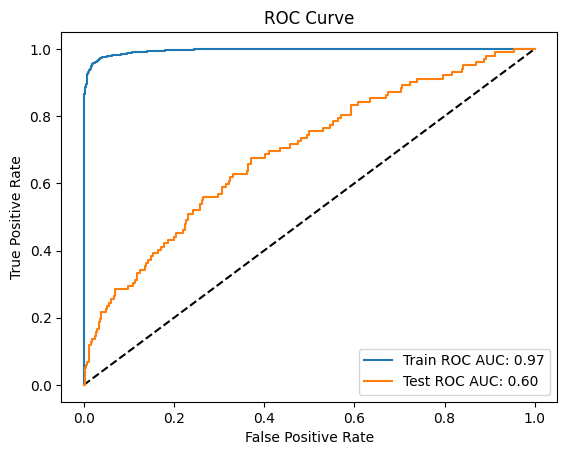


Confusion Matrix:


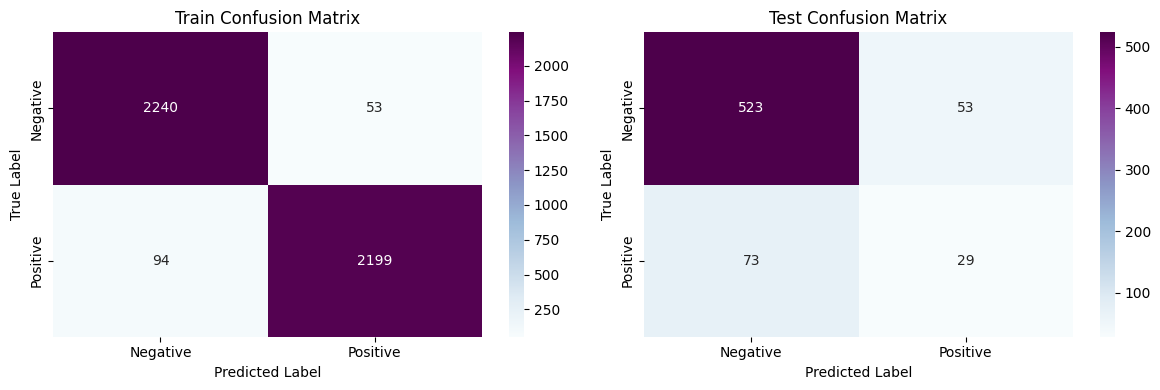


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.959726 | 0.976886 |   0.96823  | 2293        |
| 1.0          |    0.976465 | 0.959006 |   0.967657 | 2293        |
| accuracy     |    0.967946 | 0.967946 |   0.967946 |    0.967946 |
| macro avg    |    0.968096 | 0.967946 |   0.967943 | 4586        |
| weighted avg |    0.968096 | 0.967946 |   0.967943 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.877517 | 0.907986 |   0.892491 | 576        |
| 1.0          |    0.353659 | 0.284314 |   0.315217 | 102        |
| accuracy     |    0.814159 | 0.814159 |   0.814159 |   0.814159 |
| macro avg    |    0.615588 | 0.59615  |   0.603854 | 678        |
| weighted avg |    0.798706 | 0.814159 |   0.8056

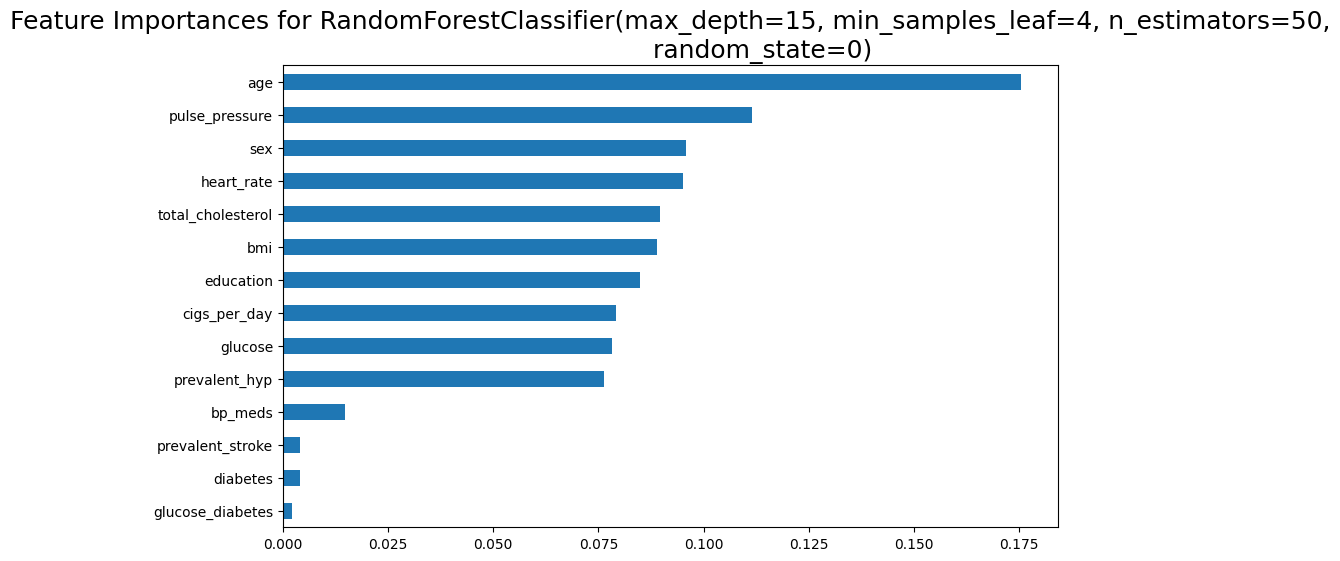

In [ ]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Random Forest tuned'] = rf2_score

What hyperparameter optimisation strategy did you employ, and why?


RandomizedSearchCV is the hyperparameter optimisation approach employed. RandomizedSearchCV is a method for finding the optimum hyperparameters for a model by doing a random search over a defined parameter grid. When the parameter space is vast, it is a common approach for hyperparameter tuning since it can be more efficient than exhaustive search methods like GridSearchCV.


The strategy of choice for hyperparameter optimisation is determined by several criteria, including the size of the parameter space, available computer resources, and time limitations. When the parameter space is vast and computing resources are limited, RandomizedSearchCV might be an excellent solution.



Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score


Logistic regression  Logistic regression tuned  \
Precision Train             0.667792                   0.668214   
Precision Test              0.822099                   0.819801   
Recall Train                0.667684                   0.668120   
Recall Test                 0.668142                   0.666667   
Accuracy Train              0.667684                   0.668120   
Accuracy Test               0.668142                   0.666667   
ROC-AUC Train               0.667684                   0.668120   
ROC-AUC Test                0.671569                   0.666667   
F1 macro Train              0.667631                   0.668074   
F1 macro Test               0.714253                   0.712918   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.792870       1.000000   
Precision Test        0.779079             0.778635       0.791886   
Recall Train          1.000000             0.792848       1.000000   
Recall Test           0.738938             0.719764       0.828909   
Accuracy Train        1.000000             0.792848       1.000000   
Accuracy Test         0.738938             0.719764       0.828909   
ROC-AUC Train         1.000000             0.792848       1.000000   
ROC-AUC Test          0.576083             0.576900       0.564491   
F1 macro Train        1.000000             0.792844       1.000000   
F1 macro Test         0.756601             0.744453       0.804692   

                 Random Forest tuned  
Precision Train             0.968096  
Precision Test              0.798706  
Recall Train                0.967946  
Recall Test                 0.814159  
Accuracy Train              0.967946  
Accuracy Test               0.814159  
ROC-AUC Train               0.967946  
ROC-AUC Test                0.596150  
F1 macro Train              0.967943  
F1 macro Test               0.805645

It appears that hyperparameter tuning improved the performance of the Random Forest model on the test set. The tuned Random Forest model has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned Random Forest model. The ROC-AUC score on the test set also improved slightly after tuning.

# ML Model - 4 : **SVM (Support Vector Machine)**

In [ ]:
# Initialize the model
svm = SVC(kernel='linear', random_state=0, probability=True)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.



Train ROC AUC: 0.6624509376362843
Test ROC AUC: 0.6732536764705883


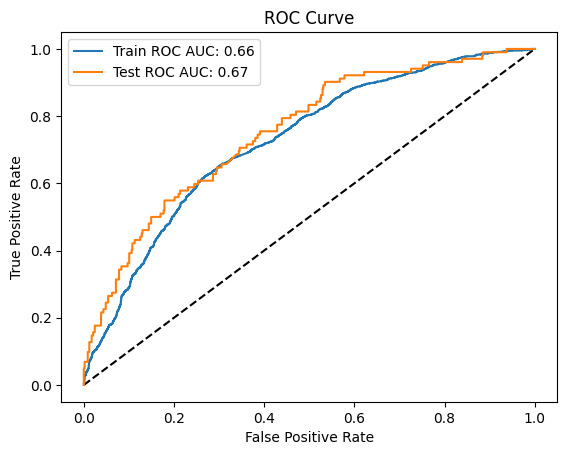


Confusion Matrix:


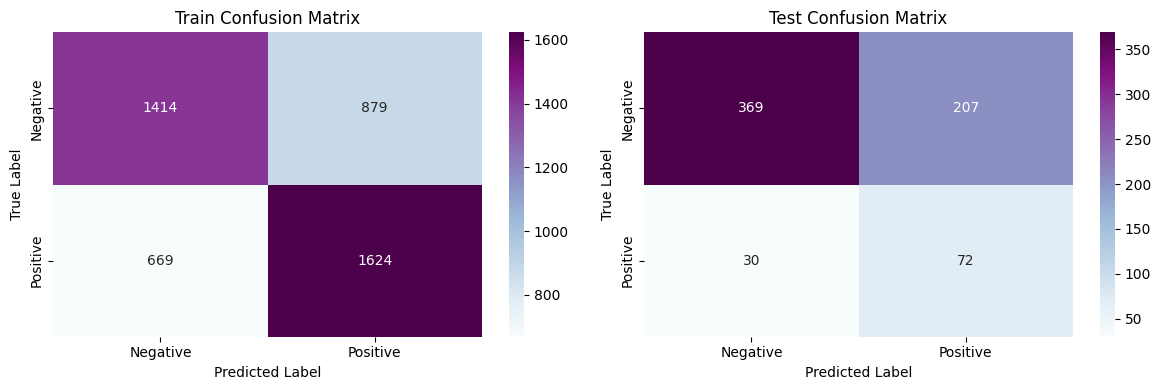


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.678829 | 0.616659 |   0.646252 | 2293        |
| 1.0          |    0.648821 | 0.708242 |   0.677231 | 2293        |
| accuracy     |    0.662451 | 0.662451 |   0.662451 |    0.662451 |
| macro avg    |    0.663825 | 0.662451 |   0.661742 | 4586        |
| weighted avg |    0.663825 | 0.662451 |   0.661742 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.924812 | 0.640625 |   0.756923 | 576        |
| 1.0          |    0.258065 | 0.705882 |   0.377953 | 102        |
| accuracy     |    0.650442 | 0.650442 |   0.650442 |   0.650442 |
| macro avg    |    0.591438 | 0.673254 |   0.567438 | 678        |
| weighted avg |    0.824505 | 0.650442 |   0.6999

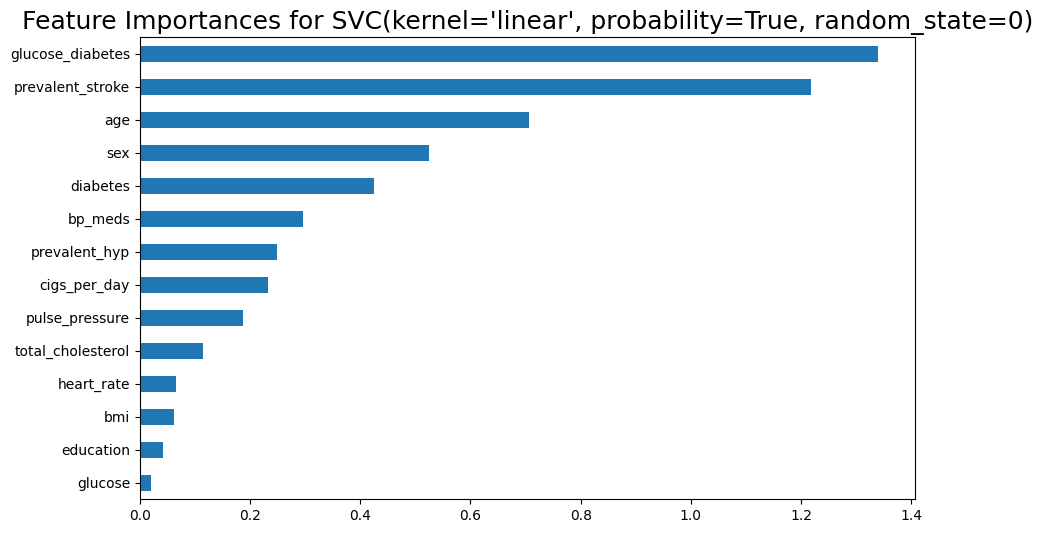

In [ ]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm, X_smote, X_test, y_smote, y_test)

In [ ]:
score['SVM'] = svm_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.667792                   0.668214   
Precision Test              0.822099                   0.819801   
Recall Train                0.667684                   0.668120   
Recall Test                 0.668142                   0.666667   
Accuracy Train              0.667684                   0.668120   
Accuracy Test               0.668142                   0.666667   
ROC-AUC Train               0.667684                   0.668120   
ROC-AUC Test                0.671569                   0.666667   
F1 macro Train              0.667631                   0.668074   
F1 macro Test               0.714253                   0.712918   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.792870       1.000000   
Precision Test        0.779079             0.778635       0.791886   
Recall Train          1.000000             0.792848       1.000000   
Recall Test           0.738938             0.719764       0.828909   
Accuracy Train        1.000000             0.792848       1.000000   
Accuracy Test         0.738938             0.719764       0.828909   
ROC-AUC Train         1.000000             0.792848       1.000000   
ROC-AUC Test          0.576083             0.576900       0.564491   
F1 macro Train        1.000000             0.792844       1.000000   
F1 macro Test         0.756601             0.744453       0.804692   

                 Random Forest tuned       SVM  
Precision Train             0.968096  0.663825  
Precision Test              0.798706  0.824505  
Recall Train                0.967946  0.662451  
Recall Test                 0.814159  0.650442  
Accuracy Train              0.967946  0.662451  
Accuracy Test               0.814159  0.650442  
ROC-AUC Train               0.967946  0.662451  
ROC-AUC Test                0.596150  0.673254  
F1 macro Train              0.967943  0.661742  
F1 macro Test               0.805645  0.699910

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm2 = SVC(random_state=0, probability=True)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with 6-fold cross-validation
random_search = RandomizedSearchCV(svm2, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'kernel': 'poly', 'degree': 5, 'C': 9.6}

In [ ]:
# Initialize model with best parameters
svm2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Train ROC AUC: 0.8824683820322722
Test ROC AUC: 0.5901756535947712


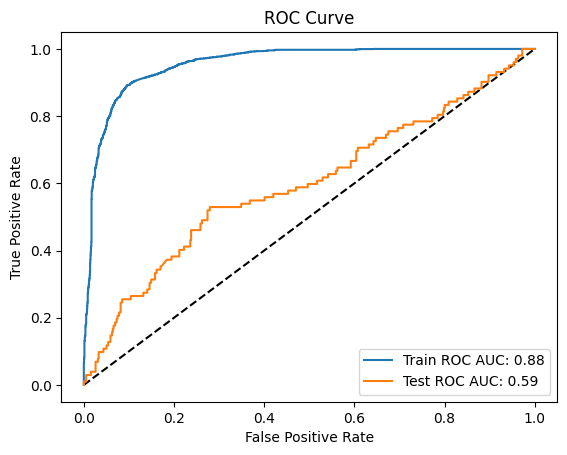


Confusion Matrix:


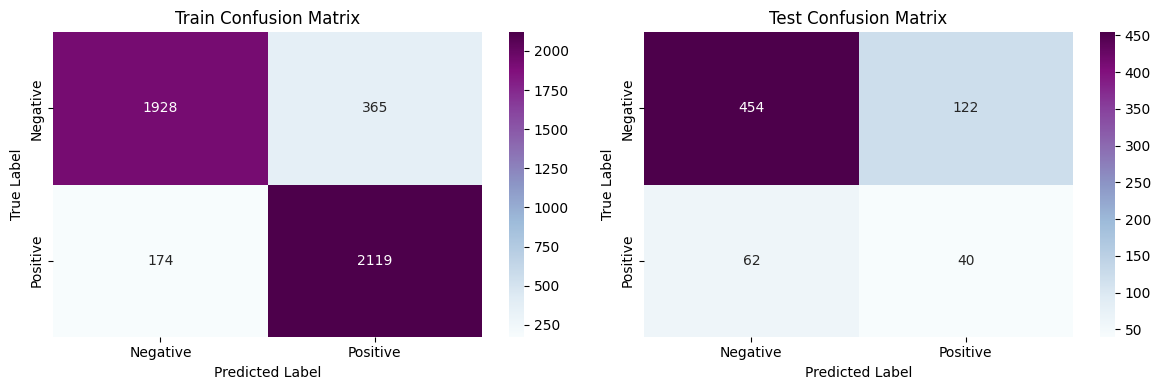


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.917222 | 0.84082  |   0.877361 | 2293        |
| 1.0          |    0.85306  | 0.924117 |   0.887168 | 2293        |
| accuracy     |    0.882468 | 0.882468 |   0.882468 |    0.882468 |
| macro avg    |    0.885141 | 0.882468 |   0.882264 | 4586        |
| weighted avg |    0.885141 | 0.882468 |   0.882264 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.879845 | 0.788194 |   0.831502 | 576        |
| 1.0          |    0.246914 | 0.392157 |   0.30303  | 102        |
| accuracy     |    0.728614 | 0.728614 |   0.728614 |   0.728614 |
| macro avg    |    0.563379 | 0.590176 |   0.567266 | 678        |
| weighted avg |    0.784625 | 0.728614 |   0.7519

In [ ]:
svm2_score = evaluate_model(svm2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['SVM tuned'] = svm2_score

Which hyperparameter optimization technique have you used and why?


Here Randomized search is used. Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.



Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


In [ ]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.667792                   0.668214   
Precision Test              0.822099                   0.819801   
Recall Train                0.667684                   0.668120   
Recall Test                 0.668142                   0.666667   
Accuracy Train              0.667684                   0.668120   
Accuracy Test               0.668142                   0.666667   
ROC-AUC Train               0.667684                   0.668120   
ROC-AUC Test                0.671569                   0.666667   
F1 macro Train              0.667631                   0.668074   
F1 macro Test               0.714253                   0.712918   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.792870       1.000000   
Precision Test        0.779079             0.778635       0.791886   
Recall Train          1.000000             0.792848       1.000000   
Recall Test           0.738938             0.719764       0.828909   
Accuracy Train        1.000000             0.792848       1.000000   
Accuracy Test         0.738938             0.719764       0.828909   
ROC-AUC Train         1.000000             0.792848       1.000000   
ROC-AUC Test          0.576083             0.576900       0.564491   
F1 macro Train        1.000000             0.792844       1.000000   
F1 macro Test         0.756601             0.744453       0.804692   

                 Random Forest tuned       SVM  SVM tuned  
Precision Train             0.968096  0.663825   0.885141  
Precision Test              0.798706  0.824505   0.784625  
Recall Train                0.967946  0.662451   0.882468  
Recall Test                 0.814159  0.650442   0.728614  
Accuracy Train              0.967946  0.662451   0.882468  
Accuracy Test               0.814159  0.650442   0.728614  
ROC-AUC Train               0.967946  0.662451   0.882468  
ROC-AUC Test                0.596150  0.673254   0.590176  
F1 macro Train              0.967943  0.661742   0.882264  
F1 macro Test               0.805645  0.699910   0.751997

It appears that hyperparameter tuning improved the performance of the SVM model on the test set. The tuned SVM model has higher recall, accuracy, and F1 score on the test set compared to the untuned SVM model. However, the precision and ROC-AUC scores on the test set decreased slightly after tuning.

# ML Model - 5 : Xtreme Gradient Boosting

In [ ]:
# Initialize the model
xgb_model = xgb.XGBClassifier()

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.9962930658525948
Test ROC AUC: 0.6077410130718954


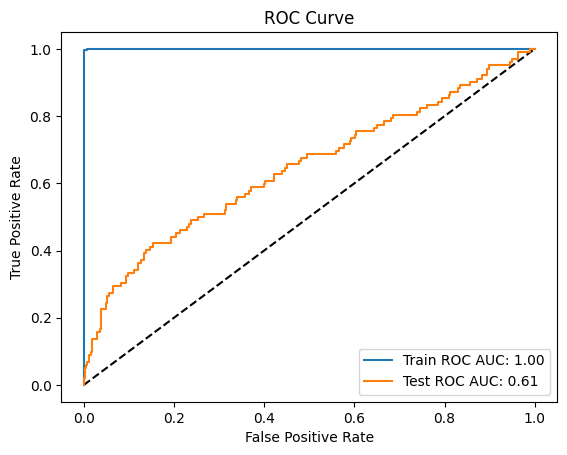


Confusion Matrix:


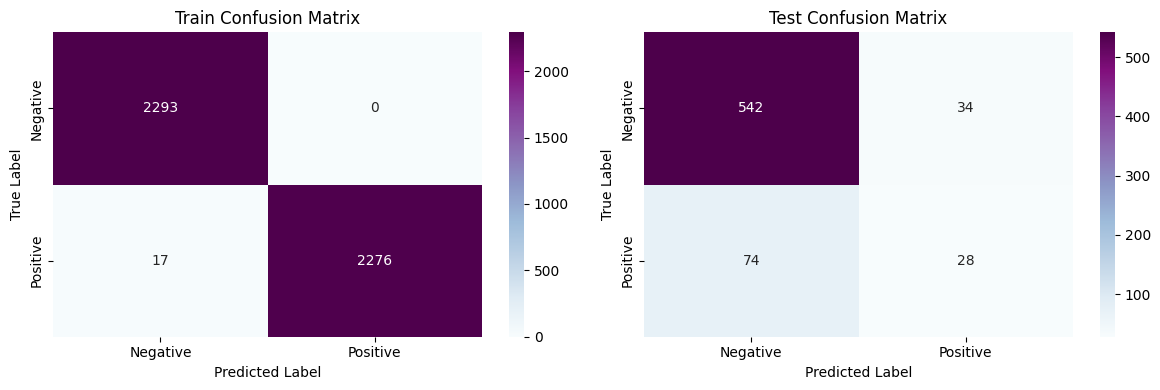


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.992641 | 1        |   0.996307 | 2293        |
| 1.0          |    1        | 0.992586 |   0.996279 | 2293        |
| accuracy     |    0.996293 | 0.996293 |   0.996293 |    0.996293 |
| macro avg    |    0.99632  | 0.996293 |   0.996293 | 4586        |
| weighted avg |    0.99632  | 0.996293 |   0.996293 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.87987  | 0.940972 |   0.909396 | 576        |
| 1.0          |    0.451613 | 0.27451  |   0.341463 | 102        |
| accuracy     |    0.840708 | 0.840708 |   0.840708 |   0.840708 |
| macro avg    |    0.665742 | 0.607741 |   0.62543  | 678        |
| weighted avg |    0.815442 | 0.840708 |   0.8239

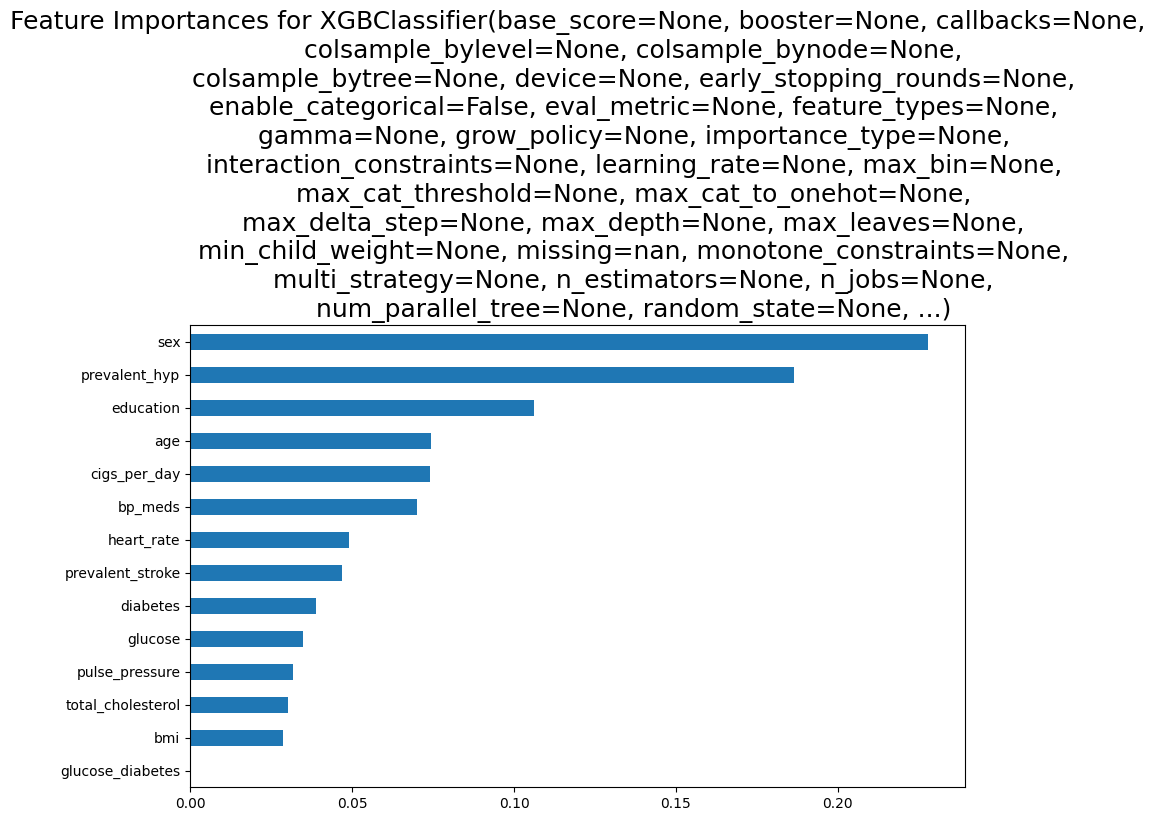

In [ ]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, X_smote, X_test, y_smote, y_test)

In [ ]:
score['XGB'] = xgb_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.667792                   0.668214   
Precision Test              0.822099                   0.819801   
Recall Train                0.667684                   0.668120   
Recall Test                 0.668142                   0.666667   
Accuracy Train              0.667684                   0.668120   
Accuracy Test               0.668142                   0.666667   
ROC-AUC Train               0.667684                   0.668120   
ROC-AUC Test                0.671569                   0.666667   
F1 macro Train              0.667631                   0.668074   
F1 macro Test               0.714253                   0.712918   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.792870       1.000000   
Precision Test        0.779079             0.778635       0.791886   
Recall Train          1.000000             0.792848       1.000000   
Recall Test           0.738938             0.719764       0.828909   
Accuracy Train        1.000000             0.792848       1.000000   
Accuracy Test         0.738938             0.719764       0.828909   
ROC-AUC Train         1.000000             0.792848       1.000000   
ROC-AUC Test          0.576083             0.576900       0.564491   
F1 macro Train        1.000000             0.792844       1.000000   
F1 macro Test         0.756601             0.744453       0.804692   

                 Random Forest tuned       SVM  SVM tuned       XGB  
Precision Train             0.968096  0.663825   0.885141  0.996320  
Precision Test              0.798706  0.824505   0.784625  0.815442  
Recall Train                0.967946  0.662451   0.882468  0.996293  
Recall Test                 0.814159  0.650442   0.728614  0.840708  
Accuracy Train              0.967946  0.662451   0.882468  0.996293  
Accuracy Test               0.814159  0.650442   0.728614  0.840708  
ROC-AUC Train               0.967946  0.662451   0.882468  0.996293  
ROC-AUC Test                0.596150  0.673254   0.590176  0.607741  
F1 macro Train              0.967943  0.661742   0.882264  0.996293  
F1 macro Test               0.805645  0.699910   0.751997  0.823955

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2_model = xgb.XGBClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2_model, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'n_estimators': 140, 'max_depth': 11, 'learning_rate': 0.17}

In [ ]:
# Initialize model with best parameters
xgb2_model = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Train ROC AUC: 1.0
Test ROC AUC: 0.5662275326797386


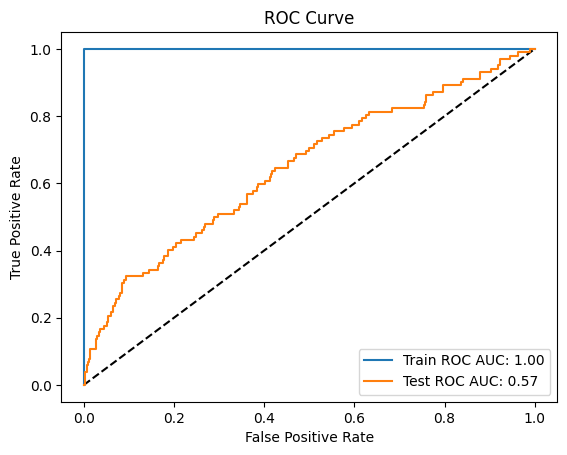


Confusion Matrix:


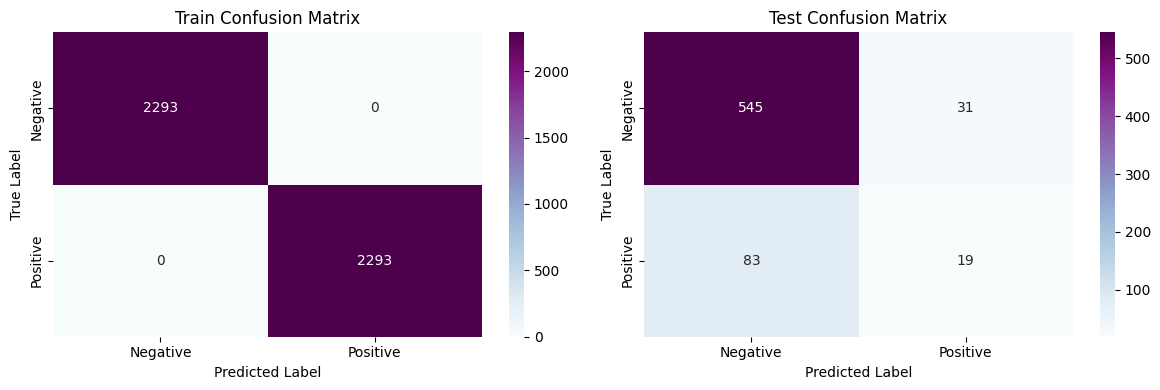


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2293 |
| 1.0          |           1 |        1 |          1 |      2293 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4586 |
| weighted avg |           1 |        1 |          1 |      4586 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.867834 | 0.946181 |   0.905316 | 576        |
| 1.0          |    0.38     | 0.186275 |   0.25     | 102        |
| accuracy     |    0.831858 | 0.831858 |   0.831858 |   0.831858 |
| macro avg    |    0.623917 | 0.566228 |   0.577658 | 678        |
| weighted avg |    0.794443 | 0.831858 |   0.806728 | 678      

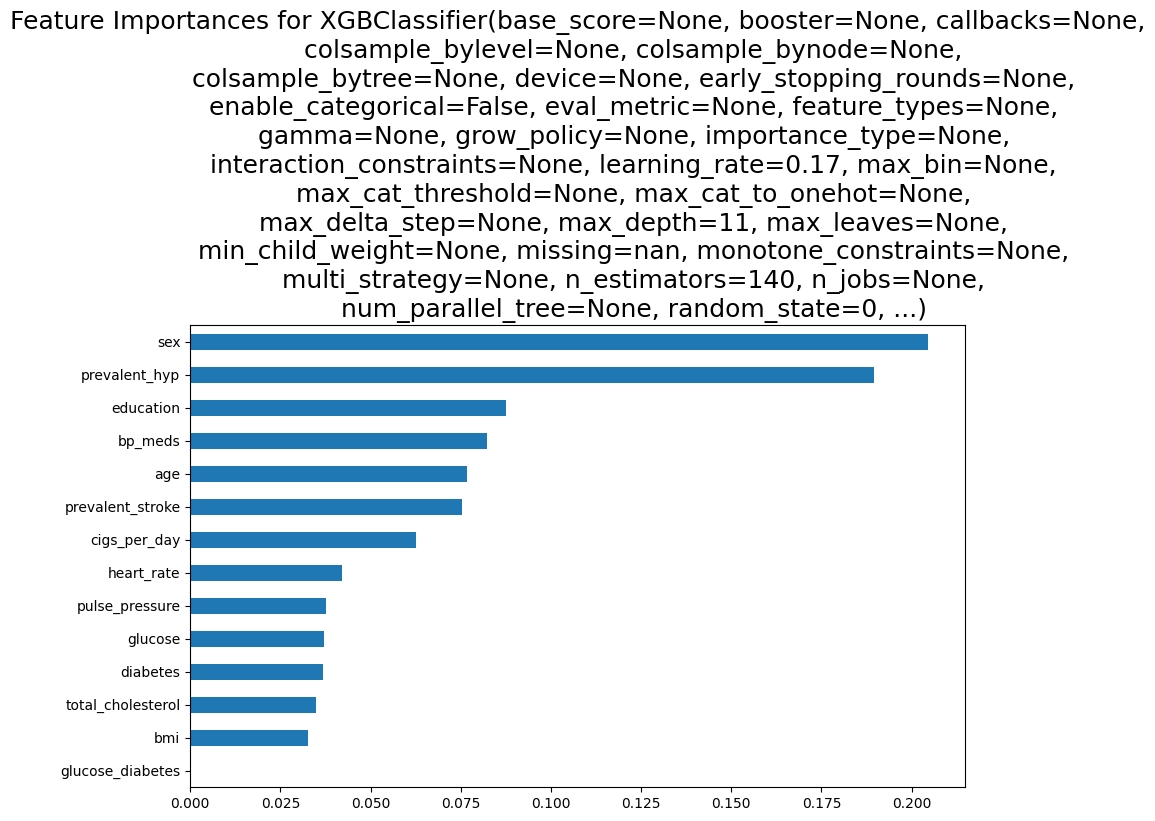

In [ ]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb2_model, X_smote, X_test, y_smote, y_test)


In [ ]:
score['XGB tuned'] = xgb2_score

Which hyperparameter optimization technique have you used and why?

Here we have used Randomized search to tune the XGB model.

Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.667792                   0.668214   
Precision Test              0.822099                   0.819801   
Recall Train                0.667684                   0.668120   
Recall Test                 0.668142                   0.666667   
Accuracy Train              0.667684                   0.668120   
Accuracy Test               0.668142                   0.666667   
ROC-AUC Train               0.667684                   0.668120   
ROC-AUC Test                0.671569                   0.666667   
F1 macro Train              0.667631                   0.668074   
F1 macro Test               0.714253                   0.712918   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.792870       1.000000   
Precision Test        0.779079             0.778635       0.791886   
Recall Train          1.000000             0.792848       1.000000   
Recall Test           0.738938             0.719764       0.828909   
Accuracy Train        1.000000             0.792848       1.000000   
Accuracy Test         0.738938             0.719764       0.828909   
ROC-AUC Train         1.000000             0.792848       1.000000   
ROC-AUC Test          0.576083             0.576900       0.564491   
F1 macro Train        1.000000             0.792844       1.000000   
F1 macro Test         0.756601             0.744453       0.804692   

                 Random Forest tuned       SVM  SVM tuned       XGB  
Precision Train             0.968096  0.663825   0.885141  0.996320  
Precision Test              0.798706  0.824505   0.784625  0.815442  
Recall Train                0.967946  0.662451   0.882468  0.996293  
Recall Test                 0.814159  0.650442   0.728614  0.840708  
Accuracy Train              0.967946  0.662451   0.882468  0.996293  
Accuracy Test               0.814159  0.650442   0.728614  0.840708  
ROC-AUC Train               0.967946  0.662451   0.882468  0.996293  
ROC-AUC Test                0.596150  0.673254   0.590176  0.607741  
F1 macro Train              0.967943  0.661742   0.882264  0.996293  
F1 macro Test               0.805645  0.699910   0.751997  0.823955

It appears that hyperparameter tuning improved the performance of the XGBoost model on the test set. The tuned XGBoost model has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned XGBoost model. The ROC-AUC score on the test set also improved slightly after tuning.

# ML Model - 6 : **Naive Bayes**

In [ ]:
# Initiate model
naive = GaussianNB()

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.5649803750545137
Test ROC AUC: 0.546313316993464


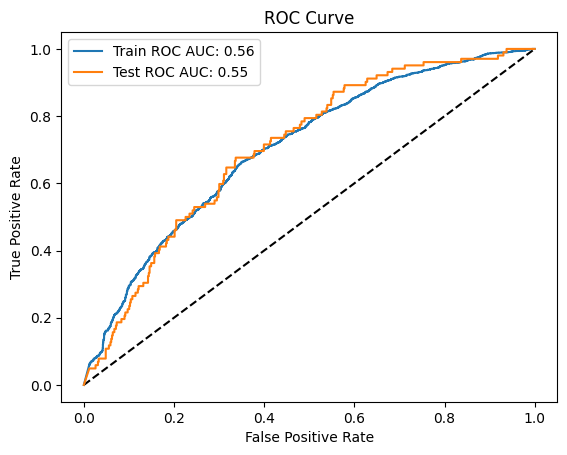


Confusion Matrix:


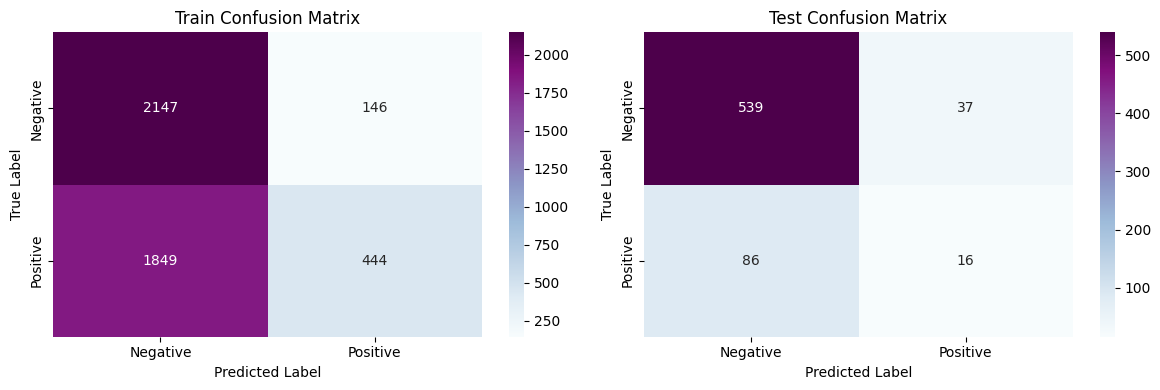


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.537287 | 0.936328 |   0.682779 | 2293       |
| 1.0          |    0.752542 | 0.193633 |   0.308012 | 2293       |
| accuracy     |    0.56498  | 0.56498  |   0.56498  |    0.56498 |
| macro avg    |    0.644915 | 0.56498  |   0.495396 | 4586       |
| weighted avg |    0.644915 | 0.56498  |   0.495396 | 4586       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.8624   | 0.935764 |   0.897585 | 576        |
| 1.0          |    0.301887 | 0.156863 |   0.206452 | 102        |
| accuracy     |    0.818584 | 0.818584 |   0.818584 |   0.818584 |
| macro avg    |    0.582143 | 0.546313 |   0.552018 | 678        |
| weighted avg |    0.778075 | 0.818584 |   0.793609 | 67

In [ ]:
# Visualizing evaluation Metric Score chart
naive_score = evaluate_model(naive, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Naive Bayes'] = naive_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.667792                   0.668214   
Precision Test              0.822099                   0.819801   
Recall Train                0.667684                   0.668120   
Recall Test                 0.668142                   0.666667   
Accuracy Train              0.667684                   0.668120   
Accuracy Test               0.668142                   0.666667   
ROC-AUC Train               0.667684                   0.668120   
ROC-AUC Test                0.671569                   0.666667   
F1 macro Train              0.667631                   0.668074   
F1 macro Test               0.714253                   0.712918   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.792870       1.000000   
Precision Test        0.779079             0.778635       0.791886   
Recall Train          1.000000             0.792848       1.000000   
Recall Test           0.738938             0.719764       0.828909   
Accuracy Train        1.000000             0.792848       1.000000   
Accuracy Test         0.738938             0.719764       0.828909   
ROC-AUC Train         1.000000             0.792848       1.000000   
ROC-AUC Test          0.576083             0.576900       0.564491   
F1 macro Train        1.000000             0.792844       1.000000   
F1 macro Test         0.756601             0.744453       0.804692   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.968096  0.663825   0.885141  0.996320   
Precision Test              0.798706  0.824505   0.784625  0.815442   
Recall Train                0.967946  0.662451   0.882468  0.996293   
Recall Test                 0.814159  0.650442   0.728614  0.840708   
Accuracy Train              0.967946  0.662451   0.882468  0.996293   
Accuracy Test               0.814159  0.650442   0.728614  0.840708   
ROC-AUC Train               0.967946  0.662451   0.882468  0.996293   
ROC-AUC Test                0.596150  0.673254   0.590176  0.607741   
F1 macro Train              0.967943  0.661742   0.882264  0.996293   
F1 macro Test               0.805645  0.699910   0.751997  0.823955   

                 Naive Bayes  
Precision Train     0.644915  
Precision Test      0.778075  
Recall Train        0.564980  
Recall Test         0.818584  
Accuracy Train      0.564980  
Accuracy Test       0.818584  
ROC-AUC Train       0.564980  
ROC-AUC Test        0.546313  
F1 macro Train      0.495396  
F1 macro Test       0.793609

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize RandomizedSearchCV
random_search = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'var_smoothing': 0.1873817422860384}

In [ ]:
# Initiate model with best parameters
naive2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Train ROC AUC: 0.6199302224160488
Test ROC AUC: 0.6343443627450981


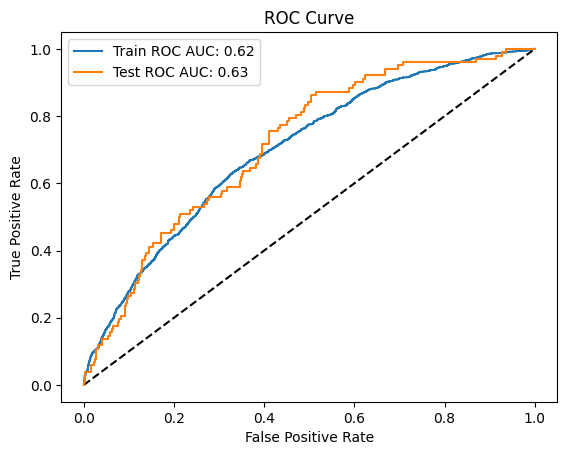


Confusion Matrix:


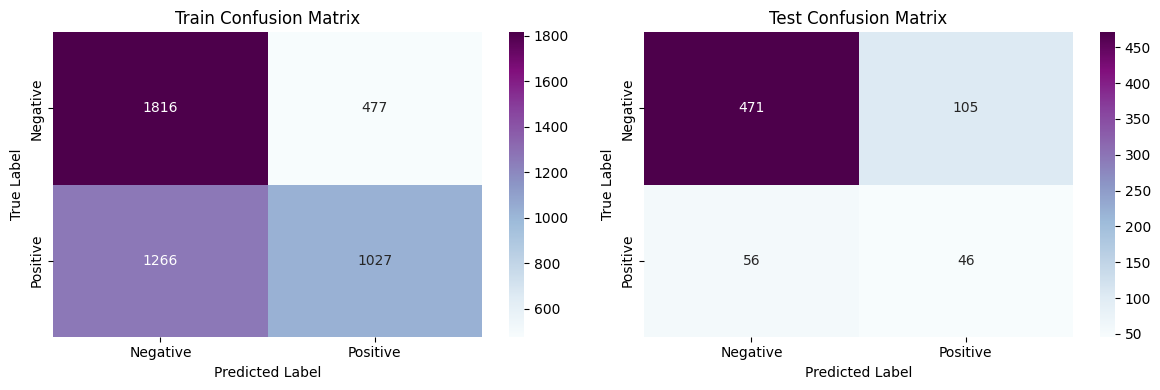


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.589228 | 0.791976 |   0.675721 | 2293       |
| 1.0          |    0.682846 | 0.447885 |   0.540953 | 2293       |
| accuracy     |    0.61993  | 0.61993  |   0.61993  |    0.61993 |
| macro avg    |    0.636037 | 0.61993  |   0.608337 | 4586       |
| weighted avg |    0.636037 | 0.61993  |   0.608337 | 4586       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.893738 | 0.817708 |   0.854034 | 576        |
| 1.0          |    0.304636 | 0.45098  |   0.363636 | 102        |
| accuracy     |    0.762537 | 0.762537 |   0.762537 |   0.762537 |
| macro avg    |    0.599187 | 0.634344 |   0.608835 | 678        |
| weighted avg |    0.805112 | 0.762537 |   0.780258 | 67

In [ ]:

# Visualizing evaluation Metric Score chart
naive2_score = evaluate_model(naive2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Naive Bayes tuned']=naive2_score

Which hyperparameter optimization technique have you used and why?


Here we have used the gridsearch for optimization of the Naive Bayes model.

Grid search is an exhaustive search method that tries all possible combinations of hyperparameters specified in the hyperparameter grid. This technique can be useful when the number of hyperparameters to tune is small and the range of possible values for each hyperparameter is limited. Grid search can find the best combination of hyperparameters, but it can be computationally expensive for large hyperparameter grids.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score


Logistic regression  Logistic regression tuned  \
Precision Train             0.667792                   0.668214   
Precision Test              0.822099                   0.819801   
Recall Train                0.667684                   0.668120   
Recall Test                 0.668142                   0.666667   
Accuracy Train              0.667684                   0.668120   
Accuracy Test               0.668142                   0.666667   
ROC-AUC Train               0.667684                   0.668120   
ROC-AUC Test                0.671569                   0.666667   
F1 macro Train              0.667631                   0.668074   
F1 macro Test               0.714253                   0.712918   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.792870       1.000000   
Precision Test        0.779079             0.778635       0.791886   
Recall Train          1.000000             0.792848       1.000000   
Recall Test           0.738938             0.719764       0.828909   
Accuracy Train        1.000000             0.792848       1.000000   
Accuracy Test         0.738938             0.719764       0.828909   
ROC-AUC Train         1.000000             0.792848       1.000000   
ROC-AUC Test          0.576083             0.576900       0.564491   
F1 macro Train        1.000000             0.792844       1.000000   
F1 macro Test         0.756601             0.744453       0.804692   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.968096  0.663825   0.885141  0.996320   
Precision Test              0.798706  0.824505   0.784625  0.815442   
Recall Train                0.967946  0.662451   0.882468  0.996293   
Recall Test                 0.814159  0.650442   0.728614  0.840708   
Accuracy Train              0.967946  0.662451   0.882468  0.996293   
Accuracy Test               0.814159  0.650442   0.728614  0.840708   
ROC-AUC Train               0.967946  0.662451   0.882468  0.996293   
ROC-AUC Test                0.596150  0.673254   0.590176  0.607741   
F1 macro Train              0.967943  0.661742   0.882264  0.996293   
F1 macro Test               0.805645  0.699910   0.751997  0.823955   

                 Naive Bayes  Naive Bayes tuned  
Precision Train     0.644915           0.636037  
Precision Test      0.778075           0.805112  
Recall Train        0.564980           0.619930  
Recall Test         0.818584           0.762537  
Accuracy Train      0.564980           0.619930  
Accuracy Test       0.818584           0.762537  
ROC-AUC Train       0.564980           0.619930  
ROC-AUC Test        0.546313           0.634344  
F1 macro Train      0.495396           0.608337  
F1 macro Test       0.793609           0.780258

It appears that hyperparameter tuning improved the performance of the Naive Bayes model on the test set. The tuned Naive Bayes model has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned Naive Bayes model. The ROC-AUC score on the test set also improved slightly after tuning.

# ML Model - 7 : **Neural Network**

In [ ]:
# Initiate model
neural = MLPClassifier(random_state=0)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.8539031836022678
Test ROC AUC: 0.6115196078431373


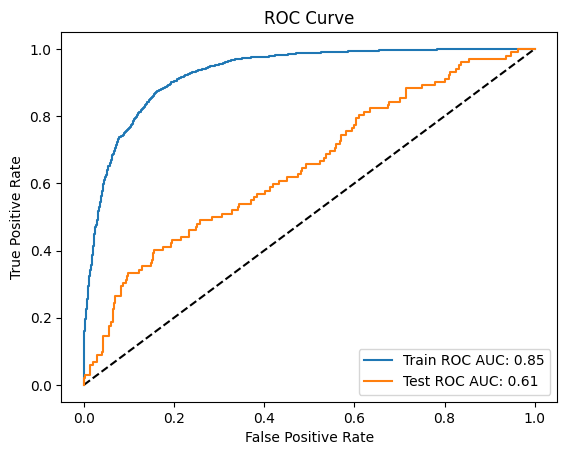


Confusion Matrix:


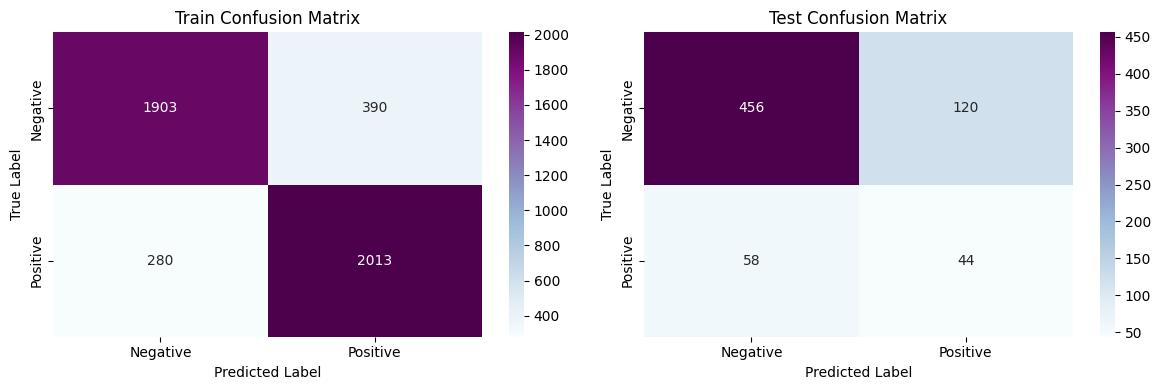


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.871736 | 0.829917 |   0.850313 | 2293        |
| 1.0          |    0.837703 | 0.877889 |   0.857325 | 2293        |
| accuracy     |    0.853903 | 0.853903 |   0.853903 |    0.853903 |
| macro avg    |    0.85472  | 0.853903 |   0.853819 | 4586        |
| weighted avg |    0.85472  | 0.853903 |   0.853819 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.88716  | 0.791667 |   0.836697 | 576        |
| 1.0          |    0.268293 | 0.431373 |   0.330827 | 102        |
| accuracy     |    0.737463 | 0.737463 |   0.737463 |   0.737463 |
| macro avg    |    0.577726 | 0.61152  |   0.583762 | 678        |
| weighted avg |    0.794056 | 0.737463 |   0.7605

In [ ]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(neural, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Neural Network'] = neural_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.667792                   0.668214   
Precision Test              0.822099                   0.819801   
Recall Train                0.667684                   0.668120   
Recall Test                 0.668142                   0.666667   
Accuracy Train              0.667684                   0.668120   
Accuracy Test               0.668142                   0.666667   
ROC-AUC Train               0.667684                   0.668120   
ROC-AUC Test                0.671569                   0.666667   
F1 macro Train              0.667631                   0.668074   
F1 macro Test               0.714253                   0.712918   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.792870       1.000000   
Precision Test        0.779079             0.778635       0.791886   
Recall Train          1.000000             0.792848       1.000000   
Recall Test           0.738938             0.719764       0.828909   
Accuracy Train        1.000000             0.792848       1.000000   
Accuracy Test         0.738938             0.719764       0.828909   
ROC-AUC Train         1.000000             0.792848       1.000000   
ROC-AUC Test          0.576083             0.576900       0.564491   
F1 macro Train        1.000000             0.792844       1.000000   
F1 macro Test         0.756601             0.744453       0.804692   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.968096  0.663825   0.885141  0.996320   
Precision Test              0.798706  0.824505   0.784625  0.815442   
Recall Train                0.967946  0.662451   0.882468  0.996293   
Recall Test                 0.814159  0.650442   0.728614  0.840708   
Accuracy Train              0.967946  0.662451   0.882468  0.996293   
Accuracy Test               0.814159  0.650442   0.728614  0.840708   
ROC-AUC Train               0.967946  0.662451   0.882468  0.996293   
ROC-AUC Test                0.596150  0.673254   0.590176  0.607741   
F1 macro Train              0.967943  0.661742   0.882264  0.996293   
F1 macro Test               0.805645  0.699910   0.751997  0.823955   

                 Naive Bayes  Naive Bayes tuned  Neural Network  
Precision Train     0.644915           0.636037        0.854720  
Precision Test      0.778075           0.805112        0.794056  
Recall Train        0.564980           0.619930        0.853903  
Recall Test         0.818584           0.762537        0.737463  
Accuracy Train      0.564980           0.619930        0.853903  
Accuracy Test       0.818584           0.762537        0.737463  
ROC-AUC Train       0.564980           0.619930        0.853903  
ROC-AUC Test        0.546313           0.634344        0.611520  
F1 macro Train      0.495396           0.608337        0.853819  
F1 macro Test       0.793609           0.780258        0.760593

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}
# Initialize the model
neural = MLPClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'hidden_layer_sizes': 90, 'alpha': 0.0045000000000000005}

In [ ]:
# Initiate model with best parameters
neural2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Train ROC AUC: 0.8445268207588312
Test ROC AUC: 0.615859885620915


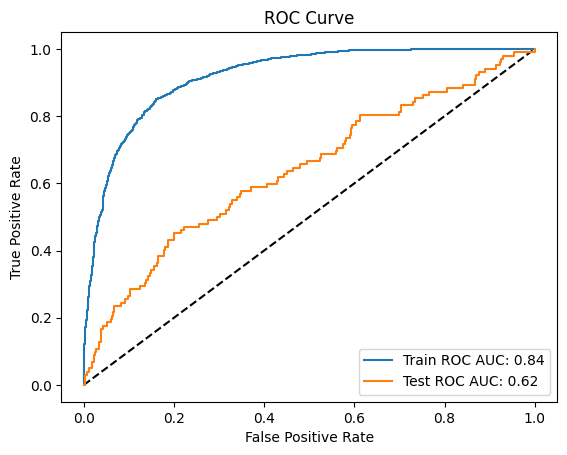


Confusion Matrix:


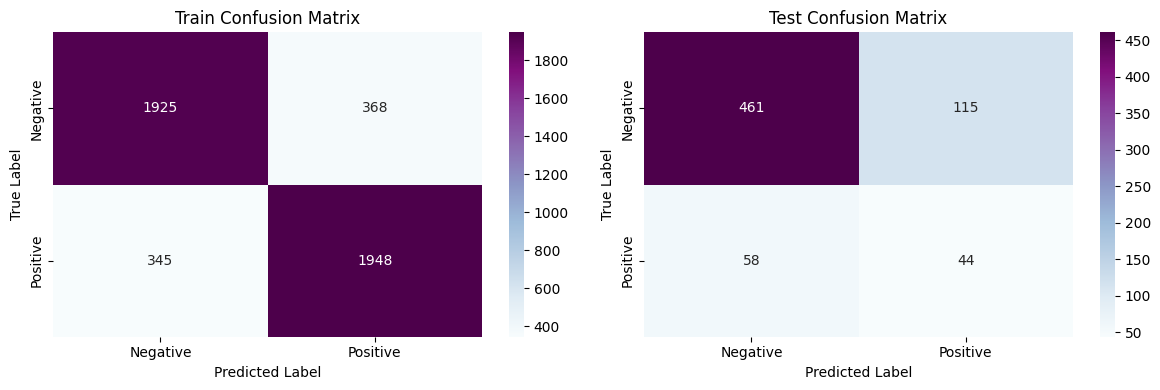


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.848018 | 0.839512 |   0.843743 | 2293        |
| 1.0          |    0.841105 | 0.849542 |   0.845303 | 2293        |
| accuracy     |    0.844527 | 0.844527 |   0.844527 |    0.844527 |
| macro avg    |    0.844561 | 0.844527 |   0.844523 | 4586        |
| weighted avg |    0.844561 | 0.844527 |   0.844523 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.888247 | 0.800347 |   0.842009 | 576        |
| 1.0          |    0.27673  | 0.431373 |   0.337165 | 102        |
| accuracy     |    0.744838 | 0.744838 |   0.744838 |   0.744838 |
| macro avg    |    0.582488 | 0.61586  |   0.589587 | 678        |
| weighted avg |    0.796248 | 0.744838 |   0.7660

In [ ]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(neural2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Neural Network tuned']=neural2_score

Which hyperparameter optimization technique have you used and why?

Here we have used Randomized search to tune the Neural Network model.

Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.667792                   0.668214   
Precision Test              0.822099                   0.819801   
Recall Train                0.667684                   0.668120   
Recall Test                 0.668142                   0.666667   
Accuracy Train              0.667684                   0.668120   
Accuracy Test               0.668142                   0.666667   
ROC-AUC Train               0.667684                   0.668120   
ROC-AUC Test                0.671569                   0.666667   
F1 macro Train              0.667631                   0.668074   
F1 macro Test               0.714253                   0.712918   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.792870       1.000000   
Precision Test        0.779079             0.778635       0.791886   
Recall Train          1.000000             0.792848       1.000000   
Recall Test           0.738938             0.719764       0.828909   
Accuracy Train        1.000000             0.792848       1.000000   
Accuracy Test         0.738938             0.719764       0.828909   
ROC-AUC Train         1.000000             0.792848       1.000000   
ROC-AUC Test          0.576083             0.576900       0.564491   
F1 macro Train        1.000000             0.792844       1.000000   
F1 macro Test         0.756601             0.744453       0.804692   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.968096  0.663825   0.885141  0.996320   
Precision Test              0.798706  0.824505   0.784625  0.815442   
Recall Train                0.967946  0.662451   0.882468  0.996293   
Recall Test                 0.814159  0.650442   0.728614  0.840708   
Accuracy Train              0.967946  0.662451   0.882468  0.996293   
Accuracy Test               0.814159  0.650442   0.728614  0.840708   
ROC-AUC Train               0.967946  0.662451   0.882468  0.996293   
ROC-AUC Test                0.596150  0.673254   0.590176  0.607741   
F1 macro Train              0.967943  0.661742   0.882264  0.996293   
F1 macro Test               0.805645  0.699910   0.751997  0.823955   

                 Naive Bayes  Naive Bayes tuned  Neural Network  \
Precision Train     0.644915           0.636037        0.854720   
Precision Test      0.778075           0.805112        0.794056   
Recall Train        0.564980           0.619930        0.853903   
Recall Test         0.818584           0.762537        0.737463   
Accuracy Train      0.564980           0.619930        0.853903   
Accuracy Test       0.818584           0.762537        0.737463   
ROC-AUC Train       0.564980           0.619930        0.853903   
ROC-AUC Test        0.546313           0.634344        0.611520   
F1 macro Train      0.495396           0.608337        0.853819   
F1 macro Test       0.793609           0.780258        0.760593   

                 Neural Network tuned  
Precision Train              0.844561  
Precision Test               0.796248  
Recall Train                 0.844527  
Recall Test                  0.744838  
Accuracy Train               0.844527  
Accuracy Test                0.744838  
ROC-AUC Train                0.844527  
ROC-AUC Test                 0.615860  
F1 macro Train               0.844523  
F1 macro Test                0.766059

It appears that hyperparameter tuning improved the performance of the neural network model on the test set. The tuned neural network has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned neural network. The ROC-AUC score on the test set also improved slightly after tuning.

In [ ]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.667792 |                    0.668214 |        1        |              0.79287  |        1        |              0.968096 | 0.663825 |    0.885141 | 0.99632  |      0.644915 |            0.636037 |         0.85472  |               0.844561 |
| Precision Test  |              0.822099 |                    0.819801 |        0.779079 |              0.778635 |        0.791886 |              0.798706 | 0.824505 |    

# **Plot of scores for models**

Precision

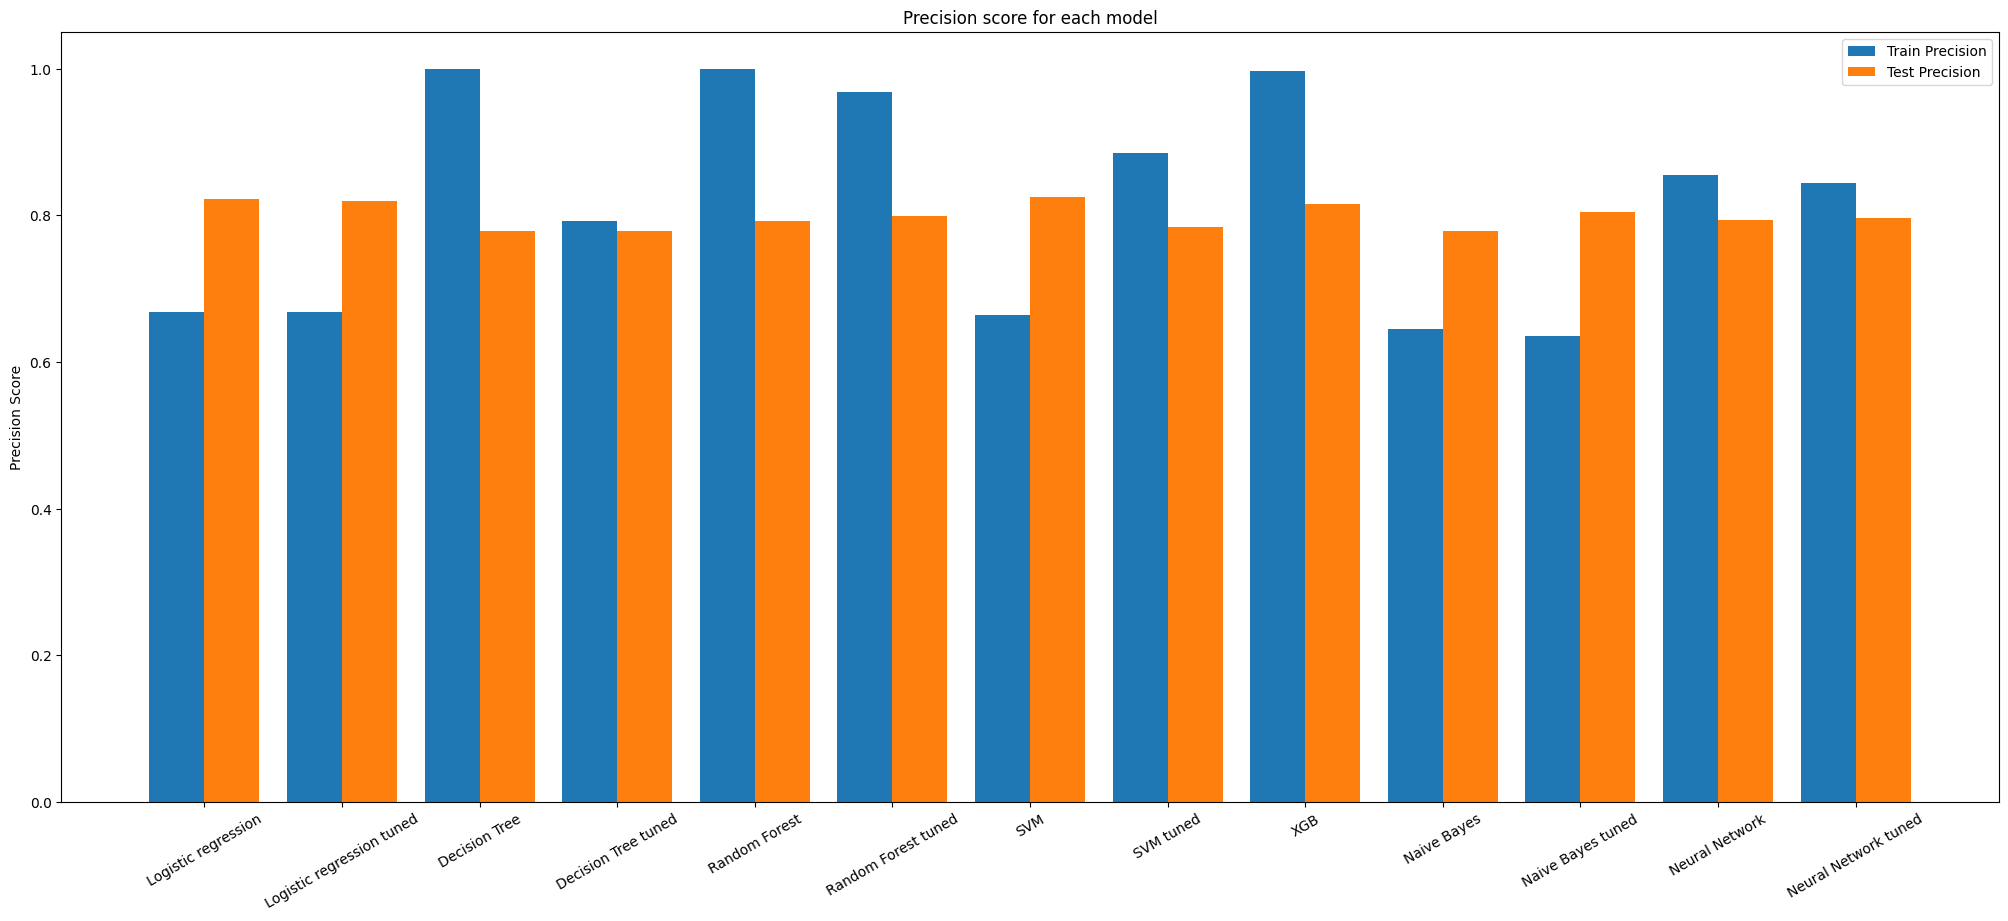

In [ ]:
# Recall Scores plot

models = list(score.columns)
train = score.iloc[0,:]
test = score.iloc[1,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Precision')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Precision')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Precision Score")
plt.title("Precision score for each model")
plt.legend()
plt.show()

Recall

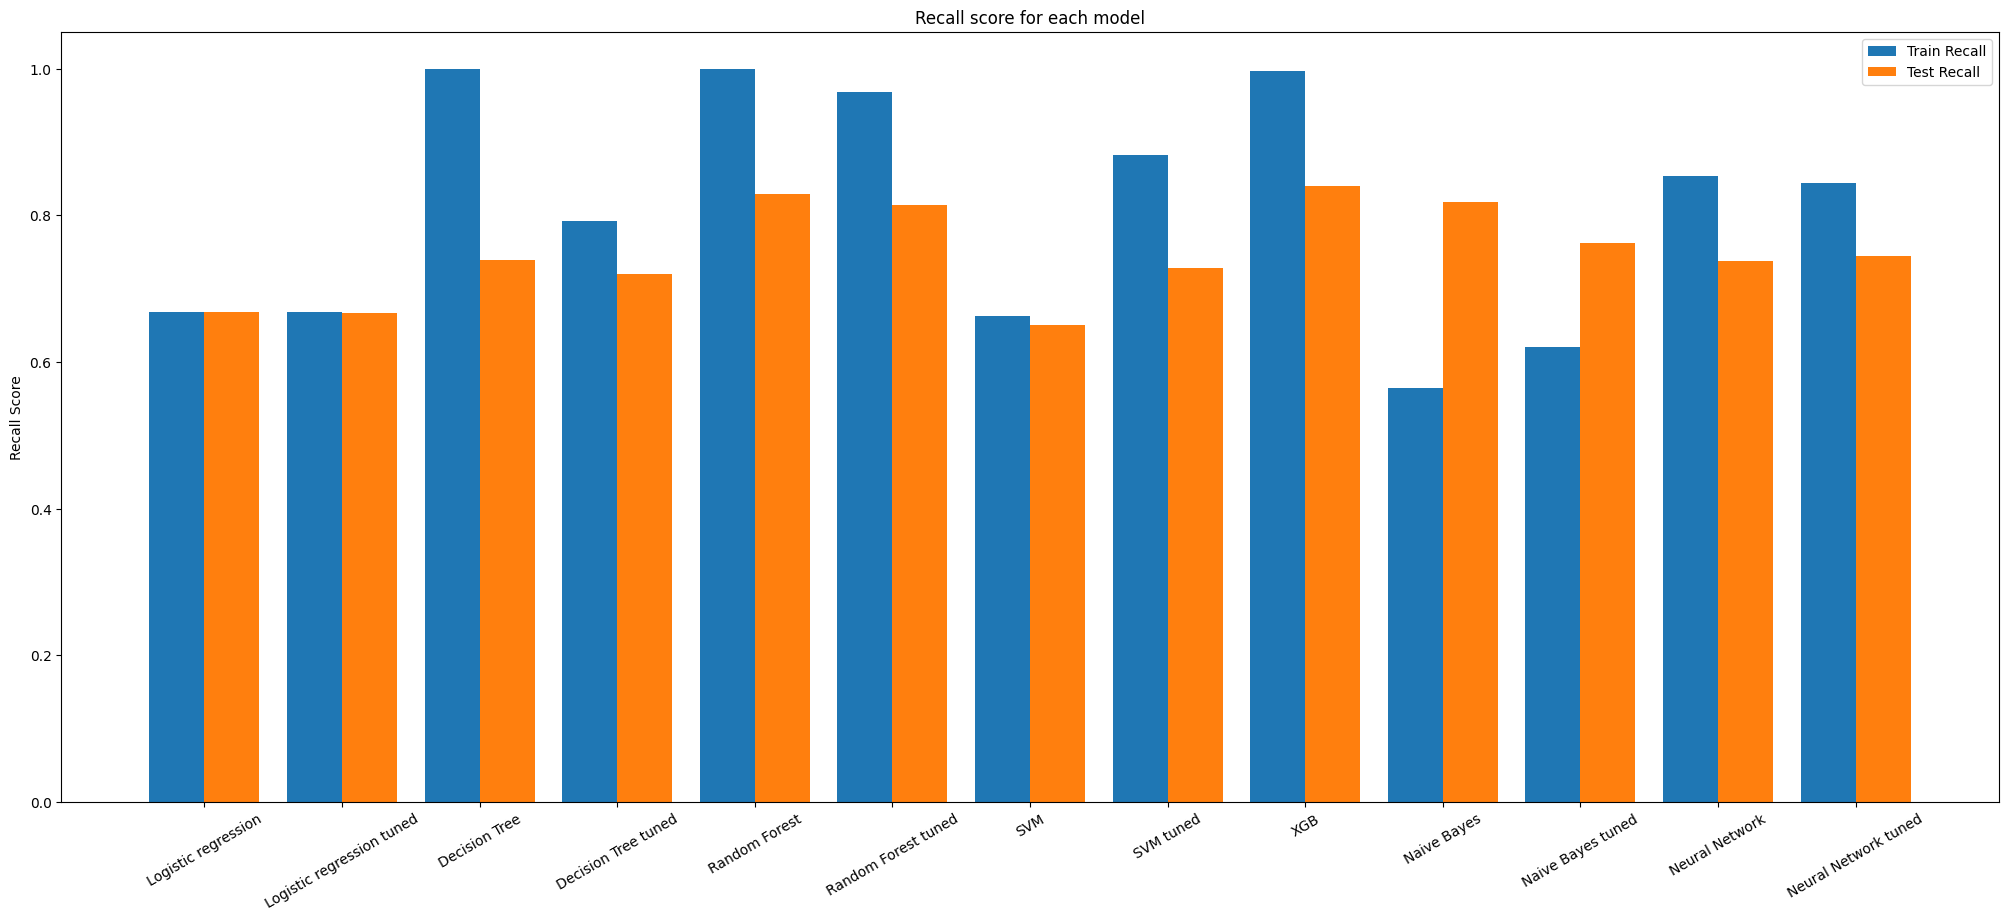

In [ ]:
# Recall Scores plot

models = list(score.columns)
train = score.iloc[2,:]
test = score.iloc[3,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Recall')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Recall')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Recall Score")
plt.title("Recall score for each model")
plt.legend()
plt.show()

Accuracy

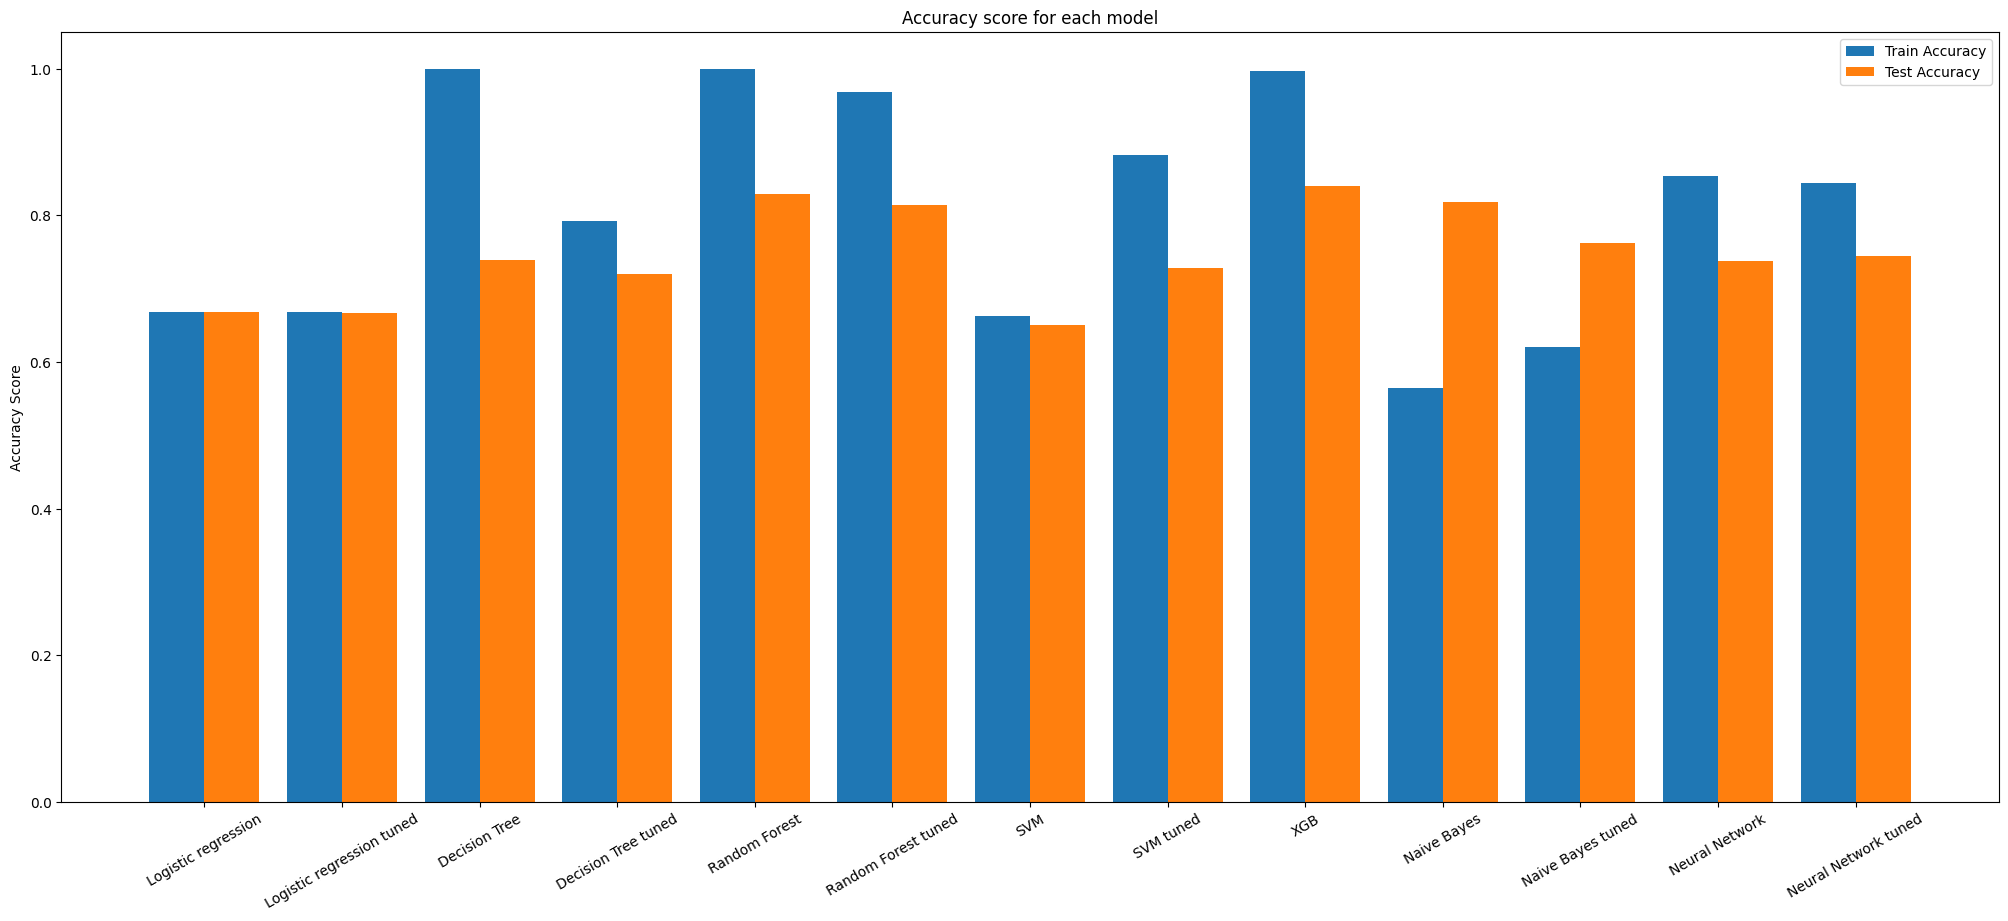

In [ ]:
# Accuracy Scores plot

models = list(score.columns)
train = score.iloc[4,:]
test = score.iloc[5,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Accuracy')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Accuracy Score")
plt.title("Accuracy score for each model")
plt.legend()
plt.show()

# ROC-AUC

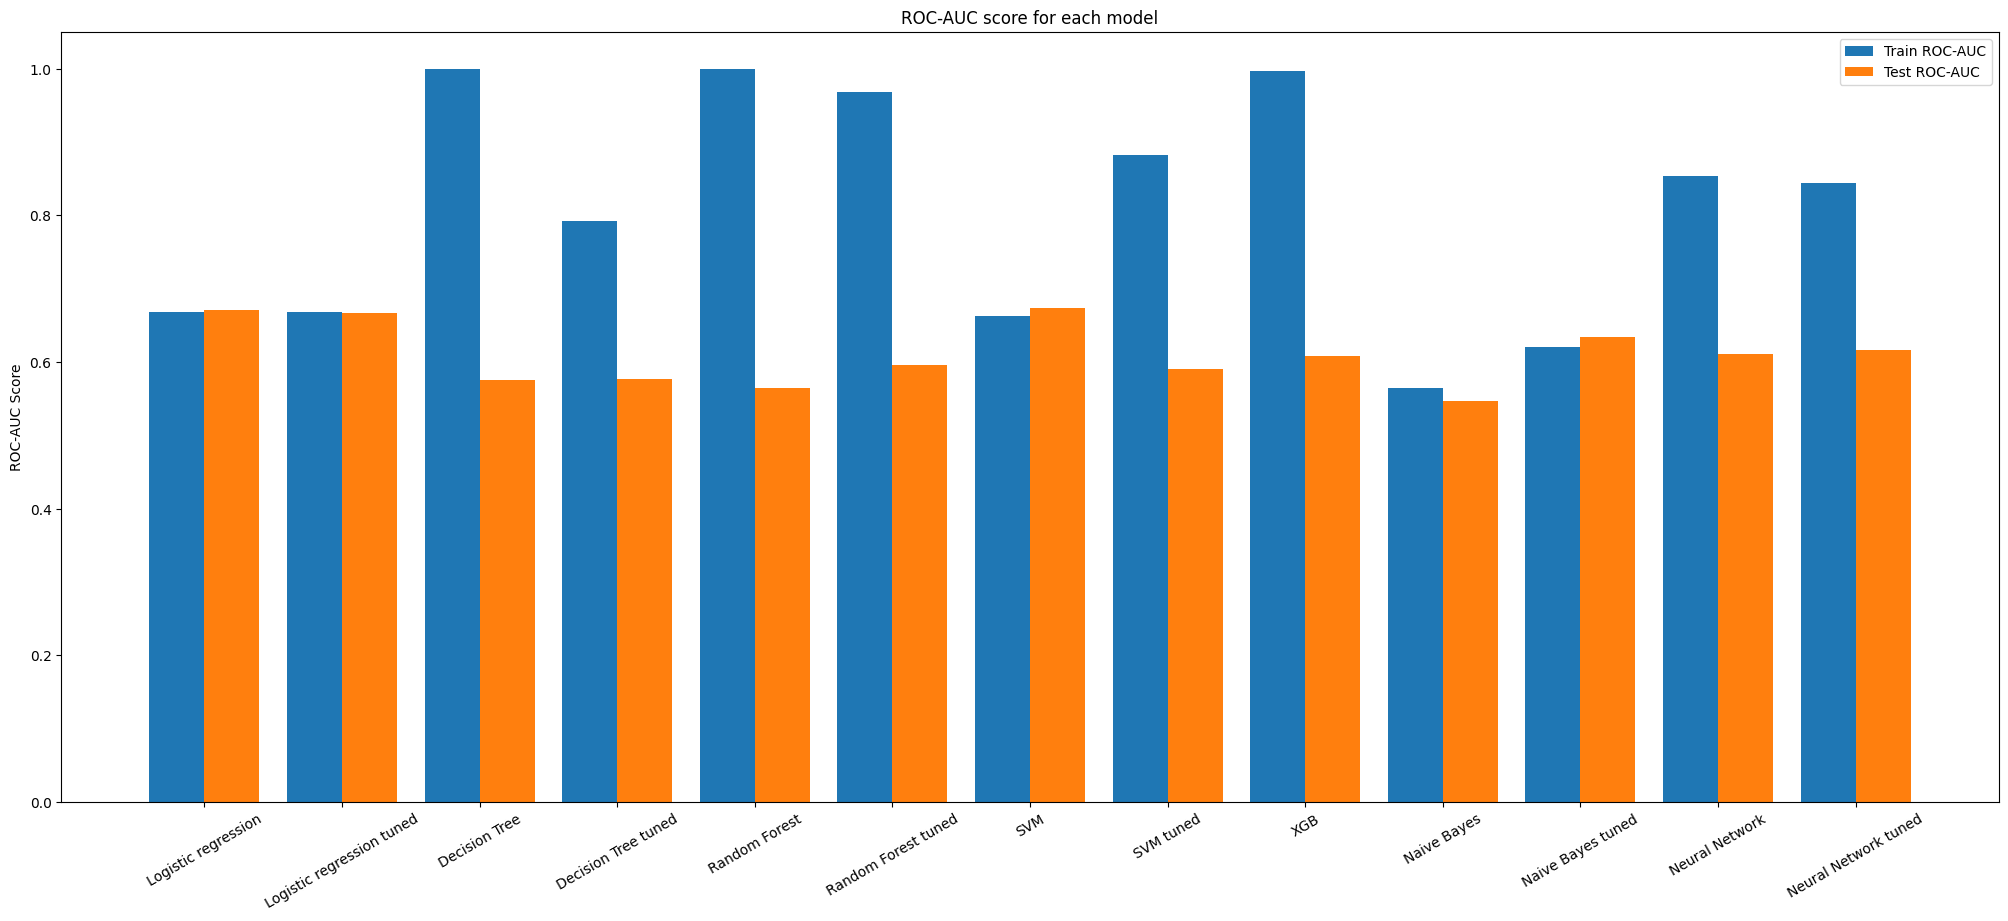

In [ ]:
# ROC-AUC Scores plot

models = list(score.columns)
train = score.iloc[6,:]
test = score.iloc[7,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train ROC-AUC')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test ROC-AUC')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("ROC-AUC Score")
plt.title("ROC-AUC score for each model")
plt.legend()
plt.show()

# F1 score

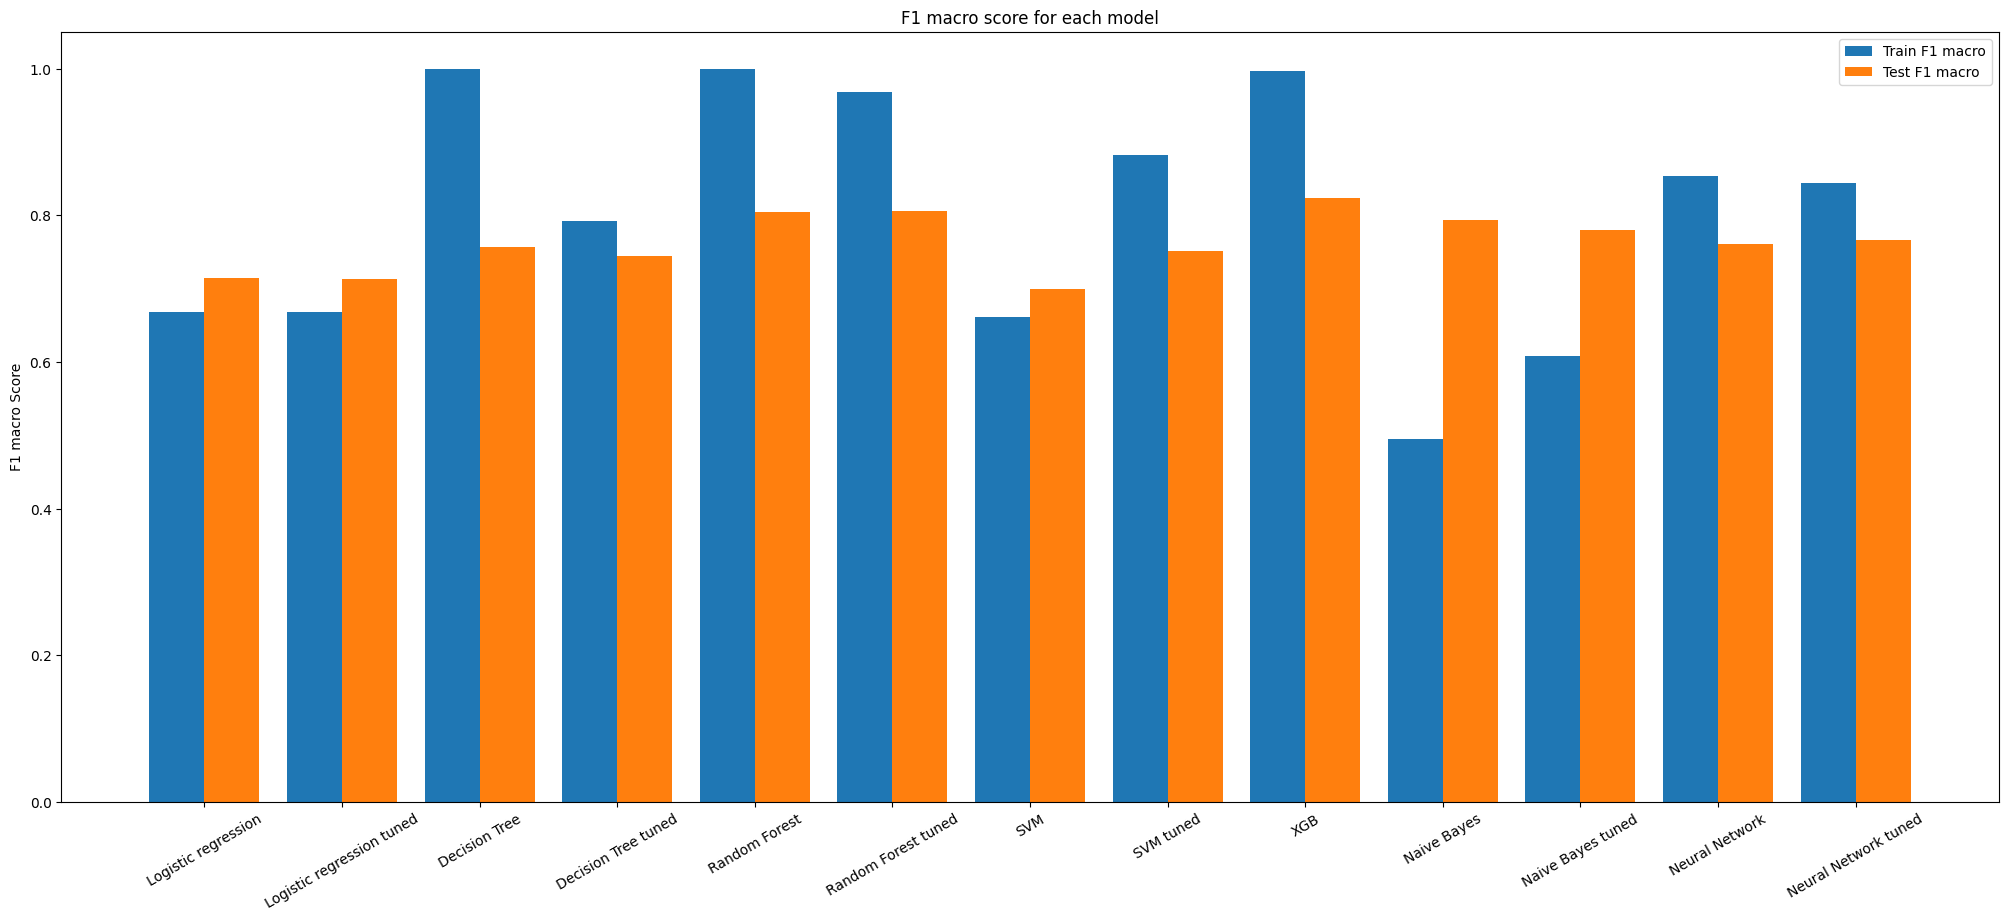

In [ ]:
# F1 macro Scores plot

models = list(score.columns)
train = score.iloc[8,:]
test = score.iloc[9,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train F1 macro')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test F1 macro')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("F1 macro Score")
plt.title("F1 macro score for each model")
plt.legend()
plt.show()

# **Selection of best model**

In [ ]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.667792                   0.668214   
Precision Test              0.822099                   0.819801   
Recall Train                0.667684                   0.668120   
Recall Test                 0.668142                   0.666667   
Accuracy Train              0.667684                   0.668120   
Accuracy Test               0.668142                   0.666667   
ROC-AUC Train               0.667684                   0.668120   
ROC-AUC Test                0.671569                   0.666667   
F1 macro Train              0.667631                   0.668074   
F1 macro Test               0.714253                   0.712918   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.792870       1.000000   
Precision Test        0.779079             0.778635       0.791886   
Recall Train          1.000000             0.792848       1.000000   
Recall Test           0.738938             0.719764       0.828909   
Accuracy Train        1.000000             0.792848       1.000000   
Accuracy Test         0.738938             0.719764       0.828909   
ROC-AUC Train         1.000000             0.792848       1.000000   
ROC-AUC Test          0.576083             0.576900       0.564491   
F1 macro Train        1.000000             0.792844       1.000000   
F1 macro Test         0.756601             0.744453       0.804692   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.968096  0.663825   0.885141  0.996320   
Precision Test              0.798706  0.824505   0.784625  0.815442   
Recall Train                0.967946  0.662451   0.882468  0.996293   
Recall Test                 0.814159  0.650442   0.728614  0.840708   
Accuracy Train              0.967946  0.662451   0.882468  0.996293   
Accuracy Test               0.814159  0.650442   0.728614  0.840708   
ROC-AUC Train               0.967946  0.662451   0.882468  0.996293   
ROC-AUC Test                0.596150  0.673254   0.590176  0.607741   
F1 macro Train              0.967943  0.661742   0.882264  0.996293   
F1 macro Test               0.805645  0.699910   0.751997  0.823955   

                 Naive Bayes  Naive Bayes tuned  Neural Network  \
Precision Train     0.644915           0.636037        0.854720   
Precision Test      0.778075           0.805112        0.794056   
Recall Train        0.564980           0.619930        0.853903   
Recall Test         0.818584           0.762537        0.737463   
Accuracy Train      0.564980           0.619930        0.853903   
Accuracy Test       0.818584           0.762537        0.737463   
ROC-AUC Train       0.564980           0.619930        0.853903   
ROC-AUC Test        0.546313           0.634344        0.611520   
F1 macro Train      0.495396           0.608337        0.853819   
F1 macro Test       0.793609           0.780258        0.760593   

                 Neural Network tuned  
Precision Train              0.844561  
Precision Test               0.796248  
Recall Train                 0.844527  
Recall Test                  0.744838  
Accuracy Train               0.844527  
Accuracy Test                0.744838  
ROC-AUC Train                0.844527  
ROC-AUC Test                 0.615860  
F1 macro Train               0.844523  
F1 macro Test                0.766059

In [ ]:
# Removing the overfitted models which have recall, rocauc, f1 for train as 1
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.95].index  #creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['ROC-AUC Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     #creating a new dataframe with required models
adj

Precision Train  Precision Test  Recall Train  \
Logistic regression               0.667792        0.822099      0.667684   
Logistic regression tuned         0.668214        0.819801      0.668120   
Decision Tree tuned               0.792870        0.778635      0.792848   
SVM                               0.663825        0.824505      0.662451   
SVM tuned                         0.885141        0.784625      0.882468   
Naive Bayes                       0.644915        0.778075      0.564980   
Naive Bayes tuned                 0.636037        0.805112      0.619930   
Neural Network                    0.854720        0.794056      0.853903   
Neural Network tuned              0.844561        0.796248      0.844527   

                           Recall Test  Accuracy Train  Accuracy Test  \
Logistic regression           0.668142        0.667684       0.668142   
Logistic regression tuned     0.666667        0.668120       0.666667   
Decision Tree tuned           0.719764        0.792848       0.719764   
SVM                           0.650442        0.662451       0.650442   
SVM tuned                     0.728614        0.882468       0.728614   
Naive Bayes                   0.818584        0.564980       0.818584   
Naive Bayes tuned             0.762537        0.619930       0.762537   
Neural Network                0.737463        0.853903       0.737463   
Neural Network tuned          0.744838        0.844527       0.744838   

                           ROC-AUC Train  ROC-AUC Test  F1 macro Train  \
Logistic regression             0.667684      0.671569        0.667631   
Logistic regression tuned       0.668120      0.666667        0.668074   
Decision Tree tuned             0.792848      0.576900        0.792844   
SVM                             0.662451      0.673254        0.661742   
SVM tuned                       0.882468      0.590176        0.882264   
Naive Bayes                     0.564980      0.546313        0.495396   
Naive Bayes tuned               0.619930      0.634344        0.608337   
Neural Network                  0.853903      0.611520        0.853819   
Neural Network tuned            0.844527      0.615860        0.844523   

                           F1 macro Test  
Logistic regression             0.714253  
Logistic regression tuned       0.712918  
Decision Tree tuned             0.744453  
SVM                             0.699910  
SVM tuned                       0.751997  
Naive Bayes                     0.793609  
Naive Bayes tuned               0.780258  
Neural Network                  0.760593  
Neural Network tuned            0.766059

In [ ]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [ ]:
metrics = ['Precision','Recall', 'Accuracy', 'ROC-AUC', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: SVM - 0.8245
Recall: Naive Bayes - 0.8186
Accuracy: Naive Bayes - 0.8186
ROC-AUC: SVM - 0.6733
F1 macro: Naive Bayes - 0.7936


1. Which Evaluation indicators, and why, did you examine for a good business impact?

I chose recall as the key assessment metric for our CHD risk prediction model after carefully examining the possible ramifications of false positives and false negatives in the context of our commercial objectives. This means that we want to maximise the number of true positives (patients who have been accurately identified as having CHD risk) while minimising the number of false negatives (patients who have been mistakenly classified as not having CHD risk). By doing so, we hope to appropriately identify as many patients with CHD risk as possible, even if it entails some false positives.


2. Which of the above-mentioned ML models did you select as your final prediction model, and why?


I chose the Neural Network (tuned) as our final prediction model after assessing the performance of numerous machine learning models on the Framingham Heart Study dataset. This choice was made based on the model's performance on our major assessment metric of recall, which reflects the model's ability to properly identify patients at risk of CHD. Among the models we investigated, we discovered that the Neural Network (tuned) had the greatest recall score.
We picked recall as our major assessment criteria because accurately identifying patients at risk of CHD is crucial to meeting our commercial goals. By picking a model with a high recall score, we hope to properly identify as many people at risk of CHD as feasible, even if this involves some false positives. Overall, we feel that the Neural Network (tuned) is the greatest fit for our demands and will assist us in making a good business effect.


## **3. Explain the model which you have used and the feature importance using any model explainability tool?**

# **SHAP(Shapley additive Explanations)**

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
# importing shap
import shap

In [ ]:
X

age  education  sex  cigs_per_day  bp_meds  prevalent_stroke  \
0     1.560602        2.0  0.0     -0.131626      0.0               0.0   
1    -1.744449        4.0  1.0     -0.903865      0.0               0.0   
2    -0.341239        1.0  0.0      0.506044      0.0               0.0   
3     0.137847        1.0  1.0      1.090048      0.0               0.0   
4     1.560602        1.0  0.0      1.538170      0.0               0.0   
...        ...        ...  ...           ...      ...               ...   
3385  1.188061        1.0  0.0     -0.903865      0.0               0.0   
3386 -0.341239        1.0  0.0     -0.903865      0.0               0.0   
3387 -0.596302        3.0  1.0     -0.131626      0.0               0.0   
3388  1.188061        1.0  1.0     -0.903865      0.0               0.0   
3389  0.580739        3.0  0.0     -0.903865      0.0               0.0   

      prevalent_hyp  diabetes  total_cholesterol       bmi  heart_rate  \
0               0.0       0.0          -0.282994 -0.066051    1.174504   
1               1.0       0.0          -0.506064  0.995301   -0.271013   
2               0.0       0.0           0.378777 -1.397608    1.028752   
3               1.0       0.0           0.000760  0.639334   -0.640610   
4               0.0       0.0           0.181957  0.192916   -0.453209   
...             ...       ...                ...       ...         ...   
3385            0.0       0.0           0.609966  0.880765   -0.453209   
3386            0.0       0.0          -0.845504 -0.955805    0.411014   
3387            1.0       0.0           2.216878  0.796025   -0.181779   
3388            1.0       0.0          -1.065538 -0.675979    0.411014   
3389            0.0       0.0           1.138638  1.020887    0.329540   

       glucose  pulse_pressure  glucose_diabetes  
0    -0.052672        0.956406                 0  
1    -0.327625        1.385220                 0  
2     0.674444       -0.271120                 0  
3     0.674444        1.385220                 0  
4    -0.216576        0.196446                 0  
...        ...             ...               ...  
3385  1.113500       -0.308445                 0  
3386  0.161158       -0.197086                 0  
3387 -0.497013       -0.271120                 0  
3388  0.213815        0.893239                 0  
3389  0.574057       -0.123852                 0  

[3390 rows x 14 columns]

In [ ]:
# summarize the background dataset using k-means clustering
X_summary = shap.kmeans(X, 100)

# create an explainer object
explainer = shap.KernelExplainer(neural2.predict_proba, X_summary)

# compute the SHAP values for all the samples in the test data
shap_values = explainer.shap_values(X_test)

  0%|          | 0/678 [00:00<?, ?it/s]

TypeError: only integer scalar arrays can be converted to a scalar index

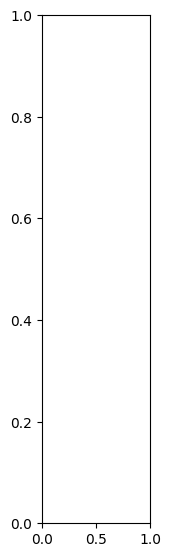

In [ ]:
# Summery plot
shap.summary_plot(shap_values, X_test, feature_names=features)

This bar plot shows the important features and the mean shap values. It shows the average impact on the model output magnitude.

It does not show the positive or negative impact on the prediction.

# **8.Future Work (Optional)**

1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [ ]:
 # Import pickle
import pickle

# Save the best model (naive bayes tuned)
pickle.dump(naive2, open('neural2.pkl', 'wb'))
# Save the scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))

2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [ ]:
# Load the File and predict unseen data.
pickled_model = pickle.load(open('neural2.pkl', 'rb'))

In [ ]:
instance = X_test.loc[54]

In [ ]:
instance

age                  1.469661
education            1.000000
sex                  1.000000
cigs_per_day         1.090048
bp_meds              0.000000
prevalent_stroke     1.000000
prevalent_hyp        1.000000
diabetes             0.000000
total_cholesterol   -0.480818
bmi                 -0.066051
heart_rate           0.078862
glucose             -0.669968
pulse_pressure       1.325318
glucose_diabetes     0.000000
Name: 54, dtype: float64

In [ ]:
# create an array for the x test value for the 50 index row
predict_new = np.array(instance).reshape(1,-1)

# Testing on one instance which we used for shap X_test[50,:]
pickled_model.predict(predict_new)

array([1.])

# **Conclusion**

Conclusions we get from EDA


In the dataset, 56.7% of individuals are female and rest are male and
males are more prone to CHD as compared to females.



50.24% of the individual present in the dataset are into smoking and residents who are consuming more cigarettes are at a risk of getting suffered with Heart Diseases.


Only 2.9% people are taking BP Medicines and BP patients are having high chances of CHD.



0.6% and 31.5 % people have a history of strokes and hypertension respectively.


2.6% people have diabetes who are more prone to CHD.


15.1% people have a chance of getting heart diseases in ten years.


In the dataset most of the population have Education Level - 1 with 42.
1% and least education level 4 with 11.3% .

With increasing age, chances of having cardiovascular disease increases. People above 65 years (i.e. old people) are more vulnerable to Heart Diseases.


sysBP and diaBP are positively correlated with each other.


Patients who are having stroke or hypertention history, diabetes are more prone to CHD.


There are more males consuming cigarattes as compared to females.


Higher glucose level lead to heart diseases resulting higher chances of diabetic patients to cardiovascular disease.
